In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier)

from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV,
StratifiedKFold, learning_curve, cross_val_predict, cross_validate,
permutation_test_score, validation_curve, StratifiedKFold, RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

warnings.filterwarnings('ignore') 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [41]:
df = pd.read_csv('global_freelancers_raw.csv', engine='pyarrow')
df.head()

freelancer_ID             name  gender   age    country language           primary_skill  years_of_experience hourly_rate (USD)  rating is_active client_satisfaction
0      FL250001  Ms. Nicole Kidd       f  52.0      Italy  Italian  Blockchain Development                 11.0               100     NaN         0                None
1      FL250002   Vanessa Garcia  FEMALE  52.0  Australia  English             Mobile Apps                 34.0           USD 100     3.3         1                 84%
2      FL250003      Juan Nelson    male  53.0    Germany   German          Graphic Design                 31.0                50     0.0         N                 71%
3      FL250004   Amanda Spencer       F  38.0  Australia  English         Web Development                  4.0               $40     1.5         N                 90%
4      FL250005  Lynn Curtis DDS  female  53.0    Germany   German         Web Development                 27.0                30     4.8         0                 83%

In [97]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

repeat_jobs = df['freelancer_ID'].value_counts()
try:
    repeat_jobs = repeat_jobs[repeat_jobs>1].index[0]
    repeat_jobs = len(repeat_jobs)
except IndexError:
    repeat_jobs = "None"
print(f"#️⃣ Number jobs repeated: {repeat_jobs}")
print('-' * 127)

missing_values = df.isna().sum()
#today_date = datetime.date.today() #+ datetime.timedelta(days=2) # test function works
#date_count = pd.DataFrame(jobs_all.date_time.dt.date.value_counts())
#missing_dates = list(pd.date_range(start=first_date, end=today_date).difference(date_count.index))
if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing data for df:\n{missing_values}")

print('-' * 127)
display(df.head(10))

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (1000, 11)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['freelancer_ID', 'gender', 'age', 'country', 'language', 'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating', 'is_active', 'client_satisfaction']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   gender               1000 non-null   object 
 2   age                  970 non-null    float64
 3   country           

freelancer_ID  gender   age        country    language           primary_skill  years_of_experience hourly_rate (USD)  rating is_active client_satisfaction
0      FL250001       f  52.0          Italy     Italian  Blockchain Development                 11.0               100     NaN         0                None
1      FL250002  FEMALE  52.0      Australia     English             Mobile Apps                 34.0           USD 100     3.3         1                 84%
2      FL250003    male  53.0        Germany      German          Graphic Design                 31.0                50     0.0         N                 71%
3      FL250004       F  38.0      Australia     English         Web Development                  4.0               $40     1.5         N                 90%
4      FL250005  female  53.0        Germany      German         Web Development                 27.0                30     4.8         0                 83%
5      FL250006  female  59.0    Netherlands       Dutch                      AI                 14.0               $30     2.4     False                None
6      FL250007       m  52.0      Indonesia  Indonesian           Data Analysis                 10.0            USD 75     3.1         0                 94%
7      FL250008    male  43.0          Italy     Italian  Blockchain Development                 14.0            USD 40     4.6     False                 94%
8      FL250009    male  26.0  United States     English  Blockchain Development                  4.0              None     4.0      True                 76%
9      FL250010    MALE  52.0         Turkey     Turkish                      AI                 22.0               $50     NaN         1                None

In [42]:
# drop these columns
df.drop(columns=['name'], axis=1, inplace=True)

In [43]:
df.head()

freelancer_ID  gender   age    country language           primary_skill  years_of_experience hourly_rate (USD)  rating is_active client_satisfaction
0      FL250001       f  52.0      Italy  Italian  Blockchain Development                 11.0               100     NaN         0                None
1      FL250002  FEMALE  52.0  Australia  English             Mobile Apps                 34.0           USD 100     3.3         1                 84%
2      FL250003    male  53.0    Germany   German          Graphic Design                 31.0                50     0.0         N                 71%
3      FL250004       F  38.0  Australia  English         Web Development                  4.0               $40     1.5         N                 90%
4      FL250005  female  53.0    Germany   German         Web Development                 27.0                30     4.8         0                 83%

In [5]:
# rename this column
df.rename(columns={'hourly_rate (USD)':'hourly_rate'}, inplace=True)

In [6]:
df.head()

gender   age    country language           primary_skill  years_of_experience hourly_rate  rating is_active client_satisfaction
0       f  52.0      Italy  Italian  Blockchain Development                 11.0         100     NaN         0                None
1  FEMALE  52.0  Australia  English             Mobile Apps                 34.0     USD 100     3.3         1                 84%
2    male  53.0    Germany   German          Graphic Design                 31.0          50     0.0         N                 71%
3       F  38.0  Australia  English         Web Development                  4.0         $40     1.5         N                 90%
4  female  53.0    Germany   German         Web Development                 27.0          30     4.8         0                 83%

In [8]:
# df's info
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   object 
 1   age                  970 non-null    float64
 2   country              1000 non-null   object 
 3   language             1000 non-null   object 
 4   primary_skill        1000 non-null   object 
 5   years_of_experience  949 non-null    float64
 6   hourly_rate          906 non-null    object 
 7   rating               899 non-null    float64
 8   is_active            911 non-null    object 
 9   client_satisfaction  824 non-null    object 
dtypes: float64(3), object(7)
memory usage: 438.5 KB


In [9]:
# count of gender column
df['gender'].value_counts(ascending=True)

gender
female     86
F          90
Female     96
m          99
male      100
MALE      102
f         103
Male      103
M         106
FEMALE    115
Name: count, dtype: int64

In [10]:
# Replace multiple string values at once
gender_mapping = {
    'f': 'female',
    'FEMALE': 'female', 
    'F': 'female', 
    'Female': 'female', 
    'm': 'male', 
    'MALE': 'male',
    'M':'male', 
    'Male':'male'
}
#df['gender'].replace(gender_mapping)

df['gender'] = df['gender'].replace(gender_mapping)

In [11]:
# count of gender column
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [173]:
#df[['age']].mean().round(0)

In [12]:
# filling Null values with mean method
df['age'].fillna(df['age'].mean().round(0), inplace=True)

In [172]:
#df[['years_of_experience']].mean().round(0)

In [13]:
# filling Null values with mean method
df['years_of_experience'].fillna(df['years_of_experience'].mean().round(0), inplace=True)

In [171]:
#df['rating'].mean().round(1)

In [14]:
# filling Null values with mean method
df['rating'].fillna(df['rating'].mean().round(1), inplace=True)

In [174]:
#df['is_active'].value_counts()

In [15]:
# replace str values
is_active_map = {
    'N':'0', 
    'False':'0', 
    'no':'0',
    'Y':'1',
    'yes':'1', 
    'True':'1'
}

#df['is_active'].replace(is_active_map).value_counts()

df['is_active'] = df['is_active'].replace(is_active_map)

In [16]:
# replace None values with np.nan or NaN
df['is_active'] = df['is_active'].replace(['None', None], np.nan, regex=False)

In [17]:
# filling Null values with mean method 
df['is_active'] = df['is_active'].fillna('0')

In [167]:
#df['client_satisfaction'].str.replace('%', '')

In [18]:
# replace None values with np.nan or NaN
df['client_satisfaction'] = df['client_satisfaction'].replace(['None', None], np.nan, regex=False)

In [19]:
# filling Null values with mean method
df['client_satisfaction'] = df['client_satisfaction'].fillna('72')

In [20]:
# replace % values with ''
df['client_satisfaction'] = df['client_satisfaction'].str.replace('%', '')

In [40]:
#df['hourly_rate'].str.replace('$', '', regex=False)

In [21]:
# replace characters values with empty '' 
df['hourly_rate'] = df['hourly_rate'].str.replace('USD', '', regex=True)
df['hourly_rate'] = df['hourly_rate'].str.replace('$', '', regex=False)
# replace both string 'None' and None objects with np.nan
df['hourly_rate'] = df['hourly_rate'].replace(['None', None], np.nan, regex=False)

In [22]:
# changing dtype of hourly_rate
df['hourly_rate'] = pd.to_numeric(df['hourly_rate'], errors='coerce')

In [58]:
#df['hourly_rate'].replace(['None', None], np.nan, regex=False).value_counts()

In [67]:
#pd.to_numeric(df['hourly_rate'], errors='coerce')

In [116]:
#df['primary_skill'].unique()

In [23]:
# Using isna() method (recommended)
df[df['hourly_rate'].isna()]

gender   age         country  language           primary_skill  years_of_experience  hourly_rate  rating is_active client_satisfaction
8      male  26.0   United States   English  Blockchain Development                  4.0          NaN     4.0         1                  76
11   female  55.0       Argentina   Spanish            UI/UX Design                 15.0          NaN     2.5         1                  86
12   female  57.0  United Kingdom   English           Cybersecurity                 18.0          NaN     2.0         0                  86
17     male  56.0           India     Hindi  Blockchain Development                 11.0          NaN     2.5         0                  87
21     male  51.0           Japan  Japanese                  DevOps                 11.0          NaN     2.4         0                  69
..      ...   ...             ...       ...                     ...                  ...          ...     ...       ...                 ...
934  female  38.0          Mexico   Spanish             Mobile Apps                 11.0          NaN     2.8         0                  91
937  female  21.0           Italy   Italian           Cybersecurity                  0.0          NaN     0.0         1                  95
945    male  24.0          Turkey   Turkish          Graphic Design                  2.0          NaN     1.6         0                 100
969    male  49.0           India     Hindi         Web Development                  1.0          NaN     0.0         0                  82
974  female  43.0           Spain   Spanish  Blockchain Development                  2.0          NaN     1.8         0                  61

[94 rows x 10 columns]

In [117]:
# filtering values
#df[df['primary_skill'] == 'Machine Learning']

In [24]:
# filtering values based on skills so that we concatenate them
block = df[df['primary_skill'] == 'Blockchain Development'].fillna(100)
ui = df[df['primary_skill'] == 'UI/UX Design'].fillna(20)
cyber = df[df['primary_skill'] == 'Cybersecurity'].fillna(50)
devops = df[df['primary_skill'] == 'DevOps'].fillna(30)
graphic = df[df['primary_skill'] == 'Graphic Design'].fillna(40)
mobile = df[df['primary_skill'] == 'Mobile Apps'].fillna(75)
web = df[df['primary_skill'] == 'Web Development'].fillna(50)
ai = df[df['primary_skill'] == 'AI'].fillna(60)
data_ans = df[df['primary_skill'] == 'Data Analysis'].fillna(70)
ml = df[df['primary_skill'] == 'Machine Learning'].fillna(80)

In [182]:
#pd.concat([block,ui,cyber,devops,graphic,mobile,web,ai,data_ans,ml]).reset_index(drop=True)

In [25]:
# concatenating values
clean_df = pd.concat([ai, block, cyber, data_ans, devops, graphic, 
                      ml, mobile, ui, web]).reset_index(drop=True)

In [26]:
clean_df.head()

gender   age      country    language primary_skill  years_of_experience  hourly_rate  rating is_active client_satisfaction
0  female  59.0  Netherlands       Dutch            AI                 14.0         30.0     2.4         0                  72
1    male  52.0       Turkey     Turkish            AI                 22.0         50.0     2.5         1                  72
2    male  41.0    Indonesia  Indonesian            AI                  9.0         50.0     1.8         0                  65
3  female  47.0       Canada     English            AI                 22.0         30.0     1.3         0                  62
4    male  46.0        Egypt      Arabic            AI                  9.0         20.0     1.4         1                  76

In [27]:
# check for null values
clean_df.isna().sum()

gender                 0
age                    0
country                0
language               0
primary_skill          0
years_of_experience    0
hourly_rate            0
rating                 0
is_active              0
client_satisfaction    0
dtype: int64

In [28]:
# df's info
clean_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   object 
 1   age                  1000 non-null   float64
 2   country              1000 non-null   object 
 3   language             1000 non-null   object 
 4   primary_skill        1000 non-null   object 
 5   years_of_experience  1000 non-null   float64
 6   hourly_rate          1000 non-null   float64
 7   rating               1000 non-null   float64
 8   is_active            1000 non-null   object 
 9   client_satisfaction  1000 non-null   object 
dtypes: float64(4), object(6)
memory usage: 399.7 KB


In [30]:
clean_df.head(3)

gender   age      country    language primary_skill  years_of_experience  hourly_rate  rating is_active client_satisfaction
0  female  59.0  Netherlands       Dutch            AI                 14.0         30.0     2.4         0                  72
1    male  52.0       Turkey     Turkish            AI                 22.0         50.0     2.5         1                  72
2    male  41.0    Indonesia  Indonesian            AI                  9.0         50.0     1.8         0                  65

In [ ]:
col = clean_df.columns

def dtype_change(): 
    if col == ['age', 'years_of_experience', 'hourly_rate', 'rating', 'is_active', 'client_satisfaction']: 
        clean_df[col] = clean_df[col].astype('int')

In [33]:
def dtype_change(df):
    """
    Convert specified columns to integer type if they exist in the DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to modify
    
    Returns:
        pandas.DataFrame: DataFrame with converted column types
    """
    # Define columns that should be converted to int
    int_columns = ['age', 'years_of_experience', 'hourly_rate', 'rating', 'is_active', 'client_satisfaction']
    
    # Get actual columns that exist in the DataFrame and should be converted
    columns_to_convert = [col for col in int_columns if col in clean_df.columns]
    
    if not columns_to_convert:
        print("No matching columns found for conversion")
        return df
    
    # Create a copy to avoid modifying the original DataFrame
    df_copy = clean_df.copy()
    
    # Convert columns to int, handling potential errors
    for col in columns_to_convert:
        try:
            # Handle missing values and convert to int
            df_copy[col] = df_copy[col].fillna(0).astype('int32')
            print(f"Successfully converted '{col}' to int")
        except (ValueError, TypeError) as e:
            print(f"Could not convert '{col}' to int: {e}")
            # Optionally, try converting to float first, then int
            try:
                df_copy[col] = df_copy[col].astype('float').fillna(0).astype('int32')
                print(f"Successfully converted '{col}' to int via float")
            except:
                print(f"Failed to convert '{col}' - keeping original dtype")
    
    return df_copy

# Usage examples:
clean_df = dtype_change(clean_df)
# or
# clean_df = dtype_change_robust(clean_df)

Successfully converted 'age' to int
Successfully converted 'years_of_experience' to int
Successfully converted 'hourly_rate' to int
Successfully converted 'rating' to int
Successfully converted 'is_active' to int
Successfully converted 'client_satisfaction' to int


In [36]:
clean_df.select_dtypes('object')

gender       country    language    primary_skill
0    female   Netherlands       Dutch               AI
1      male        Turkey     Turkish               AI
2      male     Indonesia  Indonesian               AI
3    female        Canada     English               AI
4      male         Egypt      Arabic               AI
..      ...           ...         ...              ...
995    male     Australia     English  Web Development
996  female        Brazil  Portuguese  Web Development
997    male         India       Hindi  Web Development
998    male     Argentina     Spanish  Web Development
999    male  South Africa   Afrikaans  Web Development

[1000 rows x 4 columns]

In [37]:
def dtype_change(df):
    """
    Convert specified columns to integer type if they exist in the DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to modify
    
    Returns:
        pandas.DataFrame: DataFrame with converted column types
    """
    # Define columns that should be converted to int
    obj_columns = clean_df.select_dtypes('object')
    
    # Get actual columns that exist in the DataFrame and should be converted
    columns_to_convert = [col for col in obj_columns if col in clean_df.columns]
    
    if not columns_to_convert:
        print("No matching columns found for conversion")
        return df
    
    # Create a copy to avoid modifying the original DataFrame
    df_copy = clean_df.copy()
    
    # Convert columns to int, handling potential errors
    for col in columns_to_convert:
        try:
            # Handle missing values and convert to int
            df_copy[col] = df_copy[col].fillna(0).astype('category')
            print(f"Successfully converted '{col}' to category")
        except (ValueError, TypeError) as e:
            print(f"Could not convert '{col}' to category: {e}")
            # Optionally, try converting to float first, then int
            try:
                df_copy[col] = df_copy[col].astype('float').fillna(0).astype('category')
                print(f"Successfully converted '{col}' to category via object")
            except:
                print(f"Failed to convert '{col}' - keeping original dtype")
    
    return df_copy

# Usage examples:
clean_df = dtype_change(clean_df)
# or
# clean_df = dtype_change_robust(clean_df)

Successfully converted 'gender' to category
Successfully converted 'country' to category
Successfully converted 'language' to category
Successfully converted 'primary_skill' to category


In [38]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               1000 non-null   category
 1   age                  1000 non-null   int32   
 2   country              1000 non-null   category
 3   language             1000 non-null   category
 4   primary_skill        1000 non-null   category
 5   years_of_experience  1000 non-null   int32   
 6   hourly_rate          1000 non-null   int32   
 7   rating               1000 non-null   int32   
 8   is_active            1000 non-null   int32   
 9   client_satisfaction  1000 non-null   int32   
dtypes: category(4), int32(6)
memory usage: 29.3 KB


In [47]:
clean_df['freelancer_id'] = df.freelancer_ID

In [49]:
# shift column 'Name' to first position 
first_column = clean_df.pop('freelancer_id')

# Moving the away column
clean_df.insert(0, 'freelancer_id', first_column)

In [50]:
clean_df.head()

freelancer_id  gender  age      country    language primary_skill  years_of_experience  hourly_rate  rating  is_active  client_satisfaction
0      FL250001  female   59  Netherlands       Dutch            AI                   14           30       2          0                   72
1      FL250002    male   52       Turkey     Turkish            AI                   22           50       2          1                   72
2      FL250003    male   41    Indonesia  Indonesian            AI                    9           50       1          0                   65
3      FL250004  female   47       Canada     English            AI                   22           30       1          0                   62
4      FL250005    male   46        Egypt      Arabic            AI                    9           20       1          1                   76

In [4]:
#clean_df.to_csv('clean_global_freelancer.csv', index=False)

In [2]:
clean_df = pd.read_csv('clean_global_freelancer.csv')
clean_df.head()

freelancer_id  gender  age      country    language primary_skill  years_of_experience  hourly_rate  rating  is_active  client_satisfaction
0      FL250001  female   59  Netherlands       Dutch            AI                   14           30       2          0                   72
1      FL250002    male   52       Turkey     Turkish            AI                   22           50       2          1                   72
2      FL250003    male   41    Indonesia  Indonesian            AI                    9           50       1          0                   65
3      FL250004  female   47       Canada     English            AI                   22           30       1          0                   62
4      FL250005    male   46        Egypt      Arabic            AI                    9           20       1          1                   76

In [3]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {clean_df.shape}")
print('-' * 127)
print(f"Columns to list:\n{clean_df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {clean_df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {clean_df.describe()}")
print('-' * 127)

repeat_jobs = clean_df['freelancer_id'].value_counts()
try:
    repeat_jobs = repeat_jobs[repeat_jobs>1].index[0]
    repeat_jobs = len(repeat_jobs)
except IndexError:
    repeat_jobs = "None"
print(f"#️⃣ Number jobs repeated: {repeat_jobs}")
print('-' * 127)

missing_values = clean_df.isna().sum()
#today_date = datetime.date.today() #+ datetime.timedelta(days=2) # test function works
#date_count = pd.DataFrame(jobs_all.date_time.dt.date.value_counts())
#missing_dates = list(pd.date_range(start=first_date, end=today_date).difference(date_count.index))
if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing data for clean_df:\n{missing_values}")

print('-' * 127)
display(clean_df.head(10))

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (1000, 11)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['freelancer_id', 'gender', 'age', 'country', 'language', 'primary_skill', 'years_of_experience', 'hourly_rate', 'rating', 'is_active', 'client_satisfaction']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   freelancer_id        1000 non-null   object
 1   gender               1000 non-null   object
 2   age                  1000 non-null   int64 
 3   country              1000 non

freelancer_id  gender  age         country    language primary_skill  years_of_experience  hourly_rate  rating  is_active  client_satisfaction
0      FL250001  female   59     Netherlands       Dutch            AI                   14           30       2          0                   72
1      FL250002    male   52          Turkey     Turkish            AI                   22           50       2          1                   72
2      FL250003    male   41       Indonesia  Indonesian            AI                    9           50       1          0                   65
3      FL250004  female   47          Canada     English            AI                   22           30       1          0                   62
4      FL250005    male   46           Egypt      Arabic            AI                    9           20       1          1                   76
5      FL250006    male   41     South Korea      Korean            AI                    9           40       2          1                   82
6      FL250007  female   59  United Kingdom     English            AI                    3           50       0          0                   72
7      FL250008    male   50  United Kingdom     English            AI                   15           60       2          1                   65
8      FL250009    male   38          Canada     English            AI                   17           40       4          1                   90
9      FL250010  female   51       Indonesia  Indonesian            AI                   33           75       0          1                   72

In [5]:
# Option 2: Use a loop for multiple columns
categorical_cols = clean_df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    clean_df[f'{col}_encoded'] = le.fit_transform(clean_df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [7]:
clean_df.drop(clean_df.select_dtypes(include=['object', 'category']),axis=1, inplace=True)

In [9]:
clean_df.drop(columns=['freelancer_id_encoded'], axis=1, inplace=True)

In [103]:
clean_df.head(3)

age  years_of_experience  hourly_rate  rating  is_active  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded
0   59                   14           30       2          0                   72               0               13                 2                      0
1   52                   22           50       2          1                   72               1               18                15                      0
2   41                    9           50       1          0                   65               1                9                 7                      0

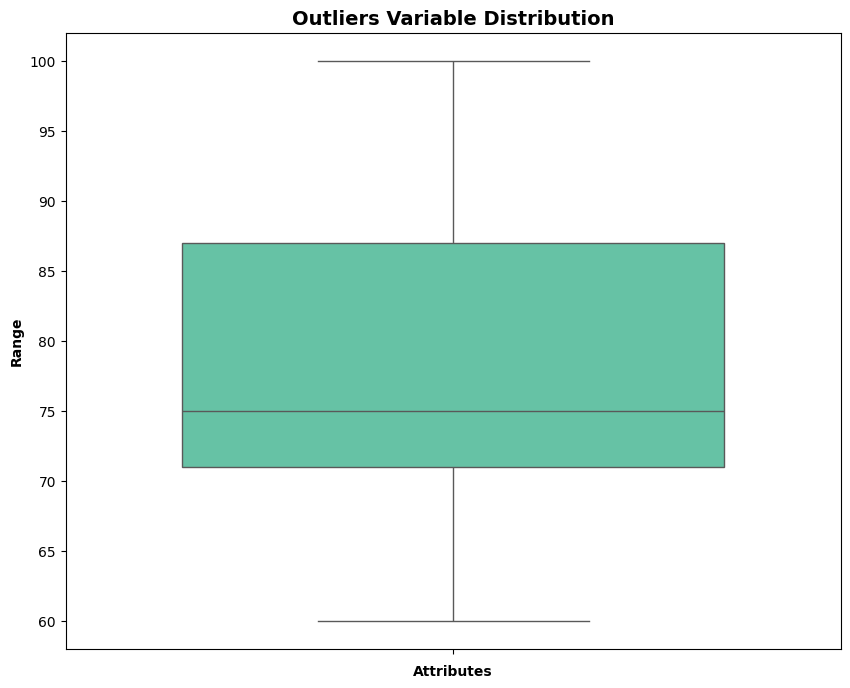

In [105]:
# Visualize Outlier Analysis one by one
# cols = ['unit_price', 'total_amount', 'shipping_cost', 'delivery_time_days'] 

plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = clean_df['client_satisfaction'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

## Here are the most suitable machine learning algorithms depending on your specific goals:

### **Classification Problems:**

**1. Predicting Freelancer Activity (`is_active`)**
- **Random Forest** or **Gradient Boosting** (XGBoost, LightGBM)
- **Logistic Regression** for interpretability
- Features: age, years_of_experience, hourly_rate, rating, client_satisfaction, gender, country

**2. Predicting Rating Categories (0-5)**
- **Random Forest** or **Support Vector Machine**
- **Neural Networks** for complex patterns
- Could treat as multi-class classification or regression

### **Regression Problems:**

**3. Predicting Hourly Rate**
- **Random Forest Regressor** or **Gradient Boosting Regressor**
- **Linear Regression** with feature engineering
- **Ridge/Lasso Regression** to prevent overfitting

**4. Predicting Client Satisfaction Score**
- **Random Forest** or **XGBoost**
- **Support Vector Regression**

### **Unsupervised Learning:**

**5. Market Segmentation/Clustering**
- **K-Means Clustering** to identify freelancer segments
- **Hierarchical Clustering** for market analysis
- **DBSCAN** to find natural groupings

### **My Top Recommendations:**

1. **Random Forest**
   - Excellent starting point because it:
   - Handles mixed data types well (categorical + numerical)
   - Provides feature importance
   - Resistant to overfitting
   - Works well with your dataset size (1000 rows)

3. **XGBoost/LightGBM**
   - For higher performance:
   - Often achieves best results
   - Good with tabular data
   - Built-in handling of missing values

5. **Logistic Regression**
   - If you need interpretability:
   - Clear coefficient interpretation
   - Fast training and prediction
   - Good baseline model

# 🤖 Machine Learning Code Examples for Freelancer Dataset

## 📊 Data Preparation

✅ Data prepared successfully!
Dataset shape: (1000, 14)
🌲 RANDOM FOREST RESULTS
Accuracy Test Set:  0.185
Accuracy Train Set: 0.891

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.03      0.03      0.03        37
           2       0.27      0.56      0.37        57
           3       0.00      0.00      0.00        36
           4       0.16      0.10      0.12        39
           5       0.00      0.00      0.00         2

    accuracy                           0.18       200
   macro avg       0.08      0.12      0.09       200
weighted avg       0.12      0.18      0.13       200


🎯 Feature Importance:
               feature  importance
0                  age    0.216245
3  client_satisfaction    0.214448
1  years_of_experience    0.209965
5      country_encoded    0.197057
2          hourly_rate    0.120500
4       gender_encoded    0.041785


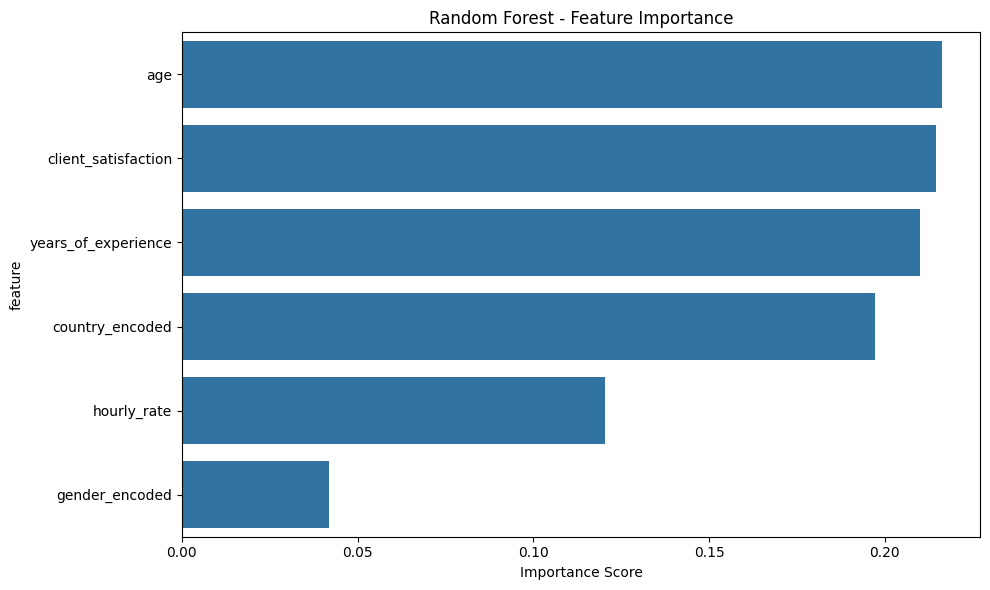

🔍 Training SVM with hyperparameter tuning...
⚡ SVM RESULTS
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy Test Set:  0.285
Accuracy Train Set: 0.285

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        37
           2       0.28      1.00      0.44        57
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00         2

    accuracy                           0.28       200
   macro avg       0.05      0.17      0.07       200
weighted avg       0.08      0.28      0.13       200



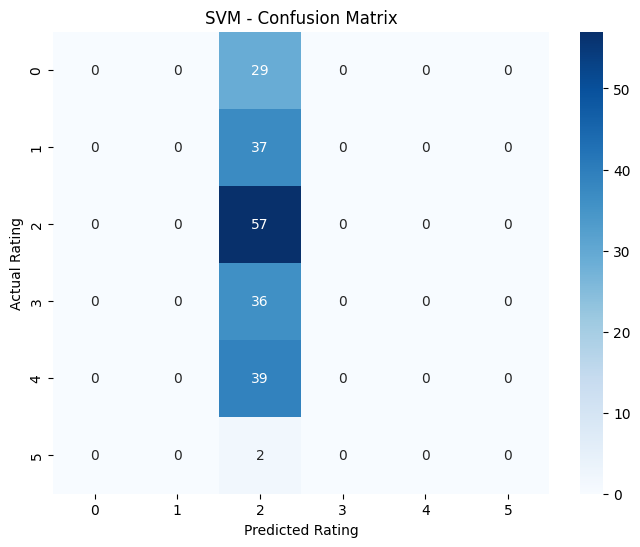

🧠 Training Neural Network...
🧠 NEURAL NETWORK RESULTS
Accuracy Test Set: 0.320
Accuracy Train Set: 0.266
Number of iterations: 16
Training loss: 1.6225

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.30      0.43      0.35        37
           2       0.33      0.84      0.47        57
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00         2

    accuracy                           0.32       200
   macro avg       0.10      0.21      0.14       200
weighted avg       0.15      0.32      0.20       200



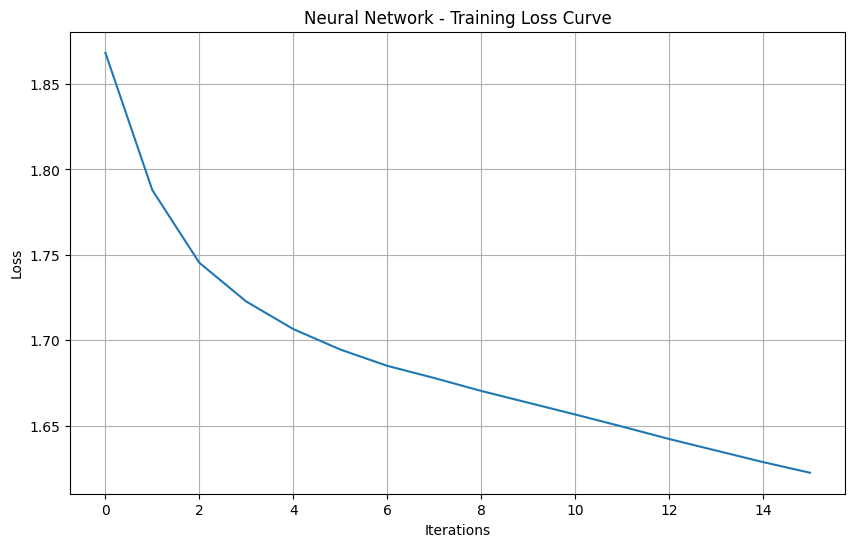

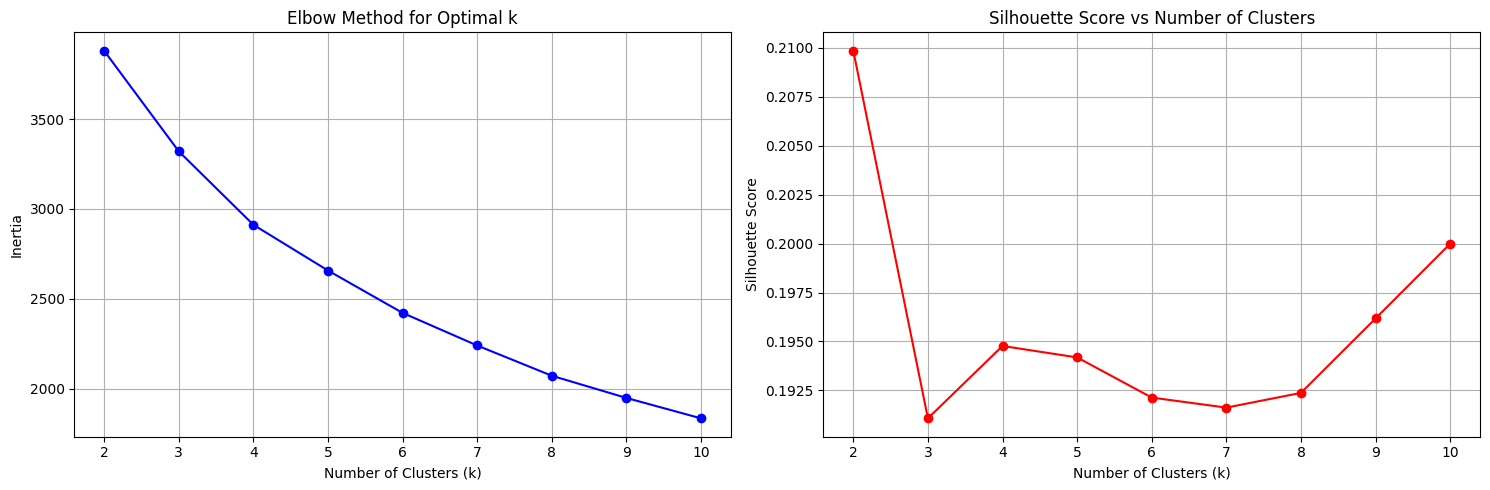

🎯 K-MEANS CLUSTERING RESULTS
Optimal number of clusters: 4
Silhouette score: 0.195

📊 Cluster Analysis:

Cluster 0 (288 freelancers):
  Average age: 34.8
  Average experience: 6.1 years
  Average hourly rate: $36.7
  Average rating: 1.9
  Average satisfaction: 70.6
  Most common skill: Data Analysis
  Active freelancers: 122 (42.4%)

Cluster 1 (224 freelancers):
  Average age: 39.3
  Average experience: 8.9 years
  Average hourly rate: $91.2
  Average rating: 2.2
  Average satisfaction: 75.4
  Most common skill: Blockchain Development
  Active freelancers: 111 (49.6%)

Cluster 2 (236 freelancers):
  Average age: 52.6
  Average experience: 24.1 years
  Average hourly rate: $49.6
  Average rating: 2.1
  Average satisfaction: 75.5
  Most common skill: Cybersecurity
  Active freelancers: 109 (46.2%)

Cluster 3 (252 freelancers):
  Average age: 36.8
  Average experience: 7.6 years
  Average hourly rate: $39.3
  Average rating: 2.3
  Average satisfaction: 91.1
  Most common skill: Blockchain

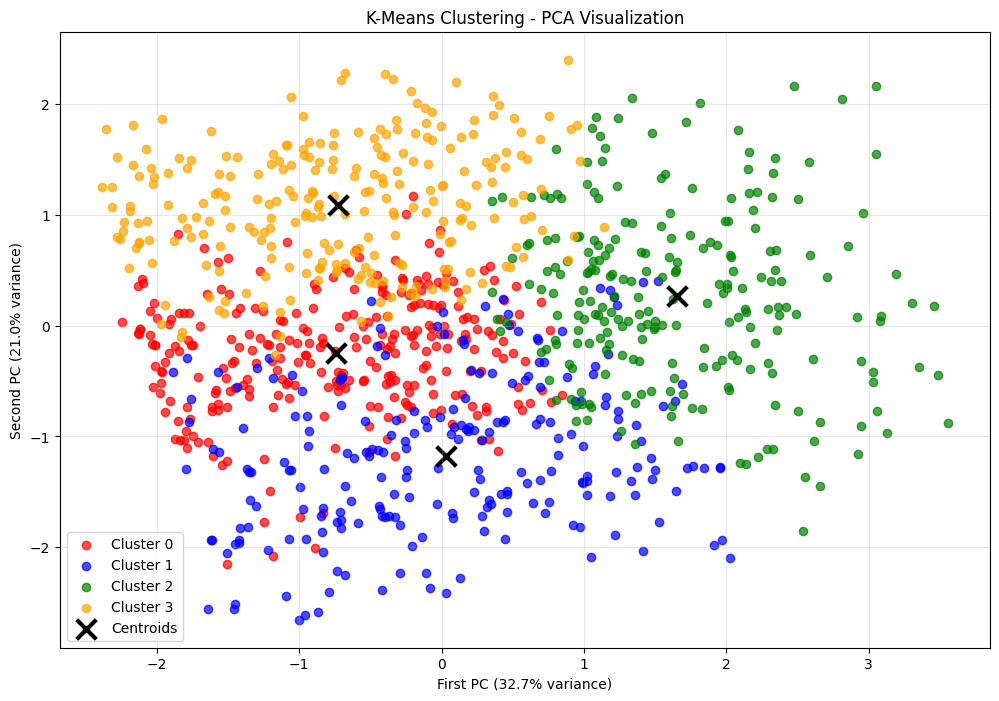

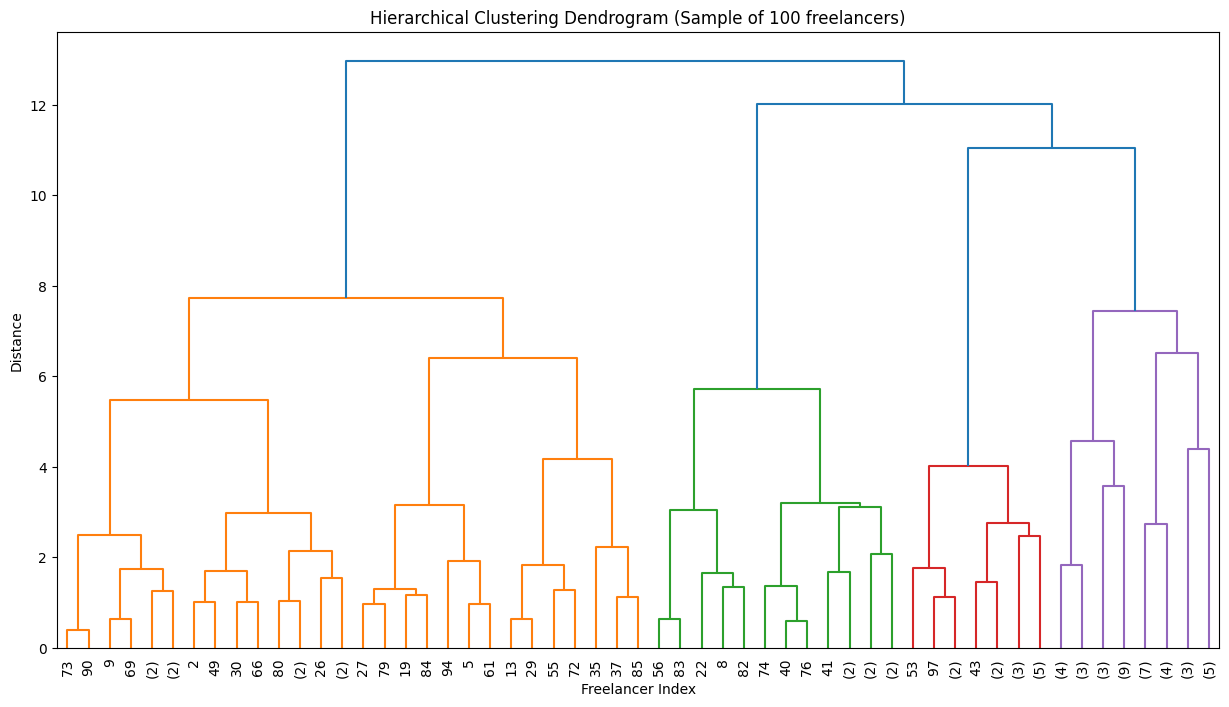

🌳 HIERARCHICAL CLUSTERING RESULTS
Number of clusters: 4
Silhouette score: 0.153

📊 Cluster Analysis:

Cluster 0 (250 freelancers):
  age: 49.9 ± 7.0
  years_of_experience: 20.9 ± 10.4
  hourly_rate: 57.6 ± 27.4
  rating: 3.0 ± 1.2
  client_satisfaction: 73.7 ± 8.0

Cluster 1 (298 freelancers):
  age: 35.4 ± 11.7
  years_of_experience: 7.2 ± 5.9
  hourly_rate: 36.7 ± 12.9
  rating: 1.7 ± 1.2
  client_satisfaction: 71.3 ± 6.3

Cluster 2 (209 freelancers):
  age: 39.0 ± 11.5
  years_of_experience: 8.7 ± 7.3
  hourly_rate: 88.7 ± 12.9
  rating: 1.6 ± 1.1
  client_satisfaction: 78.3 ± 11.2

Cluster 3 (243 freelancers):
  age: 38.5 ± 10.6
  years_of_experience: 8.8 ± 6.2
  hourly_rate: 36.0 ± 12.8
  rating: 2.2 ± 1.4
  client_satisfaction: 90.3 ± 5.9


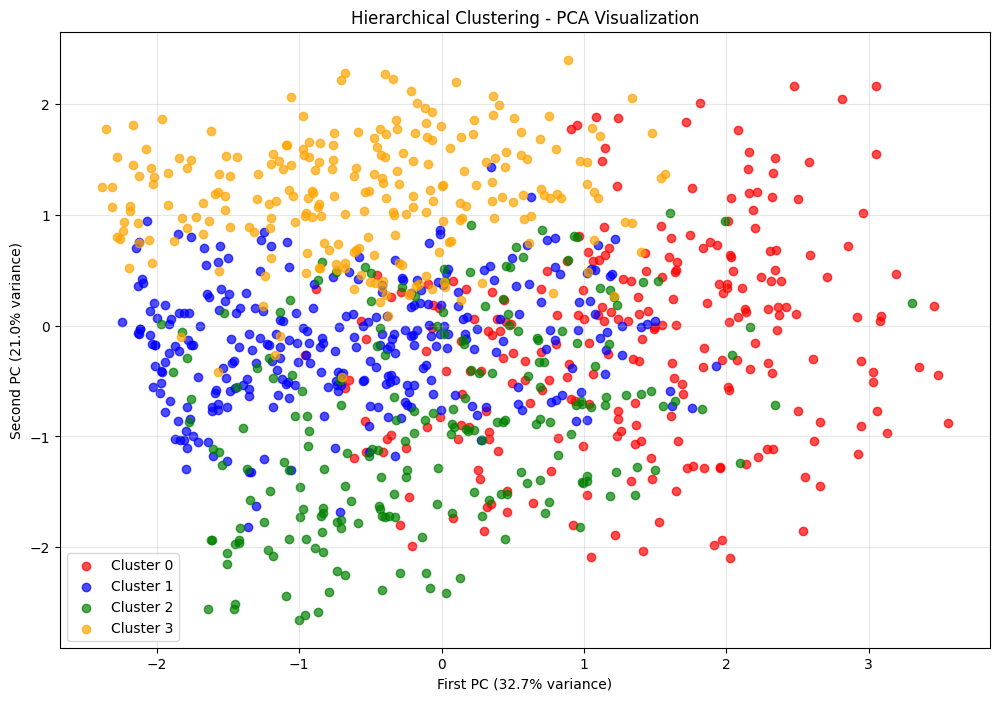

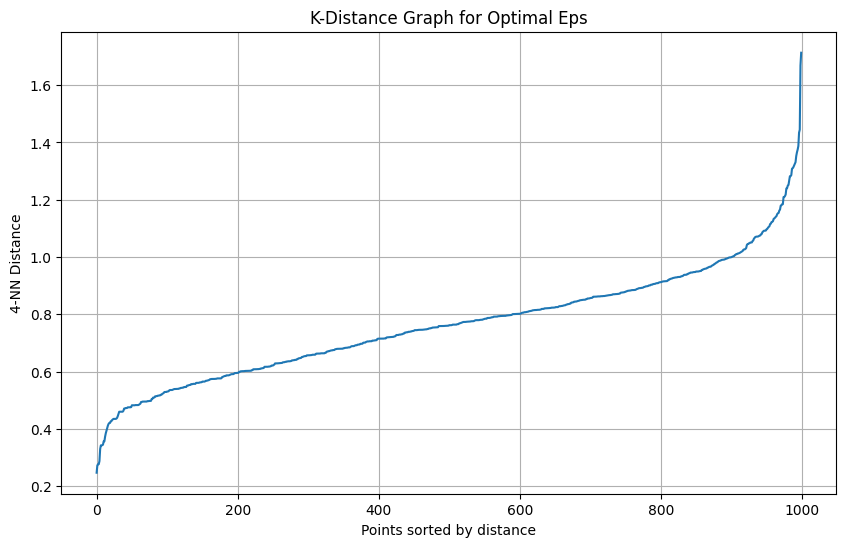

🎯 DBSCAN CLUSTERING RESULTS
eps: 0.5
min_samples: 5
Number of clusters: 7
Number of noise points: 940
Silhouette score (excluding noise): 0.424

📊 Cluster Analysis:

Cluster 0 (11 freelancers):
  age: 40.8 ± 2.7
  years_of_experience: 9.1 ± 3.1
  hourly_rate: 46.4 ± 5.0
  rating: 2.0 ± 0.0
  client_satisfaction: 80.8 ± 2.2

Cluster 1 (15 freelancers):
  age: 23.2 ± 2.7
  years_of_experience: 2.8 ± 1.7
  hourly_rate: 31.3 ± 11.9
  rating: 2.0 ± 0.0
  client_satisfaction: 72.8 ± 1.9

Cluster 2 (7 freelancers):
  age: 33.4 ± 2.3
  years_of_experience: 7.0 ± 2.8
  hourly_rate: 48.6 ± 3.8
  rating: 3.0 ± 0.0
  client_satisfaction: 72.0 ± 0.6

Cluster 3 (10 freelancers):
  age: 22.8 ± 1.8
  years_of_experience: 3.3 ± 2.4
  hourly_rate: 31.0 ± 7.4
  rating: 1.0 ± 0.0
  client_satisfaction: 72.0 ± 1.8

Cluster 4 (5 freelancers):
  age: 21.8 ± 2.2
  years_of_experience: 1.4 ± 1.1
  hourly_rate: 50.0 ± 7.1
  rating: 3.0 ± 0.0
  client_satisfaction: 72.4 ± 1.5

Cluster 5 (7 freelancers):
  age: 2

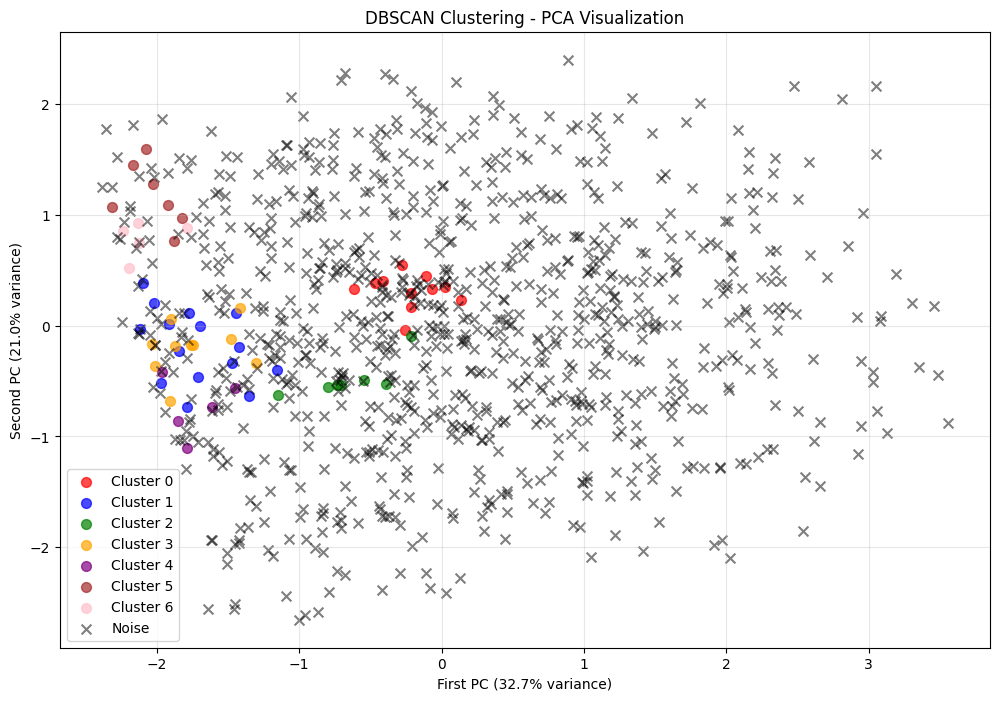

🚀 COMPLETE ML WORKFLOW FOR FREELANCER DATASET
1️⃣ Data Preparation...

2️⃣ Comparing Rating Prediction Models...
🌲 RANDOM FOREST RESULTS
Accuracy Test Set:  0.185
Accuracy Train Set: 0.891

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.03      0.03      0.03        37
           2       0.27      0.56      0.37        57
           3       0.00      0.00      0.00        36
           4       0.16      0.10      0.12        39
           5       0.00      0.00      0.00         2

    accuracy                           0.18       200
   macro avg       0.08      0.12      0.09       200
weighted avg       0.12      0.18      0.13       200


🎯 Feature Importance:
               feature  importance
0                  age    0.216245
3  client_satisfaction    0.214448
1  years_of_experience    0.209965
5      country_encoded    0.197057
2          hourly_rate    0.120500
4       gen

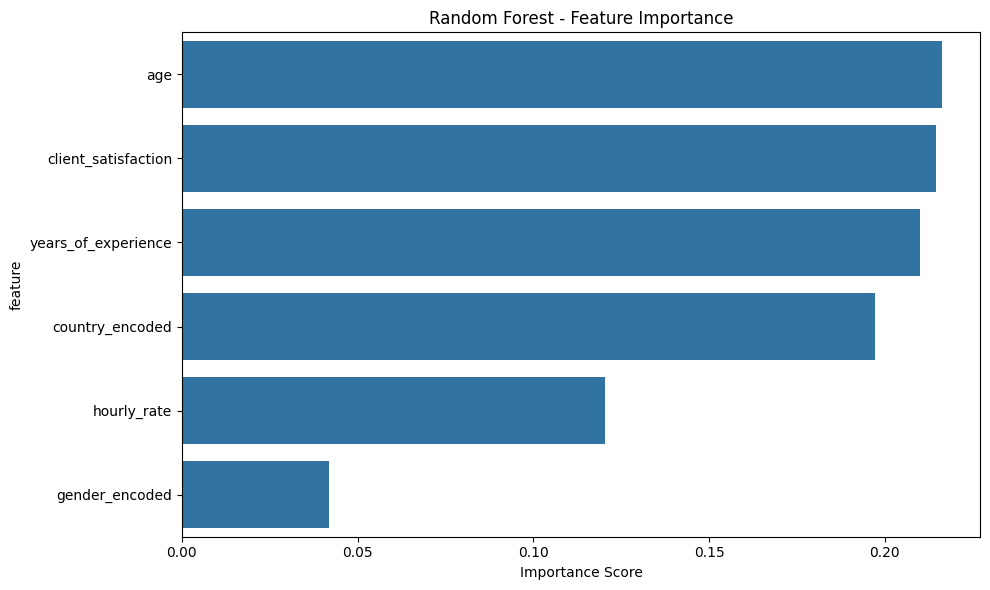

🔍 Training SVM with hyperparameter tuning...
⚡ SVM RESULTS
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy Test Set:  0.285
Accuracy Train Set: 0.285

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        37
           2       0.28      1.00      0.44        57
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00         2

    accuracy                           0.28       200
   macro avg       0.05      0.17      0.07       200
weighted avg       0.08      0.28      0.13       200



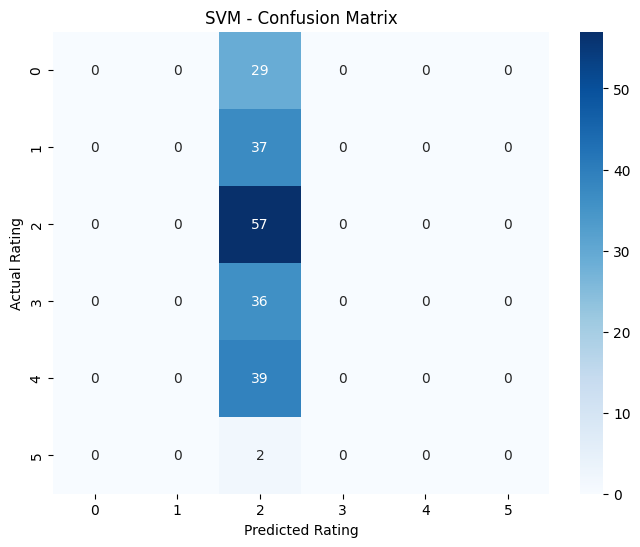

🧠 Training Neural Network...
🧠 NEURAL NETWORK RESULTS
Accuracy Test Set: 0.320
Accuracy Train Set: 0.266
Number of iterations: 16
Training loss: 1.6225

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.30      0.43      0.35        37
           2       0.33      0.84      0.47        57
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00         2

    accuracy                           0.32       200
   macro avg       0.10      0.21      0.14       200
weighted avg       0.15      0.32      0.20       200



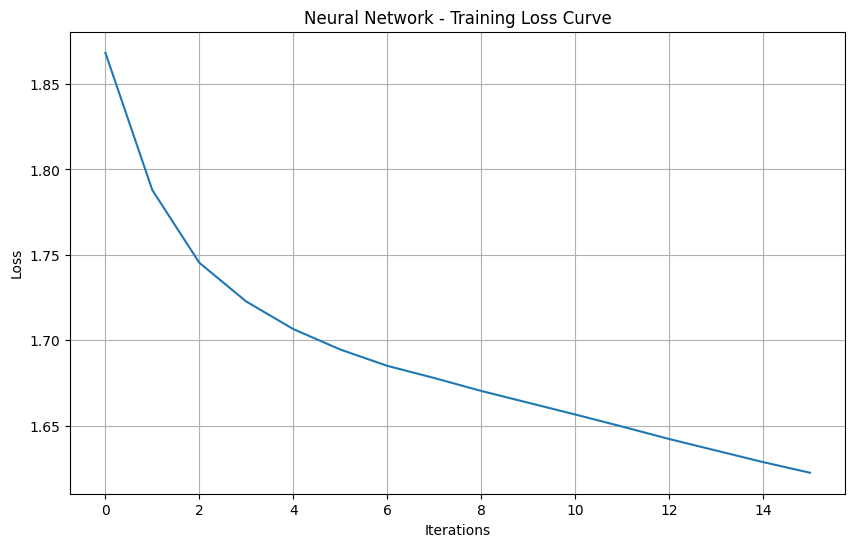


3️⃣ Comparing Clustering Methods...


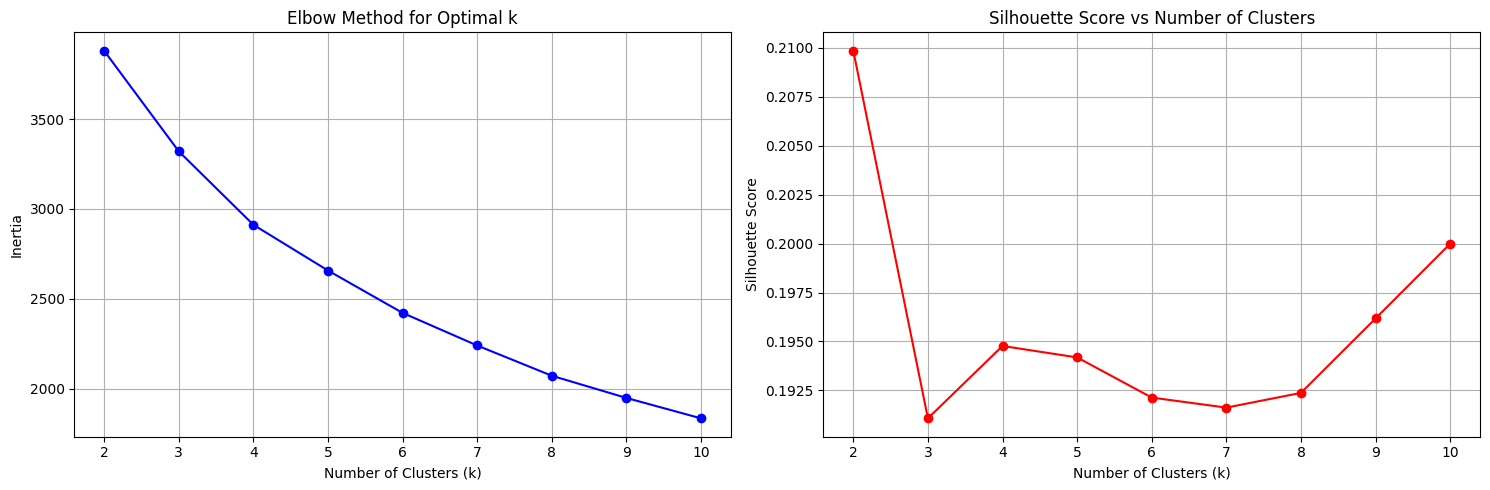

🎯 K-MEANS CLUSTERING RESULTS
Optimal number of clusters: 4
Silhouette score: 0.195

📊 Cluster Analysis:

Cluster 0 (288 freelancers):
  Average age: 34.8
  Average experience: 6.1 years
  Average hourly rate: $36.7
  Average rating: 1.9
  Average satisfaction: 70.6
  Most common skill: Data Analysis
  Active freelancers: 122 (42.4%)

Cluster 1 (224 freelancers):
  Average age: 39.3
  Average experience: 8.9 years
  Average hourly rate: $91.2
  Average rating: 2.2
  Average satisfaction: 75.4
  Most common skill: Blockchain Development
  Active freelancers: 111 (49.6%)

Cluster 2 (236 freelancers):
  Average age: 52.6
  Average experience: 24.1 years
  Average hourly rate: $49.6
  Average rating: 2.1
  Average satisfaction: 75.5
  Most common skill: Cybersecurity
  Active freelancers: 109 (46.2%)

Cluster 3 (252 freelancers):
  Average age: 36.8
  Average experience: 7.6 years
  Average hourly rate: $39.3
  Average rating: 2.3
  Average satisfaction: 91.1
  Most common skill: Blockchain

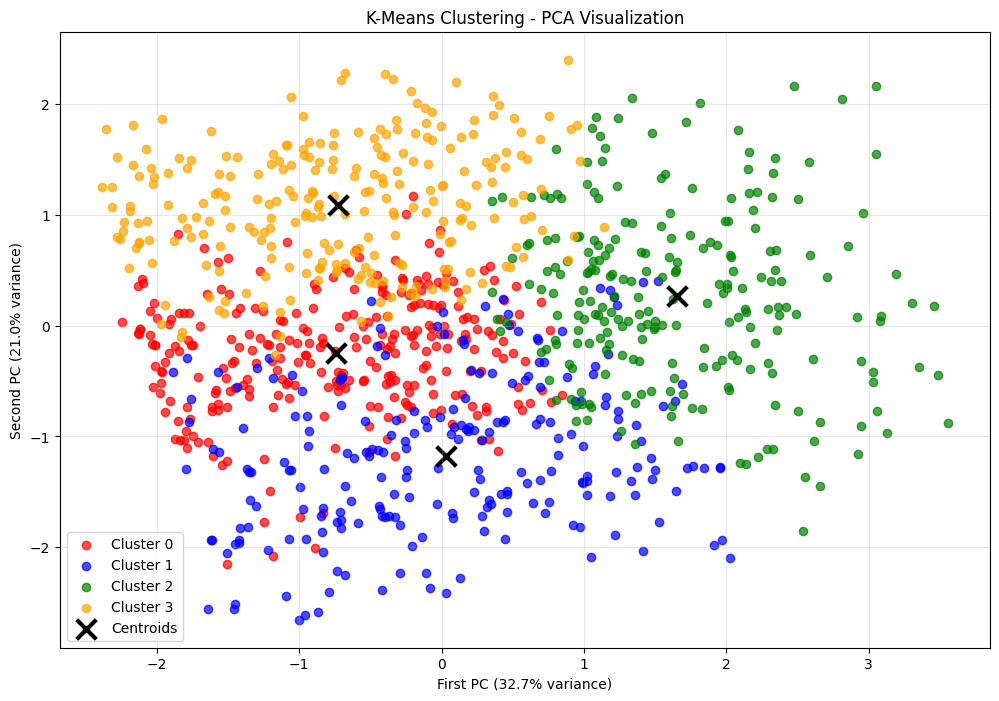

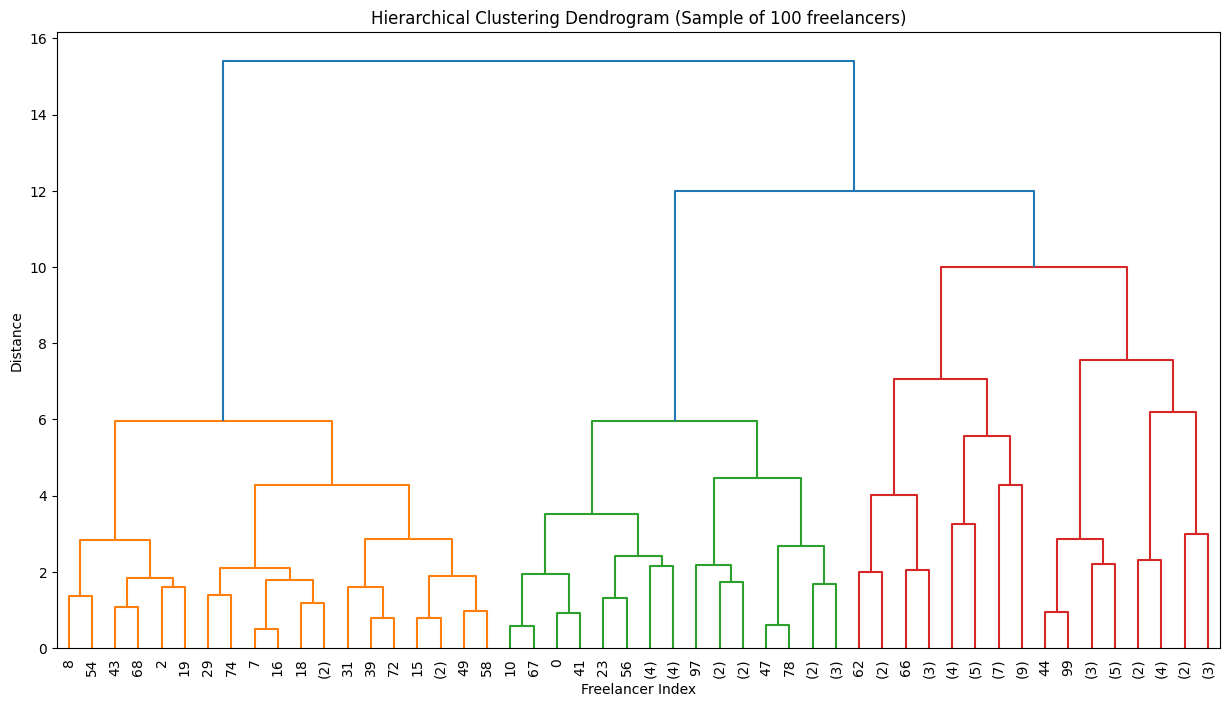

🌳 HIERARCHICAL CLUSTERING RESULTS
Number of clusters: 4
Silhouette score: 0.153

📊 Cluster Analysis:

Cluster 0 (250 freelancers):
  age: 49.9 ± 7.0
  years_of_experience: 20.9 ± 10.4
  hourly_rate: 57.6 ± 27.4
  rating: 3.0 ± 1.2
  client_satisfaction: 73.7 ± 8.0

Cluster 1 (298 freelancers):
  age: 35.4 ± 11.7
  years_of_experience: 7.2 ± 5.9
  hourly_rate: 36.7 ± 12.9
  rating: 1.7 ± 1.2
  client_satisfaction: 71.3 ± 6.3

Cluster 2 (209 freelancers):
  age: 39.0 ± 11.5
  years_of_experience: 8.7 ± 7.3
  hourly_rate: 88.7 ± 12.9
  rating: 1.6 ± 1.1
  client_satisfaction: 78.3 ± 11.2

Cluster 3 (243 freelancers):
  age: 38.5 ± 10.6
  years_of_experience: 8.8 ± 6.2
  hourly_rate: 36.0 ± 12.8
  rating: 2.2 ± 1.4
  client_satisfaction: 90.3 ± 5.9


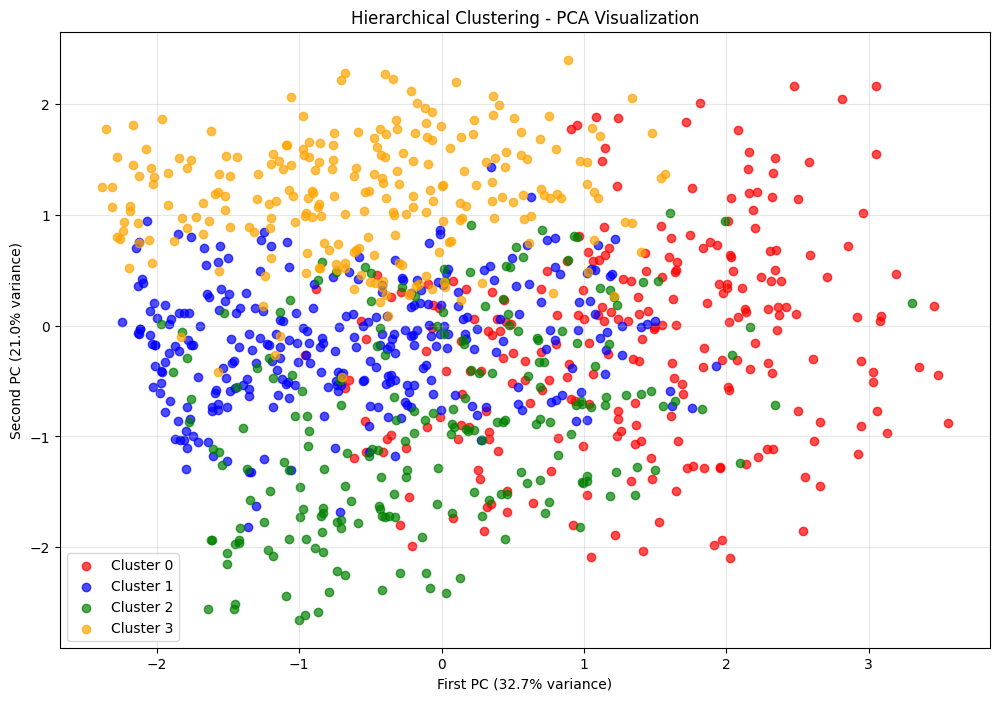

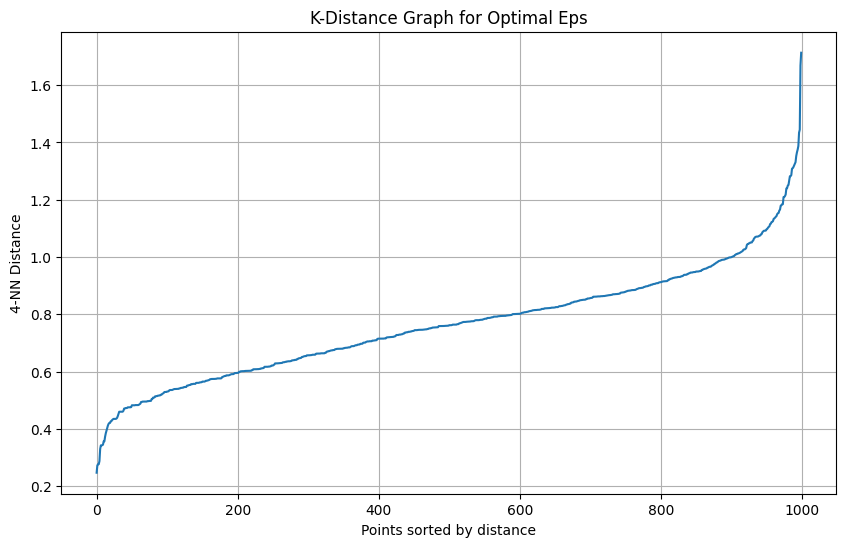

🎯 DBSCAN CLUSTERING RESULTS
eps: 0.5
min_samples: 5
Number of clusters: 7
Number of noise points: 940
Silhouette score (excluding noise): 0.424

📊 Cluster Analysis:

Cluster 0 (11 freelancers):
  age: 40.8 ± 2.7
  years_of_experience: 9.1 ± 3.1
  hourly_rate: 46.4 ± 5.0
  rating: 2.0 ± 0.0
  client_satisfaction: 80.8 ± 2.2

Cluster 1 (15 freelancers):
  age: 23.2 ± 2.7
  years_of_experience: 2.8 ± 1.7
  hourly_rate: 31.3 ± 11.9
  rating: 2.0 ± 0.0
  client_satisfaction: 72.8 ± 1.9

Cluster 2 (7 freelancers):
  age: 33.4 ± 2.3
  years_of_experience: 7.0 ± 2.8
  hourly_rate: 48.6 ± 3.8
  rating: 3.0 ± 0.0
  client_satisfaction: 72.0 ± 0.6

Cluster 3 (10 freelancers):
  age: 22.8 ± 1.8
  years_of_experience: 3.3 ± 2.4
  hourly_rate: 31.0 ± 7.4
  rating: 1.0 ± 0.0
  client_satisfaction: 72.0 ± 1.8

Cluster 4 (5 freelancers):
  age: 21.8 ± 2.2
  years_of_experience: 1.4 ± 1.1
  hourly_rate: 50.0 ± 7.1
  rating: 3.0 ± 0.0
  client_satisfaction: 72.4 ± 1.5

Cluster 5 (7 freelancers):
  age: 2

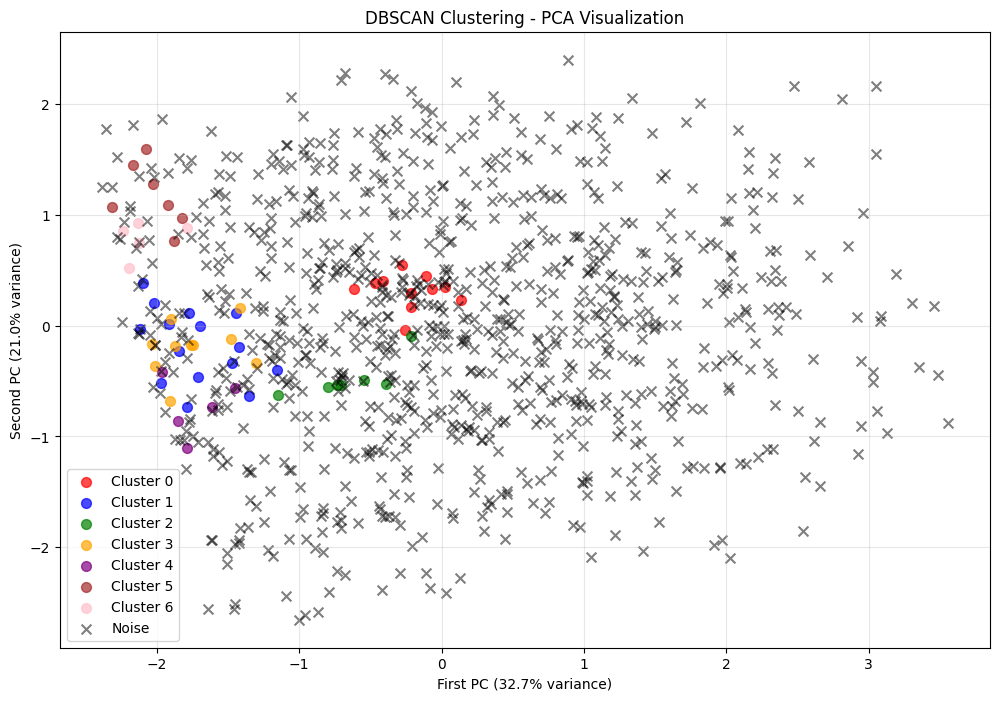


✅ Complete workflow finished!
📊 Check the plots and results above for detailed analysis.


In [100]:
# 🤖 Machine Learning Code Examples for Freelancer Dataset

## 📊 Data Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('clean_global_freelancer.csv')

# Data preprocessing
def prepare_data(df):
    # Create a copy
    data = df.copy()
    
    # Encode categorical variables
    le_gender = LabelEncoder()
    le_country = LabelEncoder()
    le_language = LabelEncoder()
    
    data['gender_encoded'] = le_gender.fit_transform(data['gender'])
    data['country_encoded'] = le_country.fit_transform(data['country'])
    data['language_encoded'] = le_language.fit_transform(data['language'])
    
    return data, le_gender, le_country, le_language

# Prepare the dataset
data, le_gender, le_country, le_language = prepare_data(df)
print("✅ Data prepared successfully!")
print(f"Dataset shape: {data.shape}")

## 🎯 1. Rating Prediction (Classification)

### A) Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def train_random_forest_rating():
    # Features for predicting rating
    feature_cols = ['age', 'years_of_experience', 'hourly_rate', 
                   'client_satisfaction', 'gender_encoded', 'country_encoded']
    
    X = data[feature_cols]
    y = data['rating']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test_scaled)
    y_pred_train = rf_model.predict(X_train_scaled)
    
    # Results
    print("🌲 RANDOM FOREST RESULTS")
    print("=" * 50)
    print(f"Accuracy Test Set:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_train):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n🎯 Feature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Random Forest - Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    return rf_model, scaler, feature_cols

# Run Random Forest
rf_model, rf_scaler, rf_features = train_random_forest_rating()

### B) Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def train_svm_rating():
    # Same features as Random Forest
    feature_cols = ['age', 'years_of_experience', 'hourly_rate', 
                   'client_satisfaction', 'gender_encoded', 'country_encoded']
    
    X = data[feature_cols]
    y = data['rating']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features (crucial for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly', 'linear'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
    
    # Grid search with cross-validation
    svm_grid = GridSearchCV(
        SVC(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    print("🔍 Training SVM with hyperparameter tuning...")
    svm_grid.fit(X_train_scaled, y_train)
    
    # Best model
    best_svm = svm_grid.best_estimator_
    
    # Predictions
    y_pred = best_svm.predict(X_test_scaled)
    y_pred_train = best_svm.predict(X_train_scaled) 
    
    # Results
    print("⚡ SVM RESULTS")
    print("=" * 50)
    print(f"Best Parameters: {svm_grid.best_params_}")
    print(f"Accuracy Test Set:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_train):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('SVM - Confusion Matrix')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Actual Rating')
    plt.show()
    
    return best_svm, scaler, feature_cols

# Run SVM
svm_model, svm_scaler, svm_features = train_svm_rating()

### C) Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def train_neural_network_rating():
    # Features for neural network
    feature_cols = ['age', 'years_of_experience', 'hourly_rate', 
                   'client_satisfaction', 'gender_encoded', 'country_encoded']
    
    X = data[feature_cols]
    y = data['rating']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features (essential for neural networks)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Neural Network with multiple hidden layers
    nn_model = MLPClassifier(
        hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
        activation='relu',
        solver='adam',
        alpha=0.0001,           # L2 regularization
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=500,
        shuffle=True,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    
    print("🧠 Training Neural Network...")
    nn_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = nn_model.predict(X_test_scaled)
    y_pred_train = nn_model.predict(X_train_scaled)
    
    # Results
    print("🧠 NEURAL NETWORK RESULTS")
    print("=" * 50)
    print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_train):.3f}")
    print(f"Number of iterations: {nn_model.n_iter_}")
    print(f"Training loss: {nn_model.loss_:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot training loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(nn_model.loss_curve_)
    plt.title('Neural Network - Training Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    return nn_model, scaler, feature_cols

# Run Neural Network
nn_model, nn_scaler, nn_features = train_neural_network_rating()

## 🎯 2. Market Segmentation (Clustering)

### A) K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def perform_kmeans_segmentation():
    # Features for clustering
    cluster_features = ['age', 'years_of_experience', 'hourly_rate', 
                       'rating', 'client_satisfaction']
    
    X_cluster = data[cluster_features]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    
    # Find optimal number of clusters using elbow method
    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow curve
    ax1.plot(k_range, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)
    
    # Silhouette scores
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs Number of Clusters')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Choose optimal k (let's use k=4)
    optimal_k = 4
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_scaled)
    
    # Add cluster labels to original data
    data_clustered = data.copy()
    data_clustered['cluster'] = cluster_labels
    
    print("🎯 K-MEANS CLUSTERING RESULTS")
    print("=" * 50)
    print(f"Optimal number of clusters: {optimal_k}")
    print(f"Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")
    
    # Analyze clusters
    print("\n📊 Cluster Analysis:")
    for i in range(optimal_k):
        cluster_data = data_clustered[data_clustered['cluster'] == i]
        print(f"\nCluster {i} ({len(cluster_data)} freelancers):")
        print(f"  Average age: {cluster_data['age'].mean():.1f}")
        print(f"  Average experience: {cluster_data['years_of_experience'].mean():.1f} years")
        print(f"  Average hourly rate: ${cluster_data['hourly_rate'].mean():.1f}")
        print(f"  Average rating: {cluster_data['rating'].mean():.1f}")
        print(f"  Average satisfaction: {cluster_data['client_satisfaction'].mean():.1f}")
        print(f"  Most common skill: {cluster_data['primary_skill'].mode().iloc[0]}")
        print(f"  Active freelancers: {cluster_data['is_active'].sum()} ({cluster_data['is_active'].mean()*100:.1f}%)")
    
    # Visualize clusters (2D projection)
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(12, 8))
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for i in range(optimal_k):
        cluster_points = X_pca[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    
    # Plot centroids
    centroids_pca = pca.transform(kmeans_final.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
               c='black', marker='x', s=200, linewidths=3, label='Centroids')
    
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('K-Means Clustering - PCA Visualization')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return kmeans_final, scaler, cluster_features, data_clustered

# Run K-Means
kmeans_model, cluster_scaler, cluster_features, clustered_data = perform_kmeans_segmentation()

### B) Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

def perform_hierarchical_clustering():
    # Features for clustering
    cluster_features = ['age', 'years_of_experience', 'hourly_rate', 
                       'rating', 'client_satisfaction']
    
    X_cluster = data[cluster_features]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    
    # Create dendrogram to visualize hierarchy
    # Use a sample for visualization (full dataset would be too crowded)
    sample_size = min(100, len(X_scaled))
    sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
    X_sample = X_scaled[sample_indices]
    
    plt.figure(figsize=(15, 8))
    
    # Calculate linkage matrix
    linkage_matrix = linkage(X_sample, method='ward')
    
    # Create dendrogram
    dendrogram(linkage_matrix, 
               truncate_mode='level', 
               p=5,
               leaf_rotation=90,
               leaf_font_size=10)
    
    plt.title('Hierarchical Clustering Dendrogram (Sample of 100 freelancers)')
    plt.xlabel('Freelancer Index')
    plt.ylabel('Distance')
    plt.show()
    
    # Perform hierarchical clustering on full dataset
    n_clusters = 4
    hierarchical = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage='ward'
    )
    
    cluster_labels = hierarchical.fit_predict(X_scaled)
    
    # Add cluster labels to data
    data_hierarchical = data.copy()
    data_hierarchical['cluster'] = cluster_labels
    
    print("🌳 HIERARCHICAL CLUSTERING RESULTS")
    print("=" * 50)
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")
    
    # Analyze clusters
    print("\n📊 Cluster Analysis:")
    for i in range(n_clusters):
        cluster_data = data_hierarchical[data_hierarchical['cluster'] == i]
        print(f"\nCluster {i} ({len(cluster_data)} freelancers):")
        
        # Summary statistics
        for feature in cluster_features:
            print(f"  {feature}: {cluster_data[feature].mean():.1f} ± {cluster_data[feature].std():.1f}")
    
    # Visualize with PCA
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(12, 8))
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for i in range(n_clusters):
        cluster_points = X_pca[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('Hierarchical Clustering - PCA Visualization')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return hierarchical, scaler, cluster_features, data_hierarchical

# Run Hierarchical Clustering
hierarchical_model, hierarchical_scaler, hierarchical_features, hierarchical_data = perform_hierarchical_clustering()

### C) DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def perform_dbscan_clustering():
    # Features for clustering
    cluster_features = ['age', 'years_of_experience', 'hourly_rate', 
                       'rating', 'client_satisfaction']
    
    X_cluster = data[cluster_features]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    
    # Find optimal eps using k-distance graph
    k = 4  # MinPts - 1
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
    distances, indices = nbrs.kneighbors(X_scaled)
    distances = np.sort(distances[:, k-1], axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-NN Distance')
    plt.title('K-Distance Graph for Optimal Eps')
    plt.grid(True)
    plt.show()
    
    # Choose eps based on the elbow in the k-distance graph
    eps = 0.5  # Adjust based on the plot
    min_samples = 5
    
    # Perform DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_scaled)
    
    # Add cluster labels to data
    data_dbscan = data.copy()
    data_dbscan['cluster'] = cluster_labels
    
    # Count clusters and noise points
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    
    print("🎯 DBSCAN CLUSTERING RESULTS")
    print("=" * 50)
    print(f"eps: {eps}")
    print(f"min_samples: {min_samples}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")
    
    if n_clusters > 0:
        # Calculate silhouette score (excluding noise points)
        non_noise_mask = cluster_labels != -1
        if np.sum(non_noise_mask) > 1 and len(set(cluster_labels[non_noise_mask])) > 1:
            silhouette_avg = silhouette_score(X_scaled[non_noise_mask], cluster_labels[non_noise_mask])
            print(f"Silhouette score (excluding noise): {silhouette_avg:.3f}")
    
    # Analyze clusters
    print("\n📊 Cluster Analysis:")
    unique_labels = set(cluster_labels)
    
    for label in unique_labels:
        if label == -1:
            print(f"\nNoise points ({n_noise} freelancers)")
        else:
            cluster_data = data_dbscan[data_dbscan['cluster'] == label]
            print(f"\nCluster {label} ({len(cluster_data)} freelancers):")
            
            for feature in cluster_features:
                print(f"  {feature}: {cluster_data[feature].mean():.1f} ± {cluster_data[feature].std():.1f}")
    
    # Visualize with PCA
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(12, 8))
    
    unique_labels = set(cluster_labels)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black for noise points
            col = 'black'
            marker = 'x'
            label = 'Noise'
            alpha = 0.5
        else:
            marker = 'o'
            label = f'Cluster {k}'
            alpha = 0.7
        
        class_member_mask = (cluster_labels == k)
        xy = X_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=col, marker=marker, 
                   label=label, alpha=alpha, s=50)
    
    plt.xlabel(f'First PC ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'Second PC ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.title('DBSCAN Clustering - PCA Visualization')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return dbscan, scaler, cluster_features, data_dbscan

# Run DBSCAN
dbscan_model, dbscan_scaler, dbscan_features, dbscan_data = perform_dbscan_clustering()

## 🚀 Complete Workflow Example
def complete_ml_workflow():
    print("🚀 COMPLETE ML WORKFLOW FOR FREELANCER DATASET")
    print("=" * 60)
    
    # 1. Data preparation
    print("1️⃣ Data Preparation...")
    data, le_gender, le_country, le_language = prepare_data(df)
    
    # 2. Rating prediction comparison
    print("\n2️⃣ Comparing Rating Prediction Models...")
    
    models_results = {}
    
    # Train all classification models
    rf_model, rf_scaler, rf_features = train_random_forest_rating()
    svm_model, svm_scaler, svm_features = train_svm_rating()
    nn_model, nn_scaler, nn_features = train_neural_network_rating()
    
    # 3. Market segmentation comparison
    print("\n3️⃣ Comparing Clustering Methods...")
    
    kmeans_model, cluster_scaler, cluster_features, clustered_data = perform_kmeans_segmentation()
    hierarchical_model, hierarchical_scaler, hierarchical_features, hierarchical_data = perform_hierarchical_clustering()
    dbscan_model, dbscan_scaler, dbscan_features, dbscan_data = perform_dbscan_clustering()
    
    print("\n✅ Complete workflow finished!")
    print("📊 Check the plots and results above for detailed analysis.")

# Run complete workflow
complete_ml_workflow()

## 💡 Key Takeaways
1. **Random Forest**: Best for interpretability and feature importance
2. **SVM**: Great for complex decision boundaries, needs hyperparameter tuning
3. **Neural Networks**: Can capture complex patterns but needs more data
4. **K-Means**: Good for spherical clusters, need to choose k
5. **Hierarchical**: Shows cluster hierarchy, computationally expensive
6. **DBSCAN**: Finds arbitrary shapes, handles noise well

## 🎯 Next Steps
- Try ensemble methods combining multiple models
- Feature engineering (create new features)
- Deep learning for more complex patterns
- Time series analysis if you have temporal data
- A/B testing to validate business impact

In [10]:
clean_df.head()

age  years_of_experience  hourly_rate  rating  is_active  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded
0   59                   14           30       2          0                   72               0               13                 2                      0
1   52                   22           50       2          1                   72               1               18                15                      0
2   41                    9           50       1          0                   65               1                9                 7                      0
3   47                   22           30       1          0                   62               0                3                 3                      0
4   46                    9           20       1          1                   76               1                5                 1                      0

## AdaBoostClassifier

Dataset shape: (1000, 9)
Number of features: 9
Number of classes: 2
Class distribution: [554 446]
-------------------------------------------------------------------------------------------------------------------------------
--- Basic AdaBoost Model ---
Accuracy test set: 0.5050
Accuracy train set: 0.5825
-------------------------------------------------------------------------------------------------------------------------------
--- Grid Search for Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Best cross-validation score: 0.5563
-------------------------------------------------------------------------------------------------------------------------------
Test accuracy with best model test set: 0.5650
Test accuracy with best model train set: 0.5913
------------------------------------------------------------------------------------------------------------

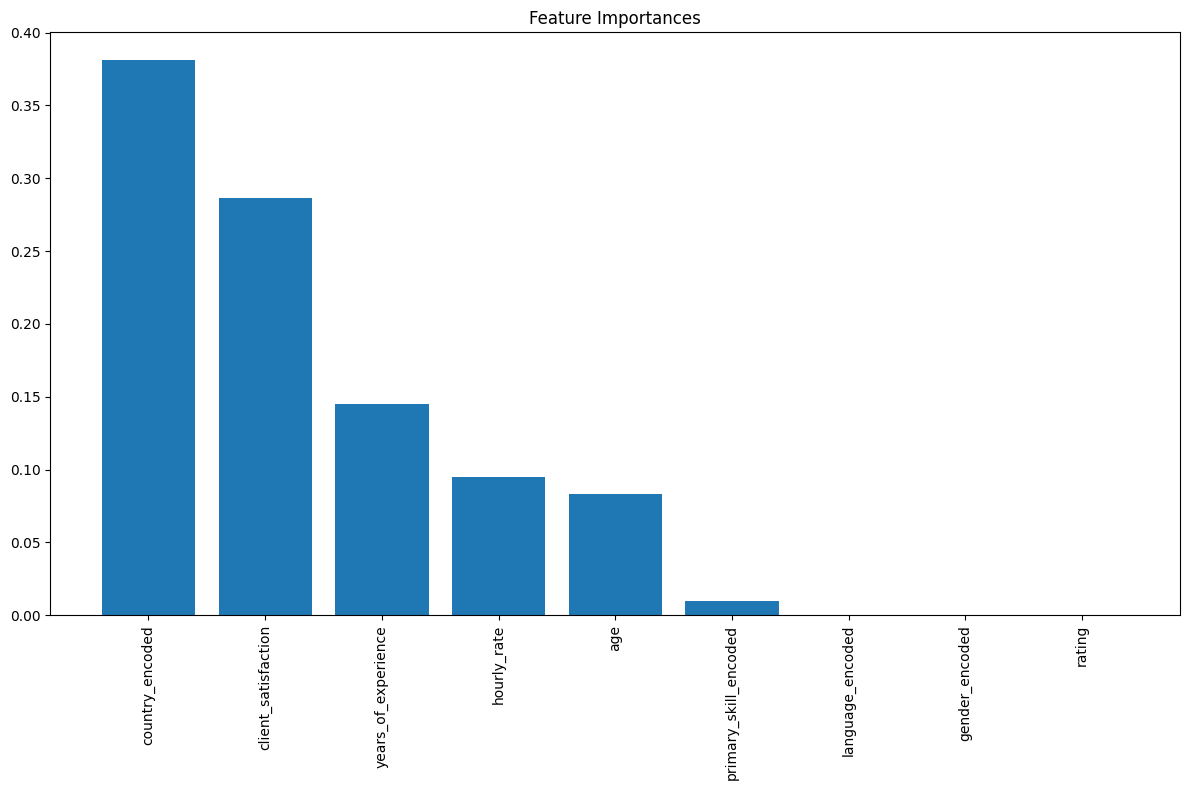

--- Learning Curve ---


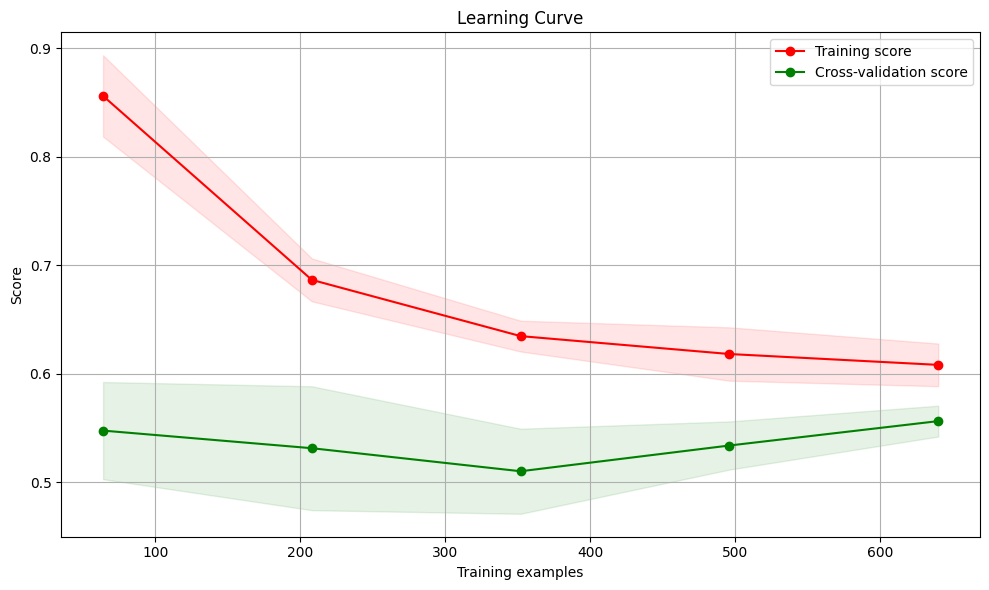

--- Effect of Learning Rate ---


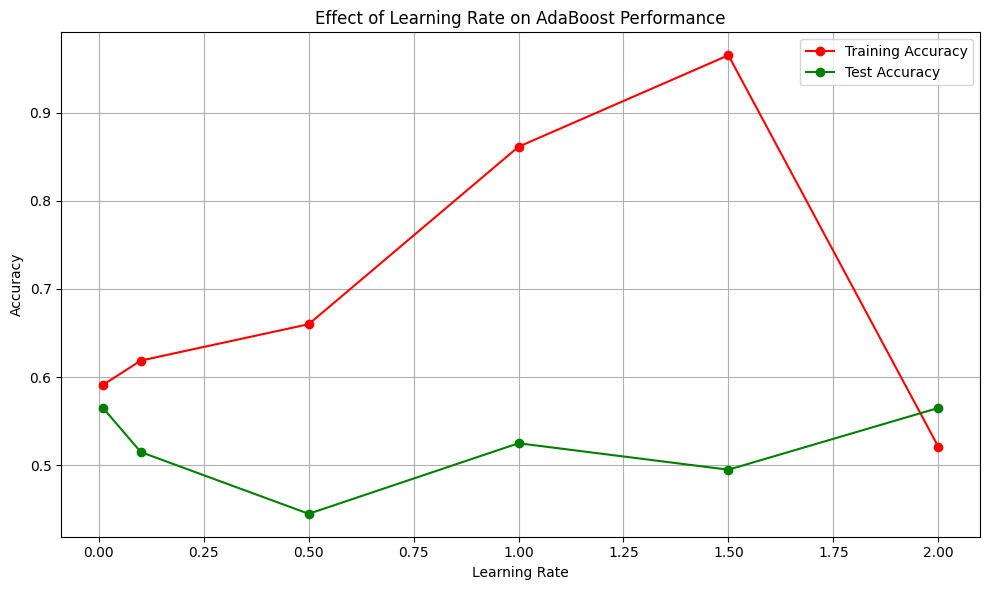

--- Effect of Number of Estimators ---


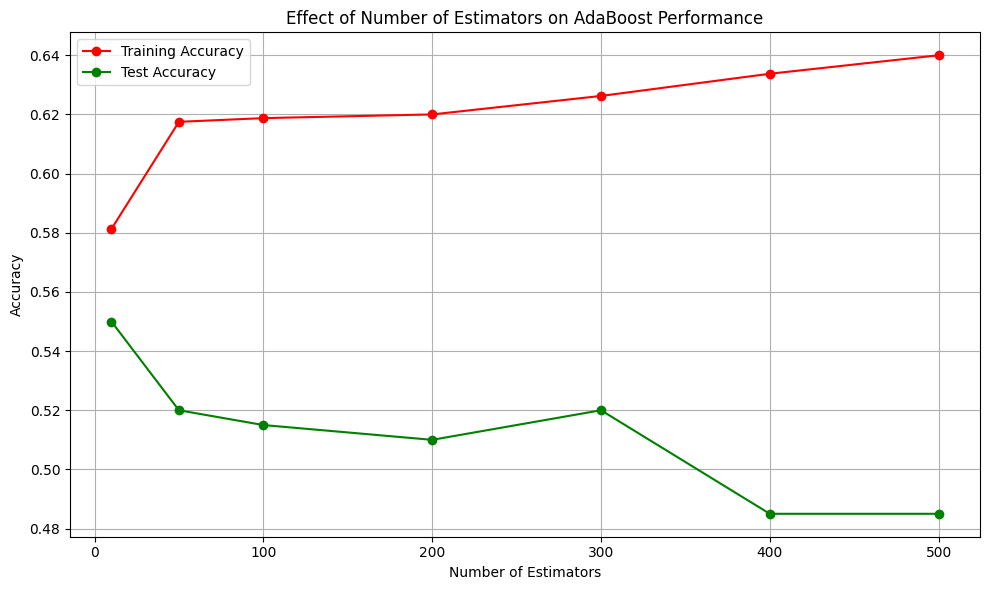

--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 50, 'adaboost__learning_rate': 0.1, 'adaboost__estimator': DecisionTreeClassifier(max_depth=1, random_state=42)}
Best cross-validation score: 0.5513
-------------------------------------------------------------------------------------------------------------------------------
Pipeline test accuracy:  0.5550
Pipeline train accuracy: 0.5537
-------------------------------------------------------------------------------------------------------------------------------
--- Model Comparison ---
Base AdaBoost accuracy: 0.5050
Grid Search tuned accuracy: 0.5650
Pipeline tuned accuracy: 0.5550
-------------------------------------------------------------------------------------------------------------------------------


age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           1
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

In [11]:
# For Various Classes
# Load the dataset
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active']

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print('-' *127)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print('-' *127)

# Grid search for hyperparameter tuning
print("--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm='SAMME')

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print('-' *127) 

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")
print('-' *127) 

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")
print('-' *127) 

# Compare with base model
print("--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print('-' *127) 

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())

## BaggingClassifier

Dataset shape: (1000, 9)
Number of features: 9
Number of classes: 2
Class distribution: [554 446]
-------------------------------------------------------------------------------------------------------------------------------
BaggingClassifier Accuracy test set: 0.4850
BaggingClassifier Accuracy train set: 0.9838
-------------------------------------------------------------------------------------------------------------------------------
Feature Importance (Bagging Classifier):
                 Feature  Importance       Std
0                    age    0.159547  0.034172
1    years_of_experience    0.154817  0.030384
4    client_satisfaction    0.138910  0.021293
6        country_encoded    0.134444  0.035869
8  primary_skill_encoded    0.110594  0.025891
7       language_encoded    0.098185  0.026134
2            hourly_rate    0.094763  0.026584
3                 rating    0.078840  0.022511
5         gender_encoded    0.029899  0.012465
----------------------------------------------

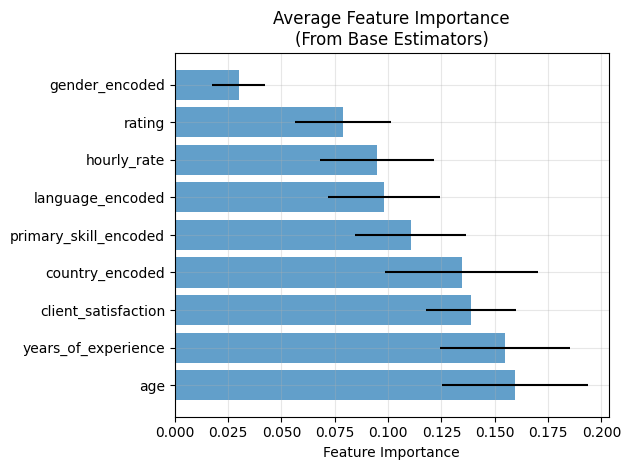

--- Hyperparemeter Tuning ---
Starting grid search...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Grid search completed!
-------------------------------------------------------------------------------------------------------------------------------
Best parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
Best cross-validation score: 0.5713
-------------------------------------------------------------------------------------------------------------------------------
Tuned BaggingClassifier Accuracy: 0.4550
Improvement: -0.0300
-------------------------------------------------------------------------------------------------------------------------------
Feature Importance (Bagging Classifier):
     Feature  Importance       Std
3  Feature_4    0.349314  0.130116
1  Feature_2    0.256070  0.149596
2  Feature_3    0.202166  0.125990
0  Feature_1    0.192451  0.119147


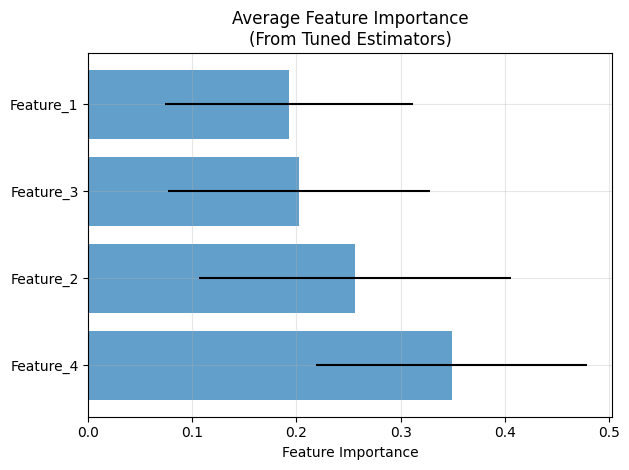

----------------------------------------------------------------------------------------------------


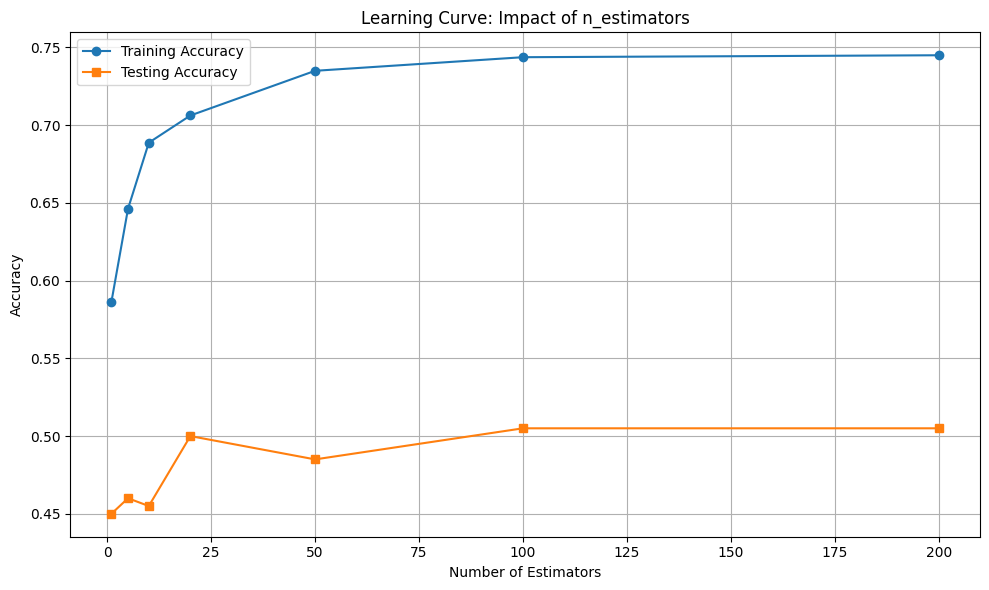

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           1
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           1
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

In [28]:
# Bagging For Various Classes
# Set random seed for reproducibility
np.random.seed(42)

X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active']

# Features and target names
feature_names = X.columns 
target_names = y.values  

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print('-' *127) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42)

# Create and train a simple BaggingClassifier with default parameters
bag_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bag_clf.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = bag_clf.predict(X_test_scaled)
y_pred_train = bag_clf.predict(X_train_scaled)

# Initial accuracy
initial_accuracy = accuracy_score(y_test, y_pred)

print(f"BaggingClassifier Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"BaggingClassifier Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print('-' *127) 

# Method 1: Average feature importance across all estimators
def get_feature_importance_bagging(bagging_model, feature_names):
    """Extract feature importance from BaggingClassifier"""
    # Get feature importance from each estimator
    importances = []
    for estimator in bagging_model.estimators_:
        if hasattr(estimator, 'feature_importances_'):
            importances.append(estimator.feature_importances_)
    
    # Average the importances
    mean_importance = np.mean(importances, axis=0)
    std_importance = np.std(importances, axis=0)
    
    return mean_importance, std_importance

# Get feature importance
mean_importance, std_importance = get_feature_importance_bagging(bag_clf, feature_names)

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importance,
    'Std': std_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (Bagging Classifier):")
print(importance_df)
print('-' *127)  

# Plot 1: Average feature importance from estimators
plt.barh(range(len(importance_df)), importance_df['Importance'], 
         xerr=importance_df['Std'], alpha=0.7)
plt.yticks(range(len(importance_df)), importance_df['Feature'])  # Fixed this line
plt.xlabel('Feature Importance')  # Fixed this line
plt.title('Average Feature Importance\n(From Base Estimators)')  # Fixed this line
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Define parameter grid for GridSearchCV 
print("--- Hyperparemeter Tuning ---")
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10]
}

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42) 

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=base_clf, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to find best parameters
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")
print('-' *127)  

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)  

# Get the best model
best_bag_clf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_bag_clf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned BaggingClassifier Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - initial_accuracy:.4f}")
print('-' *127)  

# Method 1: Average feature importance across all estimators
def get_feature_importance_bagging(bagging_model, feature_names):
    """Extract feature importance from BaggingClassifier"""
    # Get feature importance from each estimator
    importances = []
    for estimator in bagging_model.estimators_:
        if hasattr(estimator, 'feature_importances_'):
            importances.append(estimator.feature_importances_)
    
    # Average the importances
    mean_importance = np.mean(importances, axis=0)
    std_importance = np.std(importances, axis=0)
    
    return mean_importance, std_importance

# Get feature importance
mean_importance, std_importance = get_feature_importance_bagging(best_bag_clf, feature_names)

# Create generic feature names that match the importance array length
n_features = len(mean_importance)
generic_feature_names = [f'Feature_{i+1}' for i in range(n_features)]

importance_df = pd.DataFrame({
    'Feature': generic_feature_names,
    'Importance': mean_importance,
    'Std': std_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (Bagging Classifier):")
print(importance_df)
    
# Plot 1: Average feature importance from estimators
plt.barh(range(len(importance_df)), importance_df['Importance'], 
         xerr=importance_df['Std'], alpha=0.7)
plt.yticks(range(len(importance_df)), importance_df['Feature'])  # Fixed this line
plt.xlabel('Feature Importance')  # Fixed this line
plt.title('Average Feature Importance\n(From Tuned Estimators)')  # Fixed this line
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyzing the impact of n_estimators
print('-' *100) 
n_estimators_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:

    # Create model with current n_estimators value
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_bag_clf.estimator_.max_depth),
        n_estimators=n_estimators,
        max_samples=best_bag_clf.max_samples,
        max_features=best_bag_clf.max_features,
        bootstrap=best_bag_clf.bootstrap,
        bootstrap_features=best_bag_clf.bootstrap_features,
        random_state=42
    )
    
    # Train model
    bag.fit(X_train_scaled, y_train)
    
    # Evaluate on train and test sets
    train_score = accuracy_score(y_train, bag.predict(X_train_scaled))
    test_score = accuracy_score(y_test, bag.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Impact of n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

## GradientBoostingClassifier

In [35]:
len(X_test)

200

Dataset shape: (1000, 9)
Target distribution: [554 446]
Features: Index(['age', 'years_of_experience', 'hourly_rate', 'rating', 'client_satisfaction', 'gender_encoded', 'country_encoded', 'language_encoded', 'primary_skill_encoded'], dtype='object')
-------------------------------------------------------------------------------------------------------------------------------
1. INITIAL MODEL WITH DEFAULT PARAMETERS
-------------------------------------------------------------------------------------------------------------------------------
Accuracy on test set: 0.4500
Accuracy on train set: 0.8137
Length of y_pred 200
Length of y_pred_train 800
-------------------------------------------------------------------------------------------------------------------------------


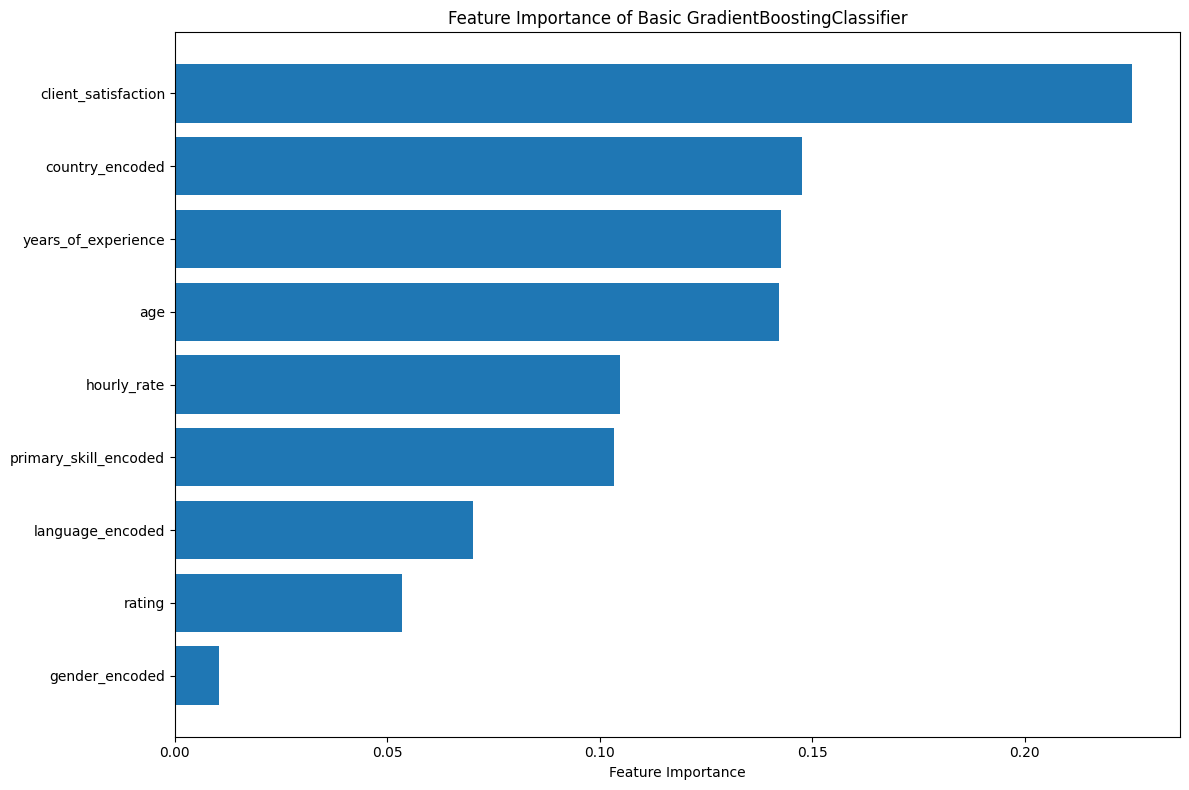

-------------------------------------------------------------------------------------------------------------------------------
2. HYPERPARAMETER TUNING
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
Best cross-validation score: 0.5575
----------------------------------------------------------------------------------------------------
3. EVALUATING OPTIMIZED MODEL
----------------------------------------------------------------------------------------------------
Accuracy on test set: 0.5600
Accuracy on train set: 0.5900
-------------------------------------------------------------------------------------------------------------------------------


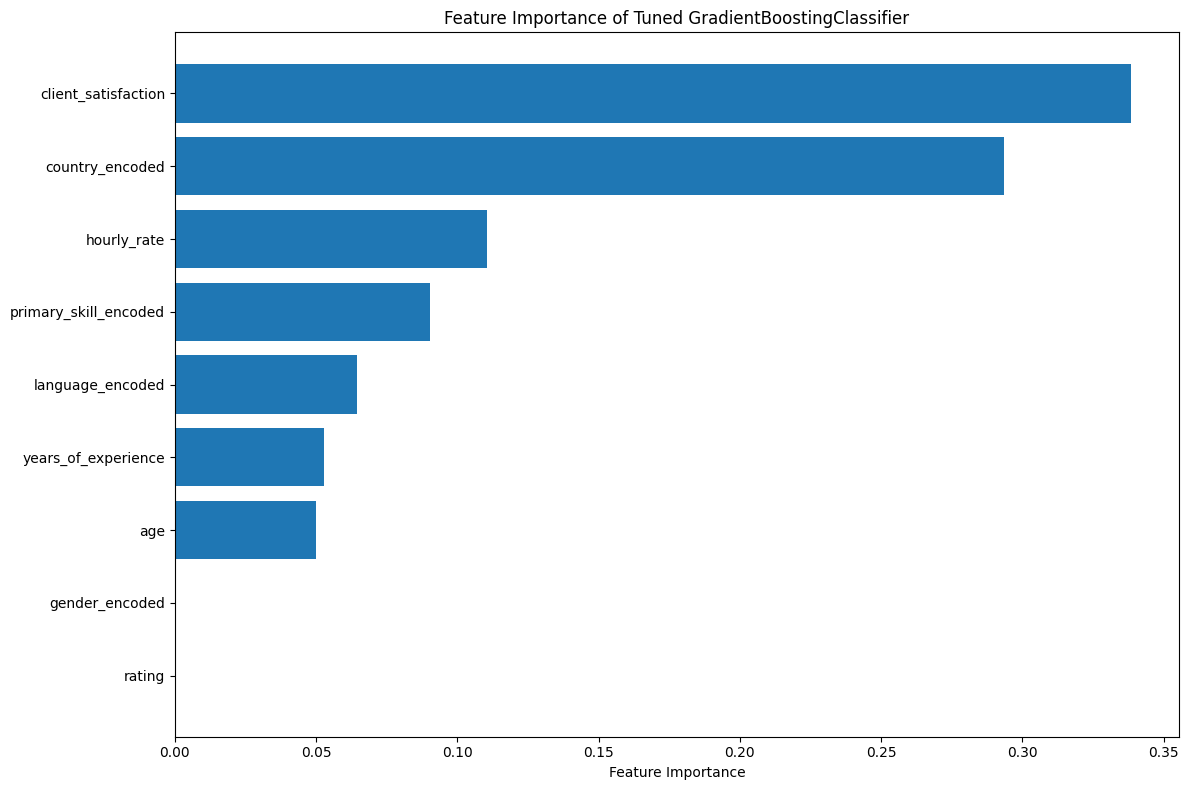

-------------------------------------------------------------------------------------------------------------------------------


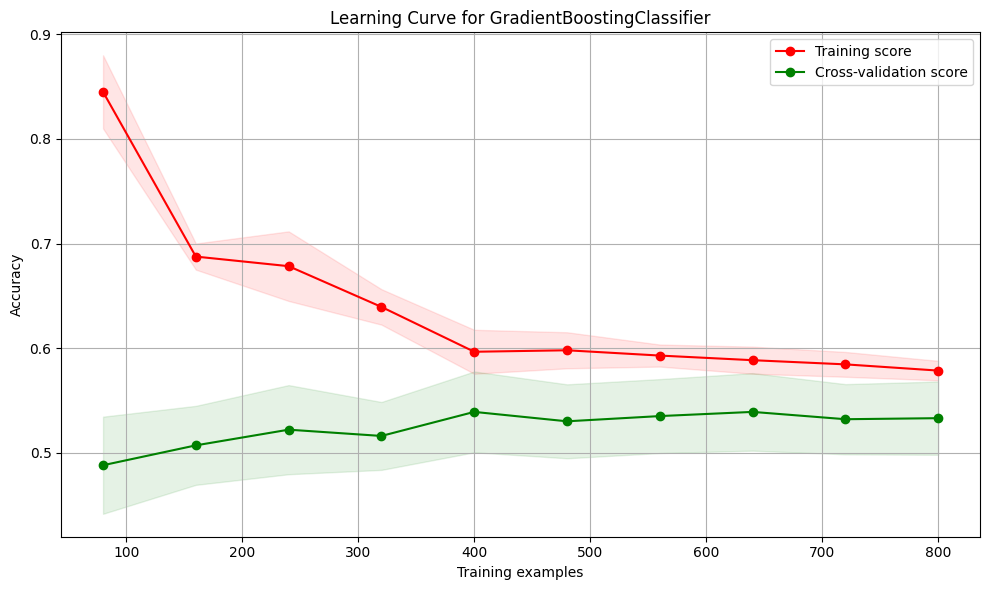

-------------------------------------------------------------------------------------------------------------------------------
4. GRADIENT BOOSTING WITH EARLY STOPPING
-------------------------------------------------------------------------------------------------------------------------------
Number of estimators used (after early stopping): 23
Accuracy with early stopping: 0.5050
-------------------------------------------------------------------------------------------------------------------------------


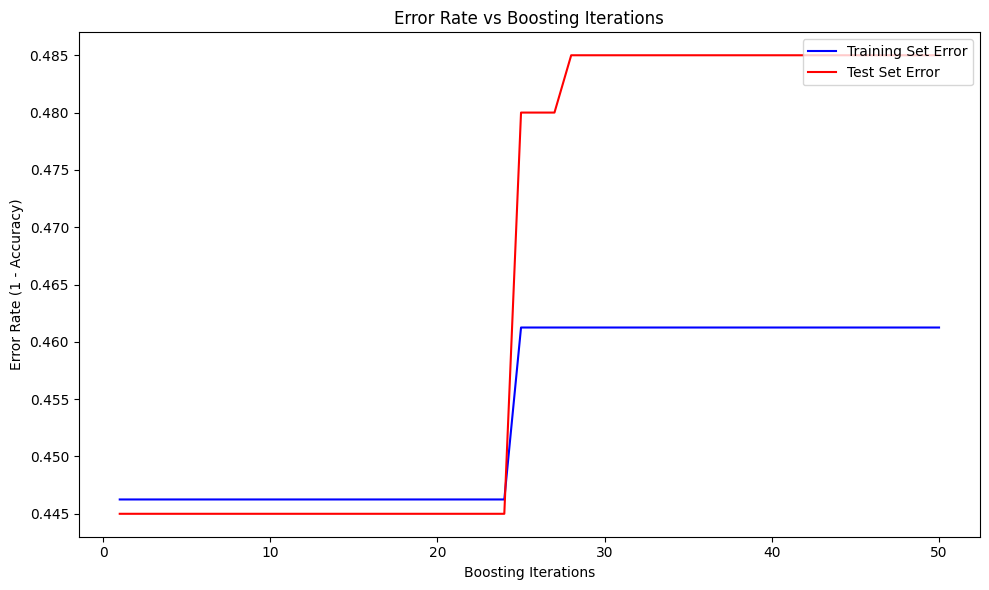

In [38]:
# Set random seed for reproducibility
np.random.seed(42)

# Load dataset (breast cancer dataset as an example)
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active']

# If feature_names are not provided, determine them mechanically
feature_names = X.columns 
#feature_names = X_train.columns  

# If target_names are not provided, determine them mechanically
#target_names = sorted(set(y_test) | set(y_pred))
target_names = y.values

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")
print(f"Features: {feature_names}")
#print(f"Classes: {target_names}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# 1. Basic model with default parameters
print('-' *127)
print("1. INITIAL MODEL WITH DEFAULT PARAMETERS")
print('-' *127)
model = pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy on train set: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Length of y_pred {len(y_pred)}")
print(f"Length of y_pred_train {len(y_pred_train)}")
print('-' *127) 

# 2. Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Basic GradientBoostingClassifier')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# 2. Hyperparameter tuning with GridSearchCV
print('-' *127)
print("2. HYPERPARAMETER TUNING")
print('-' *127)

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__subsample': [0.8, 1.0]
}

# For demonstration, we're using a smaller param_grid. In practice, you might use more values.
# You could also use RandomizedSearchCV for more efficient searching with a larger param space.

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# 3. Evaluate the optimized model
print('-' *100)
print("3. EVALUATING OPTIMIZED MODEL")
print('-' *100)

y_pred_best = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_best_train = best_model.predict(X_train)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Accuracy on train set: {accuracy_score(y_train, y_pred_best_train):.4f}")
print('-' *127) 

# 4. Visualizations
# 4.1 Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = best_model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Tuned GradientBoostingClassifier')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# 4.3 Plot learning curves to analyze bias-variance tradeoff
print('-' *127)
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('learning_curve.png')
    #plt.close()
    plt.show()

plot_learning_curve(best_model, X, y, title="Learning Curve for GradientBoostingClassifier")

# 5. Early stopping example
print('-' *127)
print("4. GRADIENT BOOSTING WITH EARLY STOPPING")
print('-' *127)

# Create validation set
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Build model with early stopping
early_stopping_model = GradientBoostingClassifier(
    n_estimators=500,  # Set a large number, early stopping will determine the actual number used
    learning_rate=0.1,
    max_depth=4,
    validation_fraction=0.2,
    n_iter_no_change=10,  # Stop if no improvement after 10 iterations
    tol=1e-4,
    random_state=42,
    subsample=0.8
)

early_stopping_model.fit(X_train_es, y_train_es)

print(f"Number of estimators used (after early stopping): {early_stopping_model.n_estimators_}")
y_pred_es = early_stopping_model.predict(X_test)
print(f"Accuracy with early stopping: {accuracy_score(y_test, y_pred_es):.4f}")
print('-' *127) 

# 6. Track deviance (error) during training (stages)
test_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_test)):
    # Simply calculate error rate (1 - accuracy) for each iteration
    test_score[i] = 1.0 - accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))

# Get train scores
train_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_train)):
    train_score[i] = 1.0 - accuracy_score(y_train, y_pred)

plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, train_score, 'b-',
         label='Training Set Error')
plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, test_score, 'r-',
         label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate vs Boosting Iterations')
plt.tight_layout()
#plt.savefig('bagging_deviance_plot.png')
#plt.close()
plt.show()

In [45]:
# Dataframe Predicted
y_pred = model.predict(X_test) 

base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())
print(y_pred.shape)

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_best, 3)
display(grid_model_df.head())
print(y_pred_best.shape) 

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_es, 3)
display(pipe_model_df.head()) 
print(y_pred_es.shape) 
 
print('-' *127)
print("Gradient Boosting Classifier tuning complete!")
print('-' *127)

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           1
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

(200,)


age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

(200,)


age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

(200,)
-------------------------------------------------------------------------------------------------------------------------------
Gradient Boosting Classifier tuning complete!
-------------------------------------------------------------------------------------------------------------------------------


## LogisticRegression

Dataset shape: (1000, 9)
Features: 9
Classes: [0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1

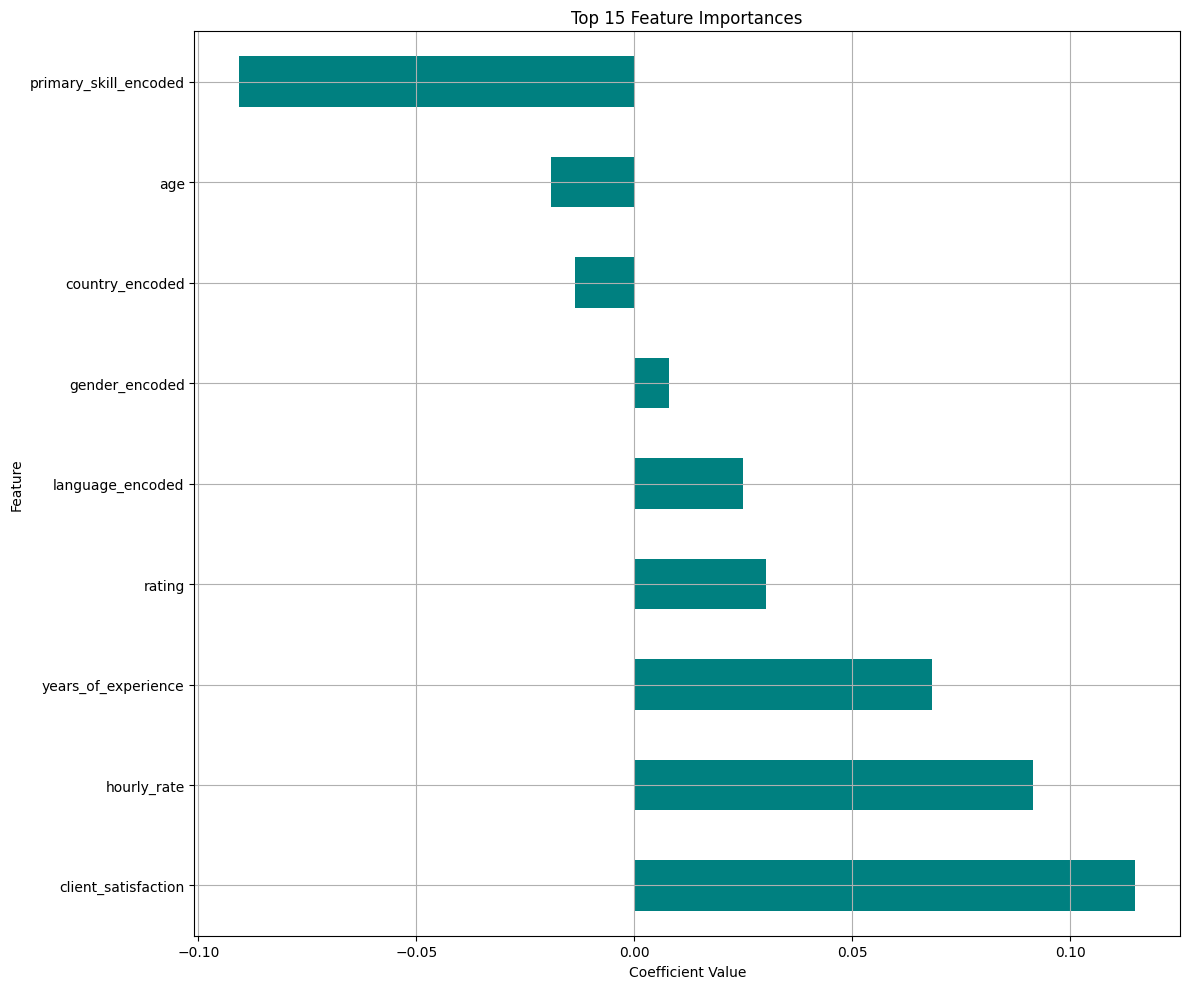

--- Top 10 Most Important Features ---
                       Coefficient
client_satisfaction       0.114941
hourly_rate               0.091436
years_of_experience       0.068234
rating                    0.030259
language_encoded          0.025071
gender_encoded            0.007941
country_encoded          -0.013678
age                      -0.019079
primary_skill_encoded    -0.090624
--- Bottom 10 Least Important Features ---
                       Coefficient
client_satisfaction       0.114941
hourly_rate               0.091436
years_of_experience       0.068234
rating                    0.030259
language_encoded          0.025071
gender_encoded            0.007941
country_encoded          -0.013678
age                      -0.019079
primary_skill_encoded    -0.090624
-------------------------------------------------------------------------------------------------------------------------------
--- Model With Hyperparameter Tuning ---
Fitting 5 folds for each of 144 candidates, total

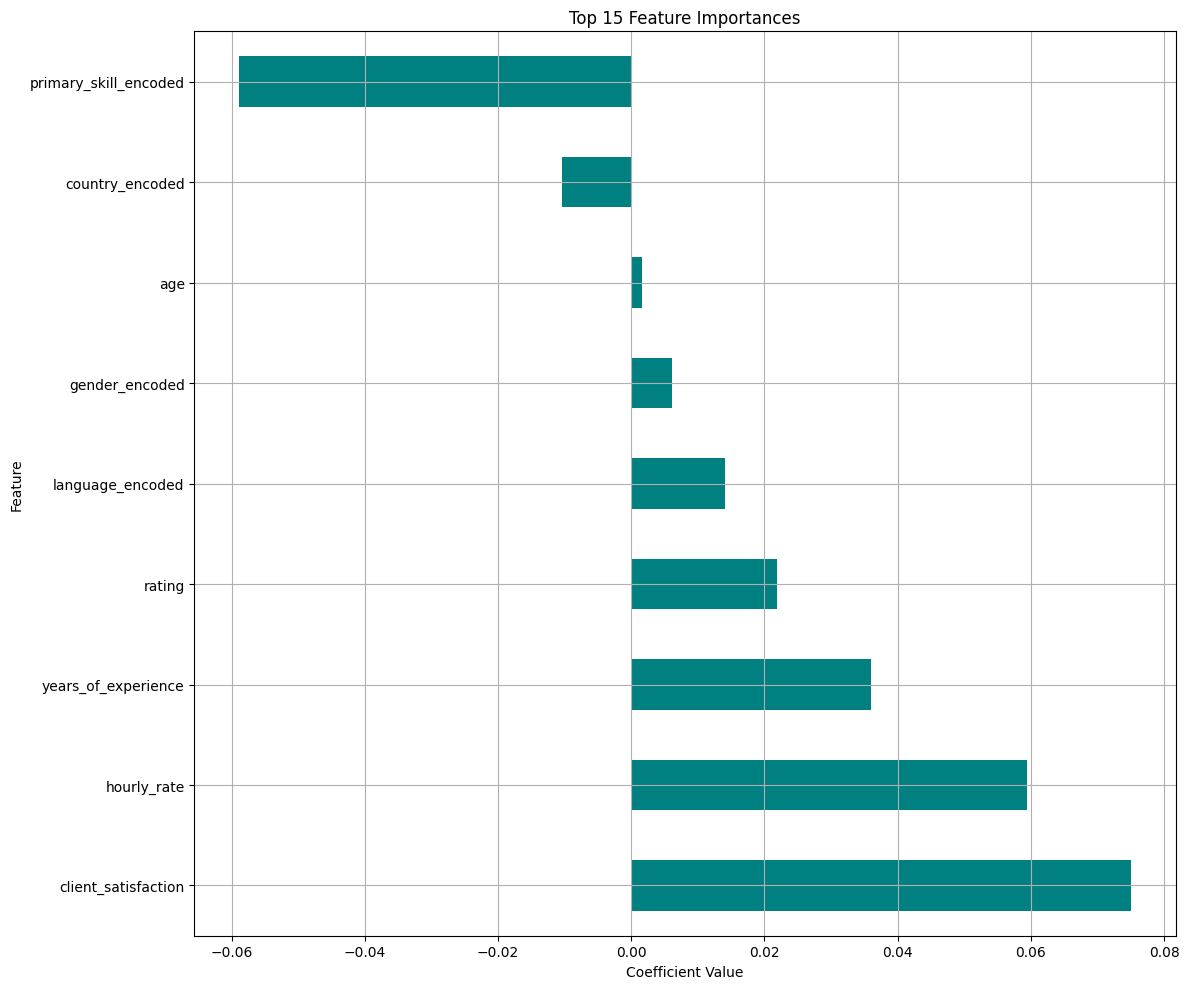

--- Top 10 Most Important Features ---
                       Coefficient
client_satisfaction       0.075057
hourly_rate               0.059371
years_of_experience       0.036065
rating                    0.021875
language_encoded          0.014030
gender_encoded            0.006096
age                       0.001610
country_encoded          -0.010447
primary_skill_encoded    -0.058882
--- Bottom 10 Least Important Features ---
                       Coefficient
client_satisfaction       0.075057
hourly_rate               0.059371
years_of_experience       0.036065
rating                    0.021875
language_encoded          0.014030
gender_encoded            0.006096
age                       0.001610
country_encoded          -0.010447
primary_skill_encoded    -0.058882
-------------------------------------------------------------------------------------------------------------------------------


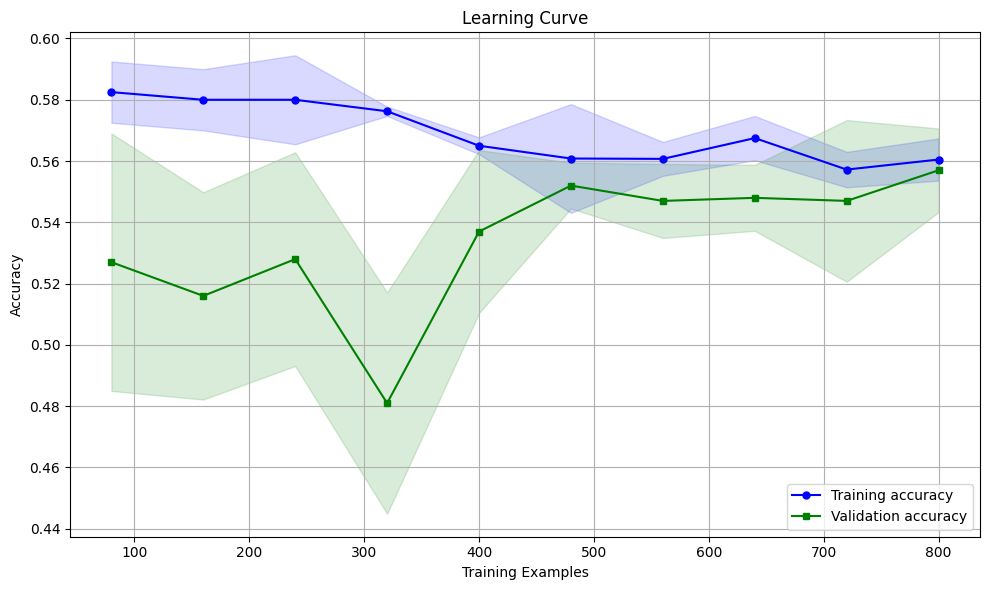

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           0
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

In [47]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active']

# Features and target names
feature_names = X.columns
target_names = y.values

print(f"Dataset shape: {X.shape}")
print(f"Features: {len(feature_names)}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")
print('-' *127)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print('-' *127)  

# Feature importance
basic_model = lr.coef_
if hasattr(basic_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        basic_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances Of Basic Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)  
    
# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
y_pred_pipe_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipe):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_pipe_train):.4f}") 
print('-' *127)   

# Feature importance
pipeline_model = pipeline.named_steps['classifier']
if hasattr(pipeline_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        pipeline_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)  
    
# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [10000, 100000, 1000000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print('-' *127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print('-' *127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Grid Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Pipeline Model Accuracy: {accuracy_score(y_test, y_pred_pipe):.4f}")
print('-' *127) 

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}") 
print('-' *127)   

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)   
    
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipe, 3)
display(pipe_model_df.head())

## MLPClassifier

In [48]:
from sklearn.neural_network import MLPClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active'] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network
mlp_basic = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',              # ReLU activation function
    solver='adam',                  # Adam optimizer
    alpha=0.0001,                  # L2 regularization parameter
    batch_size='auto',             # Batch size
    learning_rate='constant',       # Learning rate schedule
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=500,                  # Maximum iterations
    random_state=42
)

# Train the model
mlp_basic.fit(X_train_scaled, y_train)

# Make predictions
y_pred_basic = mlp_basic.predict(X_test_scaled)

# Evaluate the model
print(f"Training Accuracy: {mlp_basic.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_basic):.4f}")
print(f"\nNumber of iterations: {mlp_basic.n_iter_}")
print(f"Loss: {mlp_basic.loss_:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic))

Training Accuracy: 1.0000
Test Accuracy: 0.5250

Number of iterations: 500
Loss: 0.0209

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       111
           1       0.47      0.47      0.47        89

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.53       200



In [50]:
print("\n" + "=" * 60)
print("EXAMPLE 2: Multi-class Classification")
print("=" * 60)

# Load the iris dataset
#iris = load_iris()
#X_iris, y_iris = iris.data, iris.target

# Load the dataset (binary classification)
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active'] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create neural network for multi-class classification
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),   # Two hidden layers with 10 neurons each
    activation='tanh',             # Tanh activation function
    solver='lbfgs',               # L-BFGS solver (good for small datasets)
    alpha=0.01,                   # Higher regularization
    max_iter=1000,
    random_state=42
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
print(f"Training Accuracy: {mlp.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


EXAMPLE 2: Multi-class Classification
Training Accuracy: 0.9614
Test Accuracy: 0.5233

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       163
           1       0.48      0.50      0.49       137

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.53      0.52      0.52       300


Confusion Matrix:
[[88 75]
 [68 69]]


In [52]:
print("\n" + "=" * 60)
print("EXAMPLE 3: Hyperparameter Tuning")
print("=" * 60)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Create MLPClassifier for grid search
mlp_grid = MLPClassifier(
    solver='adam',
    max_iter=50000,
    random_state=42
)

# Perform grid search
grid_search = GridSearchCV(
    mlp_grid, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on iris data
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Test the best model
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test_scaled)
print(f"Test accuracy with best model: {accuracy_score(y_test, y_pred_best):.4f}")


EXAMPLE 3: Hyperparameter Tuning
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}
Best cross-validation score: 0.5486
Test accuracy with best model: 0.5200



EXAMPLE 4: Training Progress Analysis
Training stopped at iteration: 13
Final training score: None
Validation score: 0.6143


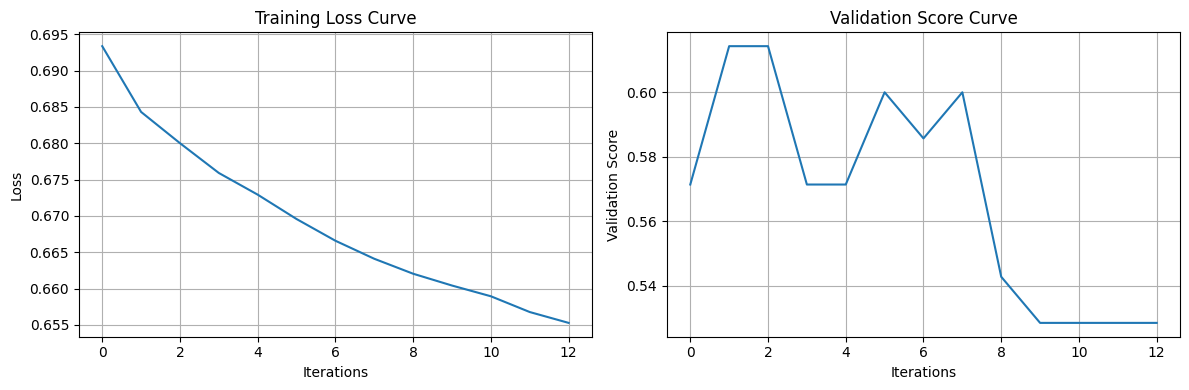

In [55]:
print("\n" + "=" * 60)
print("EXAMPLE 4: Training Progress Analysis")
print("=" * 60)

# Create a neural network with early stopping
mlp_early_stop = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

# Train the model
mlp_early_stop.fit(X_train_scaled, y_train)

print(f"Training stopped at iteration: {mlp_early_stop.n_iter_}")
print(f"Final training score: {mlp_early_stop.best_loss_}")
print(f"Validation score: {mlp_early_stop.best_validation_score_:.4f}")

# Plot loss curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mlp_early_stop.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mlp_early_stop.validation_scores_)
plt.title('Validation Score Curve')
plt.xlabel('Iterations')
plt.ylabel('Validation Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [56]:
print("\n" + "=" * 60)
print("EXAMPLE 5: Comparing Different Activation Functions")
print("=" * 60)

activations = ['relu', 'tanh', 'logistic']
results = {}

for activation in activations:
    mlp_act = MLPClassifier(
        hidden_layer_sizes=(50, 30),
        activation=activation,
        solver='adam',
        alpha=0.001,
        max_iter=500,
        random_state=42
    )
    
    mlp_act.fit(X_train_scaled, y_train)
    y_pred_act = mlp_act.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_act)
    
    results[activation] = {
        'accuracy': accuracy,
        'iterations': mlp_act.n_iter_,
        'final_loss': mlp_act.loss_
    }
    
    print(f"{activation.upper():>10}: Accuracy = {accuracy:.4f}, "
          f"Iterations = {mlp_act.n_iter_:>3}, Loss = {mlp_act.loss_:.4f}")


EXAMPLE 5: Comparing Different Activation Functions
      RELU: Accuracy = 0.5100, Iterations = 500, Loss = 0.0982
      TANH: Accuracy = 0.5267, Iterations = 500, Loss = 0.2295
  LOGISTIC: Accuracy = 0.5033, Iterations = 112, Loss = 0.6802


In [68]:
print("\n" + "=" * 60)
print("EXAMPLE 6: Probability Predictions and Decision Boundaries")
print("=" * 60)

# Get probability predictions
y_prob = mlp.predict_proba(X_test_scaled)

print("Sample probability predictions:")
for i in range(5):
    print(f"Sample {i+1}: Predicted class = {y_pred[i]} "
          f"({y.values[y_pred[i]]})")
    print(f"Probabilities = {y_prob[i]}")
   # print(f"True class = {y_test[i]}"
         # f"({y.values[y_test[i]]})")
    print()


EXAMPLE 6: Probability Predictions and Decision Boundaries
Sample probability predictions:
Sample 1: Predicted class = 1 (1)
Probabilities = [5.51872333e-06 9.99994481e-01]

Sample 2: Predicted class = 1 (1)
Probabilities = [0.00269779 0.99730221]

Sample 3: Predicted class = 0 (0)
Probabilities = [9.99998993e-01 1.00668299e-06]

Sample 4: Predicted class = 1 (1)
Probabilities = [0.0119031 0.9880969]

Sample 5: Predicted class = 0 (0)
Probabilities = [1.00000000e+00 4.68129758e-12]



In [69]:
print("\n" + "=" * 60)
print("EXAMPLE 7: Network Architecture Analysis")
print("=" * 60)

print(f"Network architecture: {mlp.hidden_layer_sizes}")
print(f"Number of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")

# Print weight shapes for each layer
print("\nWeight matrices shapes:")
for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i+1}: {coef.shape}")

print("\nBias vectors shapes:")
for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i+1}: {intercept.shape}") 


EXAMPLE 7: Network Architecture Analysis
Network architecture: (10, 10)
Number of layers: 4
Number of outputs: 1

Weight matrices shapes:
Layer 1: (9, 10)
Layer 2: (10, 10)
Layer 3: (10, 1)

Bias vectors shapes:
Layer 1: (10,)
Layer 2: (10,)
Layer 3: (1,)


## RandomForestClassifier

Dataset shape: (1000, 9)
Features: 9
Classes: [0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1

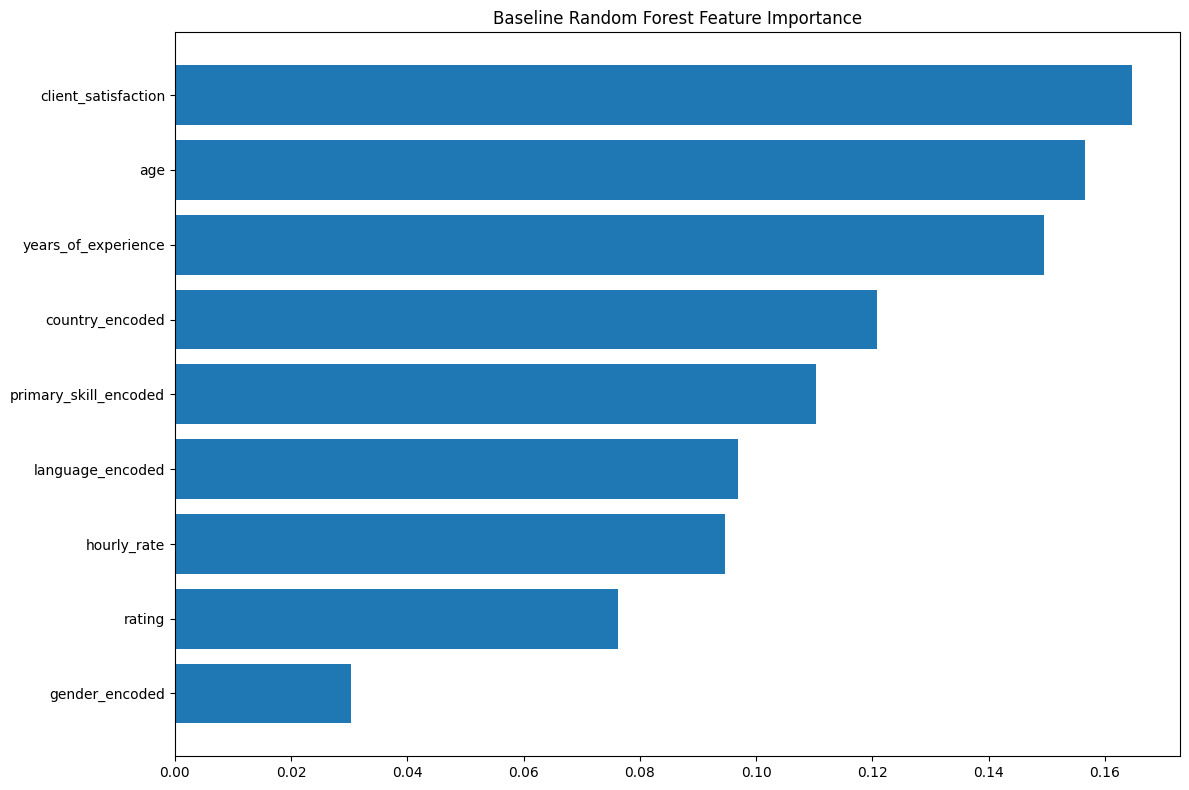

Cross-validation scores: [0.52857143 0.52857143 0.55       0.55714286 0.51428571]
Mean CV accuracy: 0.5357
Standard deviation: 0.0156
-------------------------------------------------------------------------------------------------------------------------------
--- Grid Search Hyperparameter Tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.5600
-------------------------------------------------------------------------------------------------------------------------------


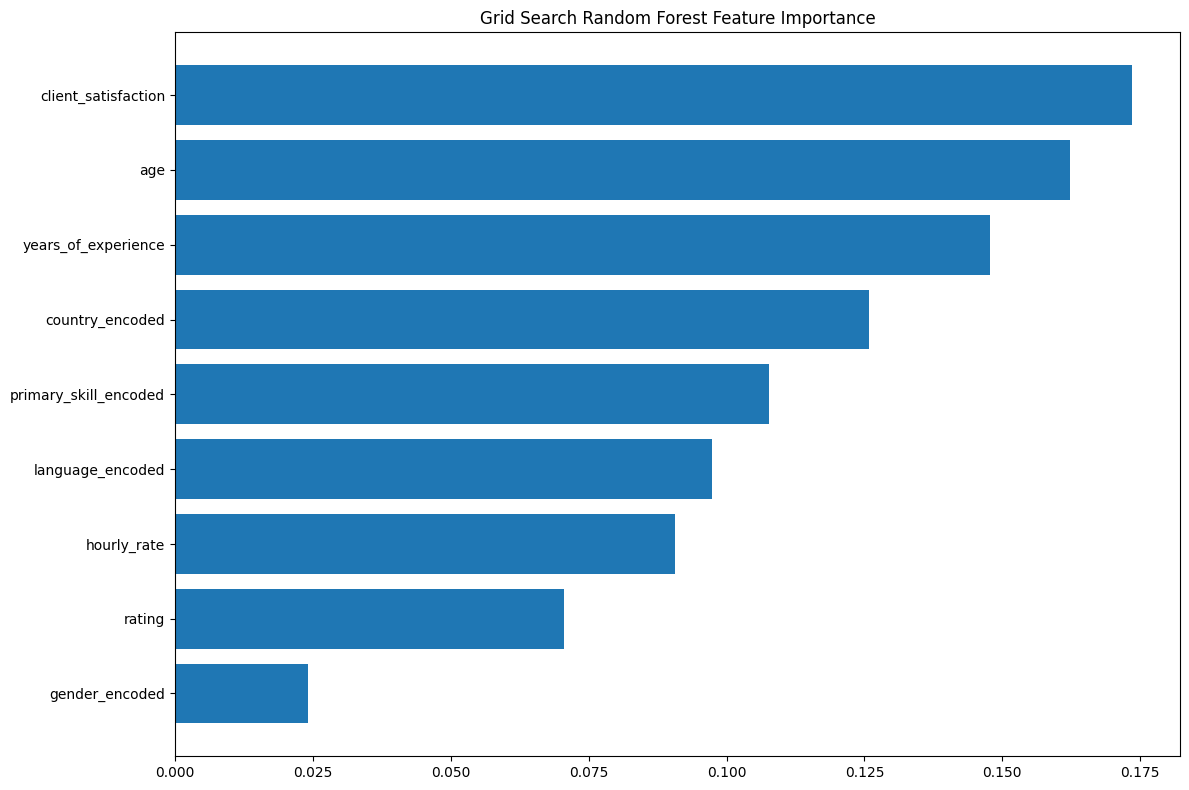

Cross-validation scores: [0.57142857 0.55       0.6        0.56428571 0.51428571]
Mean CV accuracy: 0.5600
Standard deviation: 0.0281
-------------------------------------------------------------------------------------------------------------------------------
--- Randomized Search Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best cross-validation score: 0.5643
-------------------------------------------------------------------------------------------------------------------------------


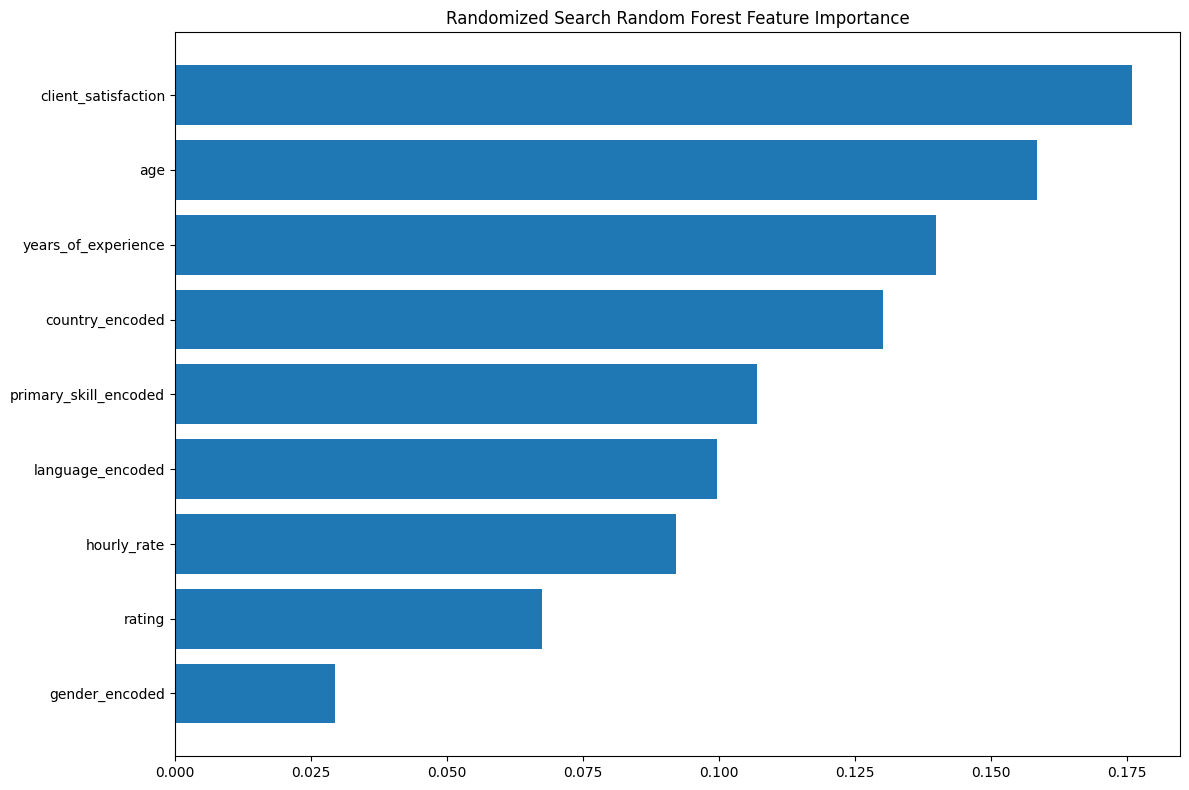

Cross-validation scores: [0.59285714 0.55       0.55714286 0.57142857 0.55      ]
Mean CV accuracy: 0.5643
Standard deviation: 0.0163
-------------------------------------------------------------------------------------------------------------------------------
--- Best Grid Search Model Evaluation ---
Accuracy Test Set: 0.5033
Accuracy Train Set: 0.9700
-------------------------------------------------------------------------------------------------------------------------------


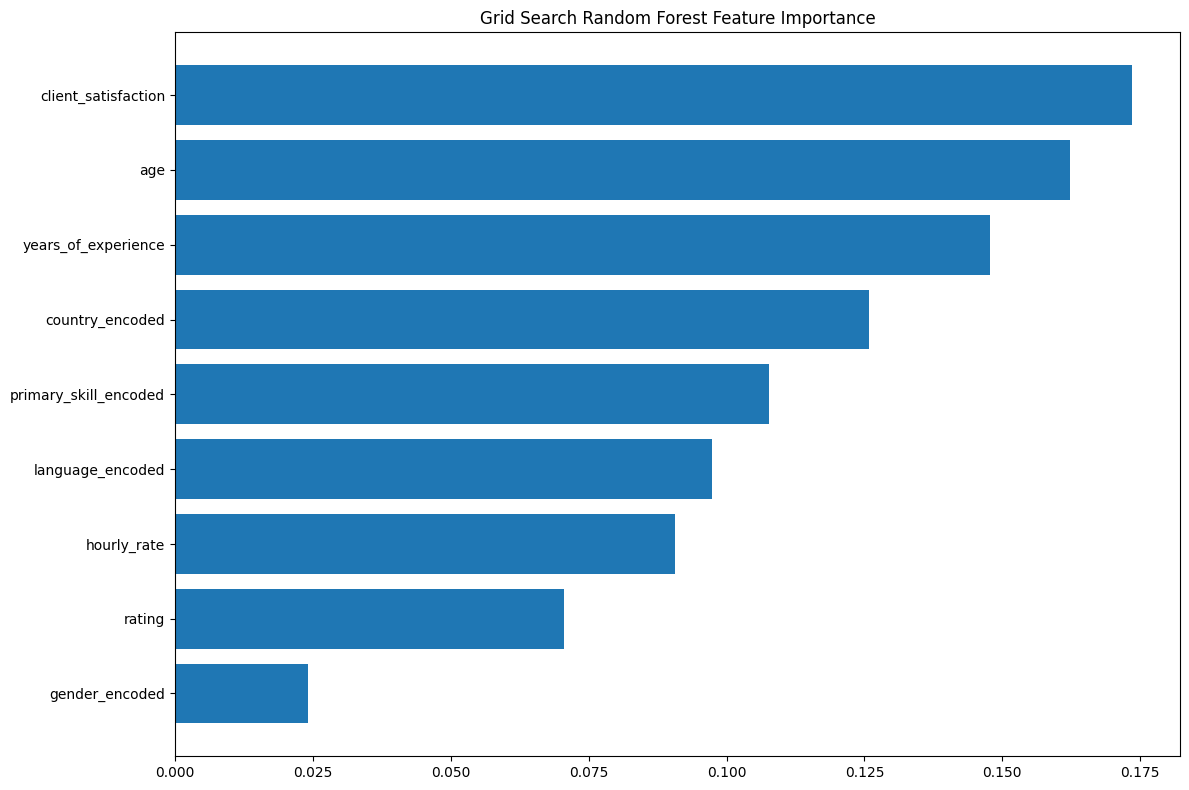

Cross-validation scores: [0.57142857 0.55       0.6        0.56428571 0.51428571]
Mean CV accuracy: 0.5600
Standard deviation: 0.0281
-------------------------------------------------------------------------------------------------------------------------------


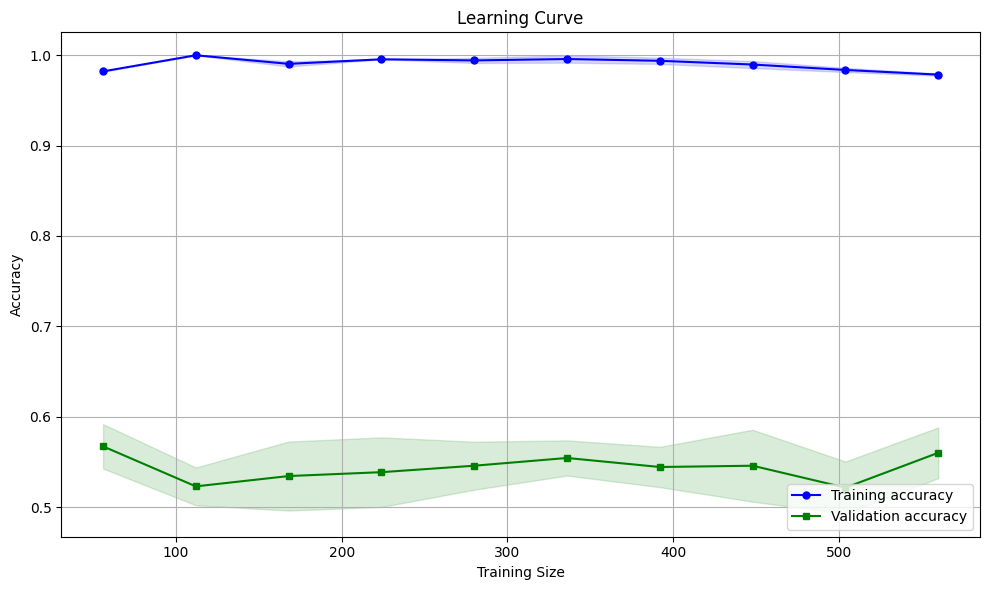

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 70
Fine-tuned accuracy: 0.5614
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 70}
Accuracy Test Set: 0.4933
Accuracy Train Set: 0.9671
-------------------------------------------------------------------------------------------------------------------------------


age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           1
737   31                    2           40       2                   98               0                9                 7                      7           1
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           1
737   31                    2           40       2                   98               0                9                 7                      7           1
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           0
411   42                   10          100       4                   71               1               10                 8                      4           0

age  years_of_experience  hourly_rate  rating  client_satisfaction  gender_encoded  country_encoded  language_encoded  primary_skill_encoded  prediction
521   23                    2           50       3                   72               0               16                10                      5           0
737   31                    2           40       2                   98               0                9                 7                      7           1
740   36                   16           20       3                   72               0                0                14                      7           0
660   36                    9           20       0                   68               0               20                 3                      6           1
411   42                   10          100       4                   71               1               10                 8                      4           0

In [70]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = clean_df.drop(columns=['is_active'], axis=1)
y = clean_df['is_active']

# Features and target names
feature_names = X.columns
target_names = y.values

print(f"Dataset shape: {X.shape}")
print(f"Features: {len(feature_names)}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")
print('-' *127)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print('-' *127) 

# Feature importance analysis
feature_importances = rf_base.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Baseline Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# Cross-validation of the best model
cv_scores = cross_val_score(rf_base, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)  

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127) 

# Feature importance analysis
feature_importances = grid_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127) 

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127) 

# Feature importance analysis
feature_importances = randomized_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Randomized Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(randomized_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
#plt.title('Random Forest Feature Importance')
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

# 7. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 8. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127) 

# 9. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_final_train):.4f}")
print('-' *127) 

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_base, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_final, 3)
display(pipe_model_df.head())

## XGBClassifier

In [82]:
# 1. Basic Manual Tuning
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load your data
X = clean_df.drop(columns=['is_active'])
y = clean_df['is_active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic XGBoost with default parameters
xgb_default = xgb.XGBClassifier(random_state=42)
xgb_default.fit(X_train, y_train)
y_pred_default = xgb_default.predict(X_test)

print(f"Default accuracy Test:  {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Default accuracy Train: {accuracy_score(y_train, xgb_default.predict(X_train)):.4f}")
print('-' *127)

# Manual tuning - trying different parameter combinations
xgb_tuned = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)

print(f"Manually tuned accuracy test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Manually tuned accuracy train: {accuracy_score(y_train, xgb_tuned.predict(X_train)):.4f}")
print('-' *127)

# 2. Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print('-' *127) 

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
print(f"Grid search test accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Grid search train accuracy: {accuracy_score(y_train, best_model.predict(X_train)):.4f}")
print('-' *127)

# 3. Randomized Search (More Efficient)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print('-' *127) 

# 4. Bayesian Optimization with Optuna
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    # Create model and evaluate
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best score:", study.best_value)
print('-' *127) 

# Train final model with best parameters
best_xgb = xgb.XGBClassifier(**study.best_params)
best_xgb.fit(X_train, y_train)

# 5. Progressive Tuning Strategy
# Step 1: Tune number of estimators first
def tune_n_estimators():
    param_grid = {'n_estimators': [50, 100, 200, 300, 500]}
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_estimators']

# Step 2: Tune max_depth and learning_rate
def tune_depth_and_lr(n_estimators):
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(n_estimators=n_estimators, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Step 3: Tune regularization and sampling parameters
def tune_regularization(best_params):
    param_grid = {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    }
    
    grid_search = GridSearchCV(
        xgb.XGBClassifier(**best_params, random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Execute progressive tuning
best_n_estimators = tune_n_estimators()
print(f"Best n_estimators: {best_n_estimators}")
print('-' *127) 

depth_lr_params = tune_depth_and_lr(best_n_estimators)
print(f"Best depth and learning rate: {depth_lr_params}")
print('-' *127) 

# Combine parameters
combined_params = {'n_estimators': best_n_estimators}
combined_params.update(depth_lr_params)

final_params = tune_regularization(combined_params)
combined_params.update(final_params)

print(f"Final best parameters: {combined_params}")
print('-' *127) 

# 6. Using Early Stopping
# Split training data for early stopping
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# XGBoost with early stopping
xgb_early = xgb.XGBClassifier(
    n_estimators=1000,  # Large number
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Fit with early stopping
xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=False
)

print(f"Best iteration: {xgb_early.best_iteration}")
print(f"Best score: {xgb_early.best_score}")
print('-' *127)

Default accuracy Test:  0.5350
Default accuracy Train: 1.0000
-------------------------------------------------------------------------------------------------------------------------------
Manually tuned accuracy test: 0.5100
Manually tuned accuracy train: 1.0000
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.54875
-------------------------------------------------------------------------------------------------------------------------------
Grid search test accuracy: 0.5000
Grid search train accuracy: 0.6825
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fi

[I 2025-08-07 13:52:22,039] A new study created in memory with name: no-name-9a593a40-71c1-4e9c-95f8-a674d94fa234


Best parameters: {'colsample_bytree': 0.890287803355344, 'learning_rate': 0.19402455878073696, 'max_depth': 4, 'n_estimators': 59, 'reg_alpha': 0.9327284833540133, 'reg_lambda': 0.8660638895004084, 'subsample': 0.6180874680424757}
Best cross-validation score: 0.53625
-------------------------------------------------------------------------------------------------------------------------------


[I 2025-08-07 13:52:23,404] Trial 0 finished with value: 0.5125 and parameters: {'n_estimators': 296, 'max_depth': 8, 'learning_rate': 0.02286286678601534, 'subsample': 0.8697600094332363, 'colsample_bytree': 0.9682984615724424, 'reg_alpha': 0.297663633802833, 'reg_lambda': 0.9380262753705989}. Best is trial 0 with value: 0.5125.
[I 2025-08-07 13:52:24,727] Trial 1 finished with value: 0.5225 and parameters: {'n_estimators': 414, 'max_depth': 9, 'learning_rate': 0.22908667651469503, 'subsample': 0.8317106185065509, 'colsample_bytree': 0.6598702491590126, 'reg_alpha': 0.3156129850320649, 'reg_lambda': 0.6651260791255608}. Best is trial 1 with value: 0.5225.
[I 2025-08-07 13:52:25,873] Trial 2 finished with value: 0.5062500000000001 and parameters: {'n_estimators': 341, 'max_depth': 6, 'learning_rate': 0.2837726531354339, 'subsample': 0.8884781245720692, 'colsample_bytree': 0.9680064731353423, 'reg_alpha': 0.2979838542930896, 'reg_lambda': 0.5597810647825603}. Best is trial 1 with value:

Best parameters: {'n_estimators': 72, 'max_depth': 9, 'learning_rate': 0.023598522892687324, 'subsample': 0.6351783510782558, 'colsample_bytree': 0.8769377875581212, 'reg_alpha': 0.6488917398843552, 'reg_lambda': 0.13108915124481255}
Best score: 0.54625
-------------------------------------------------------------------------------------------------------------------------------
Best n_estimators: 300
-------------------------------------------------------------------------------------------------------------------------------
Best depth and learning rate: {'learning_rate': 0.01, 'max_depth': 3}
-------------------------------------------------------------------------------------------------------------------------------
Final best parameters: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 3, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.7}
-----------------------------------------------------------------------------------------------------------

TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

## Regression

### AdaBoostRegressor

In [80]:
X = clean_df.drop(columns=['hourly_rate'], axis=1) 
Y = clean_df['hourly_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. BASIC GRID SEARCH TUNING
print("1. Grid Search Tuning")
print("-" * 127)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Grid search with cross-validation
ada_grid = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(
    ada_grid, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {-grid_search.best_score_:.4f}")
print("-" * 127) 

# Test performance
y_pred_grid = grid_search.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_grid):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_grid):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_grid):.4f}\n")
print("-" * 127) 

# 2. RANDOMIZED SEARCH TUNING
print("2. Randomized Search Tuning")
print("-" * 127)

# Extended parameter distribution for random search
param_dist = {
    'n_estimators': np.arange(10, 500, 10),
    'learning_rate': np.logspace(-3, 0, 100),  # 0.001 to 1.0
    'loss': ['linear', 'square', 'exponential'],
    'estimator__max_depth': [1, 2, 3, 4, 5, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Use DecisionTreeRegressor as base estimator with tunable parameters
base_tree = DecisionTreeRegressor(random_state=42)
ada_random = AdaBoostRegressor(estimator=base_tree, random_state=42)

random_search = RandomizedSearchCV(
    ada_random,
    param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV score: {-random_search.best_score_:.4f}")
print("-" * 127) 

# Test performance
y_pred_random = random_search.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_random):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_random):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_random):.4f}")

# 3. VALIDATION CURVE ANALYSIS
print("3. Validation Curve Analysis")
print("-" * 127)

# Analyze n_estimators
n_estimators_range = np.arange(10, 201, 20)
train_scores, val_scores = validation_curve(
    AdaBoostRegressor(learning_rate=0.1, random_state=42),
    X_train, y_train,
    param_name='n_estimators',
    param_range=n_estimators_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert to positive MSE for easier interpretation
train_scores = -train_scores
val_scores = -val_scores

print("N_estimators validation curve created")
print(f"Optimal n_estimators around: {n_estimators_range[np.argmin(val_scores.mean(axis=1))]}")
print("-" * 127) 

# Analyze learning rate
lr_range = np.logspace(-3, 0, 10)
train_scores_lr, val_scores_lr = validation_curve(
    AdaBoostRegressor(n_estimators=100, random_state=42),
    X_train, y_train,
    param_name='learning_rate',
    param_range=lr_range,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_scores_lr = -train_scores_lr
val_scores_lr = -val_scores_lr

print(f"Optimal learning_rate around: {lr_range[np.argmin(val_scores_lr.mean(axis=1))]:.4f}\n")
print("-" * 127) 

# 4. CUSTOM TUNING WITH DIFFERENT BASE ESTIMATORS
print("4. Custom Base Estimator Tuning")
print("-" * 127)

# Test different base estimators
base_estimators = {
    'shallow_tree': DecisionTreeRegressor(max_depth=1, random_state=42),
    'medium_tree': DecisionTreeRegressor(max_depth=3, random_state=42),
    'deep_tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'pruned_tree': DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
}

results = {}
for name, base_est in base_estimators.items():
    ada = AdaBoostRegressor(
        estimator=base_est,
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Cross-validation
    cv_scores = cross_val_score(
        ada, X_train, y_train, 
        cv=5, scoring='neg_mean_squared_error'
    )
    
    results[name] = {
        'cv_mean': -cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"{name:12} - CV MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print("-" * 127)

# 5. EARLY STOPPING SIMULATION
print("5. Early Stopping Analysis")
print("-" * 127)

# Simulate early stopping by tracking performance vs n_estimators
max_estimators = 200
step = 10
train_errors = []
val_errors = []

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

for n_est in range(step, max_estimators + 1, step):
    ada = AdaBoostRegressor(
        n_estimators=n_est,
        learning_rate=0.1,
        random_state=42
    )
    
    ada.fit(X_train_split, y_train_split)
    
    train_pred = ada.predict(X_train_split)
    val_pred = ada.predict(X_val_split)
    
    train_errors.append(mean_squared_error(y_train_split, train_pred))
    val_errors.append(mean_squared_error(y_val_split, val_pred))

# Find optimal stopping point
optimal_n_est = (np.argmin(val_errors) + 1) * step
print(f"Optimal n_estimators (early stopping): {optimal_n_est}")
print(f"Validation MSE at optimal point: {min(val_errors):.4f}")
print("-" * 127) 

# 6. COMPREHENSIVE TUNING PIPELINE
print("6. Comprehensive Tuning Pipeline")
print("-" * 127)

def tune_adaboost_comprehensive(X_train, y_train, X_test, y_test, n_iter=50):
    """Comprehensive AdaBoost tuning pipeline"""
    
    # Stage 1: Coarse grid search
    coarse_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']
    }
    
    ada_coarse = AdaBoostRegressor(random_state=42)
    coarse_search = GridSearchCV(
        ada_coarse, coarse_grid, cv=3, 
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    coarse_search.fit(X_train, y_train)
    
    # Stage 2: Fine-tuning around best parameters
    best_params = coarse_search.best_params_
    
    fine_grid = {
        'n_estimators': [
            max(10, best_params['n_estimators'] - 50),
            best_params['n_estimators'],
            best_params['n_estimators'] + 50
        ],
        'learning_rate': [
            best_params['learning_rate'] * 0.5,
            best_params['learning_rate'],
            best_params['learning_rate'] * 2.0
        ],
        'loss': [best_params['loss']],
        'estimator__max_depth': [1, 2, 3],
        'estimator__min_samples_leaf': [1, 2, 4]
    }
    
    # Remove values that would be <= 0
    fine_grid['learning_rate'] = [lr for lr in fine_grid['learning_rate'] if lr > 0]
    fine_grid['n_estimators'] = [n for n in fine_grid['n_estimators'] if n > 0]
    
    base_tree = DecisionTreeRegressor(random_state=42)
    ada_fine = AdaBoostRegressor(estimator=base_tree, random_state=42)
    
    fine_search = GridSearchCV(
        ada_fine, fine_grid, cv=5,
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    fine_search.fit(X_train, y_train)
    
    # Final model evaluation
    final_model = fine_search.best_estimator_
    y_pred = final_model.predict(X_test)
    
    results = {
        'best_params': fine_search.best_params_,
        'cv_score': -fine_search.best_score_,
        'test_mse': mean_squared_error(y_test, y_pred),
        'test_mae': mean_absolute_error(y_test, y_pred),
        'test_r2': r2_score(y_test, y_pred),
        'model': final_model
    }
    
    return results

# Run comprehensive tuning
comprehensive_results = tune_adaboost_comprehensive(X_train, y_train, X_test, y_test)

print("Comprehensive Tuning Results:")
print(f"Best parameters: {comprehensive_results['best_params']}")
print(f"CV MSE: {comprehensive_results['cv_score']:.4f}")
print(f"Test MSE: {comprehensive_results['test_mse']:.4f}")
print(f"Test MAE: {comprehensive_results['test_mae']:.4f}")
print(f"Test R²:  {comprehensive_results['test_r2']:.4f}")
print("-" * 127) 

1. Grid Search Tuning
-------------------------------------------------------------------------------------------------------------------------------
Best parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}
Best CV score: -0.0000
-------------------------------------------------------------------------------------------------------------------------------
Test MAE: 0.0000
Test MSE: 0.0000
Test R²: 1.0000

-------------------------------------------------------------------------------------------------------------------------------
2. Randomized Search Tuning
-------------------------------------------------------------------------------------------------------------------------------
Best parameters: {'n_estimators': 30, 'loss': 'exponential', 'learning_rate': 0.093260334688322, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': None}
Best CV score: -0.0000
------------------------------------------------------------------

## BaggingRegressor

In [83]:
# Load data
X = clean_df.drop(columns=['hourly_rate'], axis=1) 
Y = clean_df['hourly_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example 1: Basic Grid Search Tuning
print("1. BASIC GRID SEARCH TUNING")
print("-" * 127)

# Define parameter grid
param_grid_basic = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize bagging regressor with decision tree
bagging_basic = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    random_state=42,
    n_jobs=-1
)

# Grid search
grid_search_basic = GridSearchCV(
    bagging_basic, 
    param_grid_basic, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_basic.fit(X_train, y_train)

print(f"Best parameters: {grid_search_basic.best_params_}")
print(f"Best CV score: {-grid_search_basic.best_score_:.4f}")
print("-" * 127) 

# Test performance
y_pred_basic = grid_search_basic.best_estimator_.predict(X_test)
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_basic):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_basic):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_basic):.4f}\n")
print("-" * 127) 

# Example 2: Advanced Tuning with Different Base Estimators
print("2.TUNING WITH DIFFERENT BASE ESTIMATORS")
print("-" * 127)

# Define different base estimators and their parameter grids
estimators_and_params = {
    'decision_tree': {
        'estimator': DecisionTreeRegressor(random_state=42),
        'params': {
            'estimator__max_depth': [3, 5, 10, None],
            'estimator__min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100, 200],
            'max_samples': [0.7, 1.0]
        }
    },
    'linear_regression': {
        'estimator': LinearRegression(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        }
    }
}

best_models = {}

for name, config in estimators_and_params.items():
    print(f"\nTuning Bagging with {name.replace('_', ' ').title()}:")
    
    bagging = BaggingRegressor(
        estimator=config['estimator'],
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        bagging,
        config['params'],
        cv=3,  # Reduced for faster execution
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    best_models[name] = {
        'model': grid_search.best_estimator_,
        'params': grid_search.best_params_,
        'mse': mse,
        'mae': mae,
        'r2': r2_score(y_test, y_pred)
    }
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R²: {r2_score(y_test, y_pred):.4f}")
    print("-" * 127)
    
# Find best overall model
best_overall = min(best_models.items(), key=lambda x: x[1]['mse'])
print(f"Best overall model: {best_overall[0]} (MSE: {best_overall[1]['mse']:.4f})")
print("-" * 127) 

# Example 3: Randomized Search for Large Parameter Space
print("3.RANDOMIZED SEARCH FOR EFFICIENCY")
print("-" * 127)

# Define large parameter space with distributions
param_dist = {
    'n_estimators': randint(10, 500),
    'max_samples': uniform(0.3, 0.7),  # Between 0.3 and 1.0
    'max_features': uniform(0.3, 0.7),  # Between 0.3 and 1.0
    'estimator__max_depth': randint(1, 20),
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_random = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    random_state=42,
    n_jobs=-1
)

# Randomized search
random_search = RandomizedSearchCV(
    bagging_random,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best parameters from random search:")
for param, value in random_search.best_params_.items():
    if isinstance(value, float):
        print(f"  {param}: {value:.3f}")
    else:
        print(f"  {param}: {value}")

y_pred_random = random_search.best_estimator_.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_random):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_random):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_random):.4f}")
print("-" * 127) 

# Example 4: Custom Evaluation with Cross-Validation
print("4.CUSTOM EVALUATION STRATEGY")
print("-" * 127)

def evaluate_bagging_config(n_est, max_samp, max_feat, max_depth):
    """Custom evaluation function for specific parameter combinations"""
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=max_depth, random_state=42),
        n_estimators=n_est,
        max_samples=max_samp,
        max_features=max_feat,
        random_state=42,
        n_jobs=-1
    )
    
    # Cross-validation scores
    cv_scores = cross_val_score(bagging, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error', n_jobs=-1)
    
    return -cv_scores.mean(), cv_scores.std()

# Test specific configurations
configs = [
    (50, 0.8, 0.8, 10),
    (100, 0.7, 1.0, 5),
    (200, 1.0, 0.6, None),
    (150, 0.9, 0.7, 15)
]

print("Configuration evaluation:")
print("n_est | max_samp | max_feat | max_depth | CV_MSE ± std")
print("-" * 127)

best_config = None
best_score = float('inf')

for config in configs:
    n_est, max_samp, max_feat, max_depth = config
    mean_score, std_score = evaluate_bagging_config(*config)
    
    print(f"{n_est:5d} | {max_samp:8.1f} | {max_feat:8.1f} | {str(max_depth):9s} | "
          f"{mean_score:6.3f} ± {std_score:.3f}")
    
    if mean_score < best_score:
        best_score = mean_score
        best_config = config

print(f"Best configuration: n_estimators={best_config[0]}, max_samples={best_config[1]}, "
      f"max_features={best_config[2]}, max_depth={best_config[3]}")
print("-" * 127)
    
# Example 6: Learning Curves for Optimal n_estimators
print("6.LEARNING CURVE ANALYSIS")
print("-" * 127)

# Test different numbers of estimators
n_estimators_range = [10, 25, 50, 75, 100, 150, 200, 300]
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
        n_estimators=n_est,
        max_samples=0.8,
        max_features=0.8,
        random_state=42,
        n_jobs=-1
    )
    
    bagging.fit(X_train, y_train)
    
    train_pred = bagging.predict(X_train)
    test_pred = bagging.predict(X_test)
    
    train_scores.append(mean_squared_error(y_train, train_pred))
    test_scores.append(mean_squared_error(y_test, test_pred))

print("n_estimators | Train MSE | Test MSE | Difference")
print("-" * 127) 

for i, n_est in enumerate(n_estimators_range):
    diff = abs(train_scores[i] - test_scores[i])
    print(f"{n_est:12d} | {train_scores[i]:9.3f} | {test_scores[i]:8.3f} | {diff:10.3f}")

# Find optimal n_estimators (minimum test error)
optimal_n_est = n_estimators_range[np.argmin(test_scores)]
print(f"Optimal n_estimators based on test MSE: {optimal_n_est}")
print("-" * 127)

1. BASIC GRID SEARCH TUNING
-------------------------------------------------------------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
Best CV score: -0.0000
-------------------------------------------------------------------------------------------------------------------------------
Test MAE: 0.0000
Test MSE: 0.0000
Test R²: 1.0000

-------------------------------------------------------------------------------------------------------------------------------
2.TUNING WITH DIFFERENT BASE ESTIMATORS
-------------------------------------------------------------------------------------------------------------------------------

Tuning Bagging with Decision Tree:
Best params: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'max_samples': 0.7, 'n_estimators': 50}
Test MSE: 0.0000
Test MAE: 0.0000
Test R²: 1.0000
-----------------

NameError: name 'load_diabetes' is not defined

## ElasticNet

Best parameters: alpha          1.000000
l1_ratio       0.100000
mse          821.866678
mae           24.405219
r2             0.003496
n_nonzero      8.000000
Name: 8, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'elastic_net__alpha': 1.623776739188721, 'elastic_net__l1_ratio': 0.1}
Best CV score: 706.265675936957
-------------------------------------------------------------------------------------------------------------------------------
Test R²: 0.0025905814815592176
Test MSE: 822.6134179230841
Test MAE: 24.39105436544217
-------------------------------------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'elastic_net__alpha': 1.0431827200054888, 'elastic_net__l1_ratio': 0.2492560471

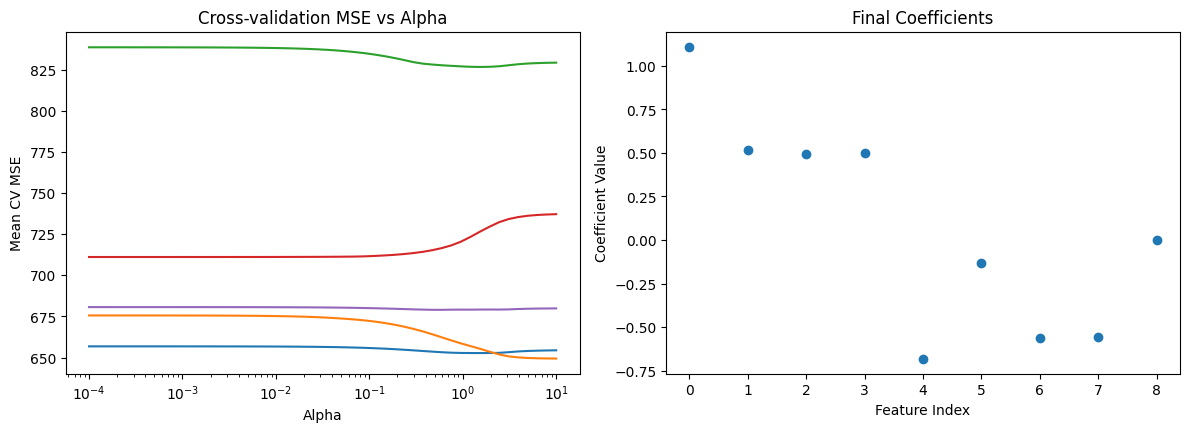

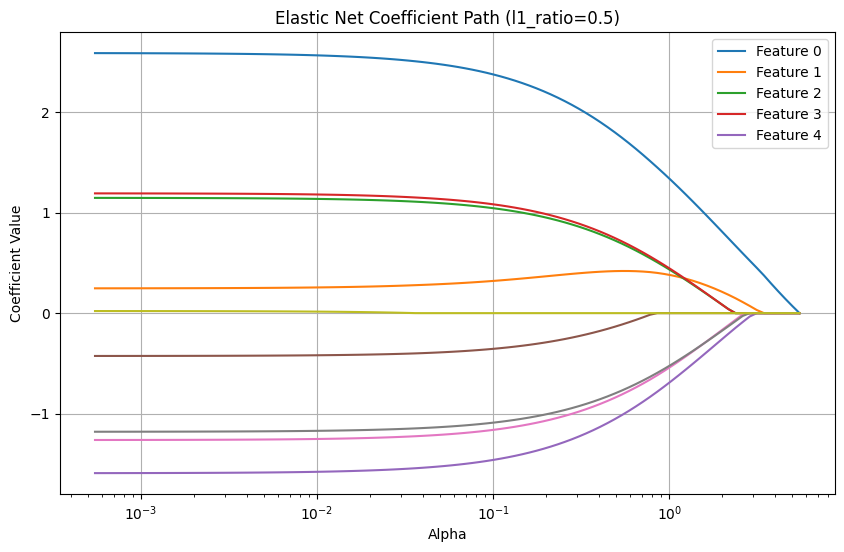

In [86]:
# Split and scale data
X = clean_df.drop(columns=['hourly_rate'])
y = clean_df['hourly_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different alpha and l1_ratio combinations
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

results = []
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            'alpha': alpha,
            'l1_ratio': l1_ratio,
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'n_nonzero': np.sum(model.coef_ != 0)
        })

# Find best parameters
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['mse'].idxmin()]
print("Best parameters:", best_params)
print('-' *127) 

# Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create pipeline with scaling and elastic net
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', ElasticNet(random_state=42, max_iter=1000))
])

# Define parameter grid
param_grid = {
    'elastic_net__alpha': np.logspace(-4, 1, 20),  # 20 values from 0.0001 to 10
    'elastic_net__l1_ratio': np.linspace(0.1, 0.9, 9)  # 9 values from 0.1 to 0.9
}

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", -grid_search.best_score_)
print('-' *127)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print('-' *127) 

# Random Search for Efficiency
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define parameter distributions
param_distributions = {
    'elastic_net__alpha': loguniform(1e-4, 10),
    'elastic_net__l1_ratio': uniform(0.1, 0.8)  # 0.1 to 0.9
}

# Random search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", -random_search.best_score_)
print('-' *127) 

# Using ElasticNetCV for Built-in Cross-Validation
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV automatically performs cross-validation
elastic_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 50),
    l1_ratio=np.linspace(0.1, 0.9, 9),
    cv=5,
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)

# Fit on scaled data
elastic_cv.fit(X_train_scaled, y_train)

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)
print('-' *127) 

# Evaluate
y_pred = elastic_cv.predict(X_test_scaled)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print('-' *127)

"""
# Plot coefficient paths
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.semilogx(elastic_cv.alphas_, elastic_cv.mse_path_.mean(axis=1))
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Cross-validation MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(range(len(elastic_cv.coef_)), elastic_cv.coef_, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Final Coefficients')

plt.tight_layout()
plt.show()
""" 

# Plot coefficient paths
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
# Fix: Use axis=0 to average across CV folds, not axis=1
plt.semilogx(elastic_cv.alphas_, elastic_cv.mse_path_.mean(axis=0))
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Cross-validation MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(range(len(elastic_cv.coef_)), elastic_cv.coef_, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Final Coefficients')

plt.tight_layout()
plt.show() 

"""
# Alternative approach if you want to be more explicit:
mean_mse = np.mean(elastic_cv.mse_path_, axis=0)
plt.semilogx(elastic_cv.alphas_, mean_mse)
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Cross-validation MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(range(len(elastic_cv.coef_)), elastic_cv.coef_, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Final Coefficients')

plt.tight_layout()
plt.show() 
""" 

# Advanced Tuning with Custom Scoring
from sklearn.metrics import make_scorer

def custom_score(y_true, y_pred):
    """Custom scoring function combining MSE and sparsity"""
    mse = mean_squared_error(y_true, y_pred)
    return -mse  # Negative because GridSearchCV maximizes

# Custom scorer
custom_scorer = make_scorer(custom_score)

# Grid search with custom scoring
param_grid_advanced = {
    'elastic_net__alpha': np.logspace(-3, 1, 15),
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_search_custom = GridSearchCV(
    pipeline,
    param_grid_advanced,
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1
)

grid_search_custom.fit(X_train, y_train)

# Regularization Path Visualization
from sklearn.linear_model import enet_path

# Compute regularization path
alphas, coefs, _ = enet_path(X_train_scaled, y_train, l1_ratio=0.5, eps=1e-4)

# Plot coefficient paths
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[0]):
    plt.semilogx(alphas, coefs[i, :], label=f'Feature {i}' if i < 5 else "")

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Coefficient Path (l1_ratio=0.5)')
plt.legend()
plt.grid(True)
plt.show()

## Lasso

EXAMPLE 1: Basic Lasso Regression

Mean Squared Error: 782.1303
Mean Absolute Error: 23.7407
R² Score: -0.0054
Coefficients: [ 0.18146237  0.11200278  0.50374089  0.         -0.16155309 -0.
 -0.25437579 -0.15118333 -0.        ]
Number of zero coefficients: 3
EXAMPLE 2: Feature Selection with Lasso

Selected features: 0 out of 9
Feature indices selected: []
EXAMPLE 3: Optimal Alpha Selection with CV

Optimal alpha: 3.0888
CV Score (R²): 0.0214
Test R² Score: -0.0016
EXAMPLE 4: Alpha Comparison

Alpha    CV Score     Test Score   Features  
0.1      -0.0010±0.019  -0.0024      9         
1.0      0.0042±0.019  -0.0054      6         
10.0     0.0043±0.011  0.0004       4         
100.0    -0.0013±0.001  -0.0005      0         
EXAMPLE 5: Regularization Path



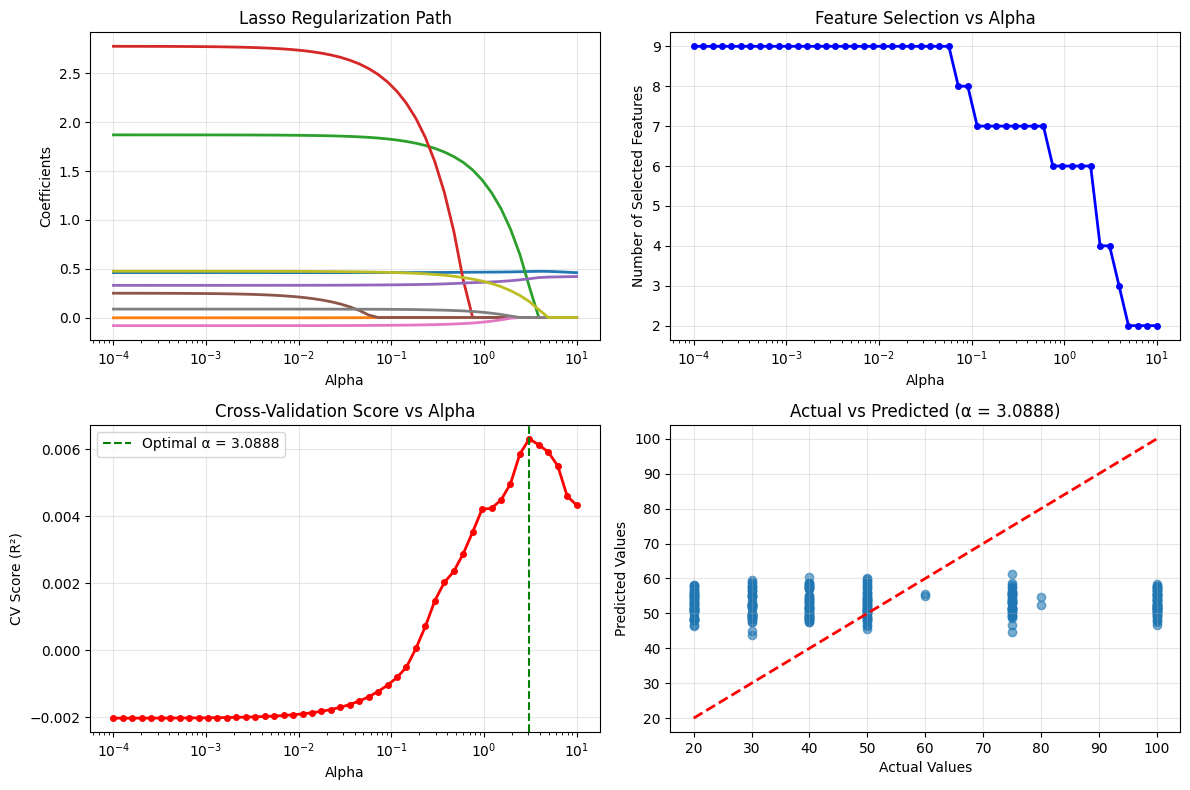

Final Model Comparison:

Linear Regression   : Train R²=0.0273, Test R²=-0.0015, Features=9
Ridge (α=1.0)       : Train R²=0.0273, Test R²=-0.0015, Features=9
Lasso (α=1.0)       : Train R²=0.0245, Test R²=-0.0054, Features=6
Lasso (CV-optimal)  : Train R²=0.0214, Test R²=-0.0016, Features=5


In [98]:
# Example 1: Basic Lasso Regression
print("EXAMPLE 1: Basic Lasso Regression\n")

# Generate synthetic data
#X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

X = clean_df.drop(columns=['hourly_rate'])
y = clean_df['hourly_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit Lasso model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Coefficients: {lasso.coef_}")
print(f"Number of zero coefficients: {sum(lasso.coef_ == 0)}")
print("=" * 127) 

# Example 2: Feature Selection with Lasso
print("EXAMPLE 2: Feature Selection with Lasso\n")

# Scale features (recommended for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso with higher alpha for more regularization
lasso_selective = Lasso(alpha=5.0, random_state=42)
lasso_selective.fit(X_train_scaled, y_train)

# Count selected features
selected_features = np.sum(lasso_selective.coef_ != 0)
print(f"Selected features: {selected_features} out of {X.shape[1]}")
print(f"Feature indices selected: {np.where(lasso_selective.coef_ != 0)[0]}")
print("=" * 127) 

# Example 3: Cross-Validation for Alpha Selection
print("EXAMPLE 3: Optimal Alpha Selection with CV\n")

# Use LassoCV to find optimal alpha
from sklearn.linear_model import Lasso, LassoCV
alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print(f"Optimal alpha: {lasso_cv.alpha_:.4f}")
print(f"CV Score (R²): {lasso_cv.score(X_train, y_train):.4f}")

# Evaluate on test set
y_pred_cv = lasso_cv.predict(X_test)
test_r2 = r2_score(y_test, y_pred_cv)
print(f"Test R² Score: {test_r2:.4f}")
print("=" * 127) 

# Example 4: Comparing Different Alpha Values
print("EXAMPLE 4: Alpha Comparison\n")

# Test different alpha values
alphas_test = [0.1, 1.0, 10.0, 100.0]
results = []

for alpha in alphas_test:
    lasso_temp = Lasso(alpha=alpha, random_state=42)
    lasso_temp.fit(X_train, y_train)
    
    # Cross-validation score
    cv_scores = cross_val_score(lasso_temp, X_train, y_train, cv=5)
    
    # Test score
    test_score = lasso_temp.score(X_test, y_test)
    
    # Number of selected features
    n_features = np.sum(lasso_temp.coef_ != 0)
    
    results.append({
        'alpha': alpha,
        'cv_score_mean': cv_scores.mean(),
        'cv_score_std': cv_scores.std(),
        'test_score': test_score,
        'n_features': n_features
    })

# Display results
print(f"{'Alpha':<8} {'CV Score':<12} {'Test Score':<12} {'Features':<10}")

for result in results:
    print(f"{result['alpha']:<8} {result['cv_score_mean']:.4f}±{result['cv_score_std']:.3f}  "
          f"{result['test_score']:<12.4f} {result['n_features']:<10}")
print("=" * 127)  

# Example 5: Regularization Path Visualization
print("EXAMPLE 5: Regularization Path\n")

from sklearn.linear_model import lasso_path

# Compute regularization path
alphas_path, coefs_path, _ = lasso_path(X_train, y_train, alphas=alphas)

# Plot the regularization path
plt.figure(figsize=(12, 8))

# Plot coefficient paths
plt.subplot(2, 2, 1)
for i in range(coefs_path.shape[0]):
    plt.plot(alphas_path, coefs_path[i], linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regularization Path')
plt.grid(True, alpha=0.3)

# Plot number of selected features vs alpha
plt.subplot(2, 2, 2)
n_features_path = [np.sum(coef != 0) for coef in coefs_path.T]
plt.plot(alphas_path, n_features_path, 'bo-', linewidth=2, markersize=4)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Selected Features')
plt.title('Feature Selection vs Alpha')
plt.grid(True, alpha=0.3)

# Plot CV scores vs alpha
plt.subplot(2, 2, 3)
cv_scores_path = []
for alpha in alphas_path:
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    scores = cross_val_score(lasso_temp, X_train, y_train, cv=5)
    cv_scores_path.append(scores.mean())

plt.plot(alphas_path, cv_scores_path, 'ro-', linewidth=2, markersize=4)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV Score (R²)')
plt.title('Cross-Validation Score vs Alpha')
plt.grid(True, alpha=0.3)

# Highlight optimal alpha
plt.axvline(x=lasso_cv.alpha_, color='green', linestyle='--', 
           label=f'Optimal α = {lasso_cv.alpha_:.4f}')
plt.legend()

# Plot actual vs predicted for optimal model
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_cv, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (α = {lasso_cv.alpha_:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final comparison with different models
print("Final Model Comparison:\n")

from sklearn.linear_model import LinearRegression, Ridge

models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=1.0)': Lasso(alpha=1.0, random_state=42),
    'Lasso (CV-optimal)': lasso_cv
}

for name, model in models.items():
    if name != 'Lasso (CV-optimal)':  # Already fitted
        model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    if hasattr(model, 'coef_'):
        n_features = np.sum(model.coef_ != 0) if hasattr(model, 'coef_') else X_train.shape[1]
    else:
        n_features = X_train.shape[1]
    
    print(f"{name:<20}: Train R²={train_score:.4f}, Test R²={test_score:.4f}, Features={n_features}")
    
print("=" * 127)

## LinearRegression

Dataset shape: (1000, 9)
Feature names: Index(['age', 'years_of_experience', 'rating', 'is_active', 'client_satisfaction', 'gender_encoded', 'country_encoded', 'language_encoded', 'primary_skill_encoded'], dtype='object')
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


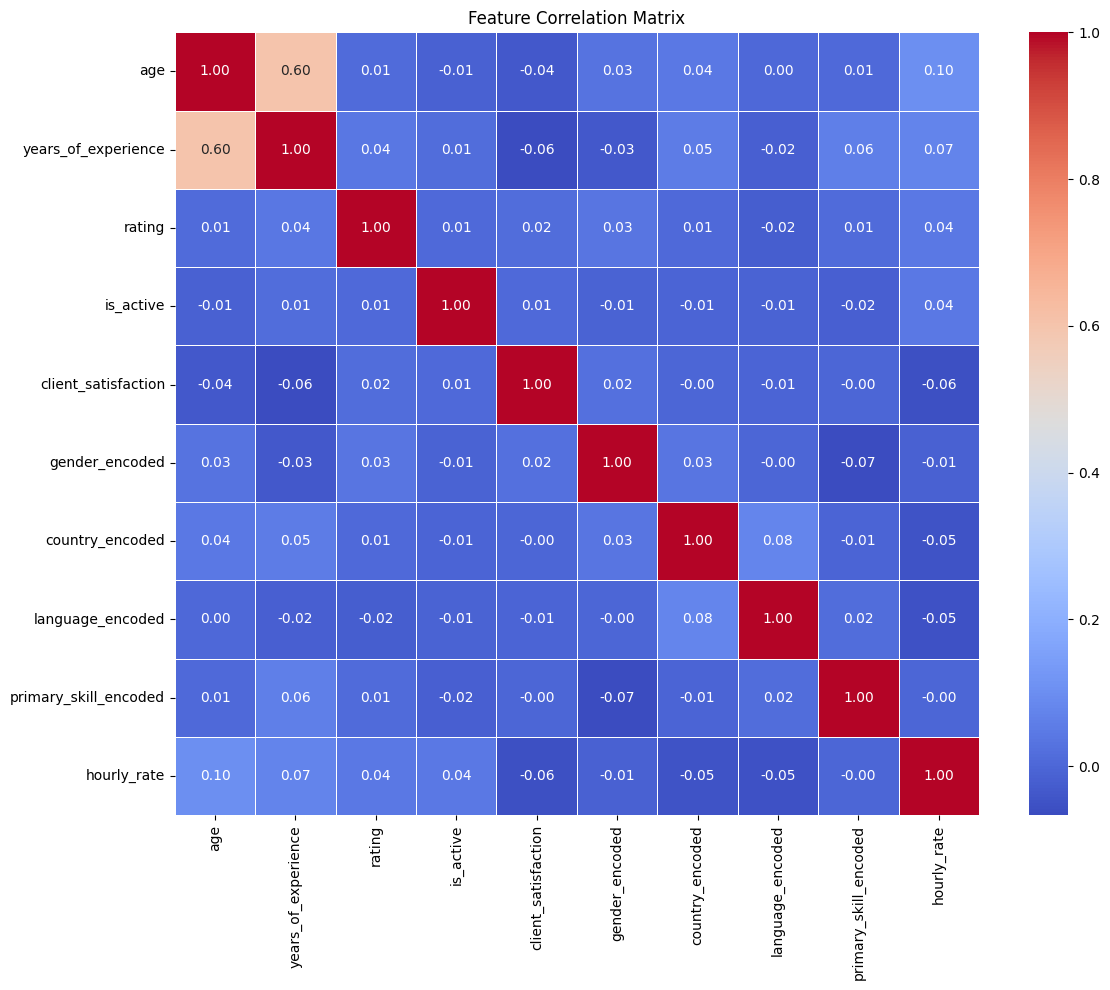

Feature correlation with target (hourly_rate):
hourly_rate              1.000000
age                      0.103112
years_of_experience      0.072020
rating                   0.044001
is_active                0.043961
primary_skill_encoded   -0.000171
gender_encoded          -0.014929
country_encoded         -0.049426
language_encoded        -0.051827
client_satisfaction     -0.057328
Name: hourly_rate, dtype: float64
=== Cross-Validation ===
Cross-Validation MSE: 729.0228 ± 58.7099
Cross-Validation MAE: 22.8691 ± 1.1170
Cross-Validation R²: 0.0007 ± 0.0183
=== Basic Linear Regression ===
MSE test set: 824.4159
MSE train set: 691.4464

R² Score test: 0.0004
R² Score train: 0.0229

MAE test set: 24.5998
MAE train set: 22.1348

Coefficients: [ 0.21863713  0.02683755  0.85137648  2.39721233 -0.1468622  -0.85273635
 -0.21089876 -0.24659338  0.00724775]
Intercept: 56.16275872769838

Selected features: ['age' 'years_of_experience' 'rating' 'is_active' 'client_satisfaction'
 'gender_encoded' '

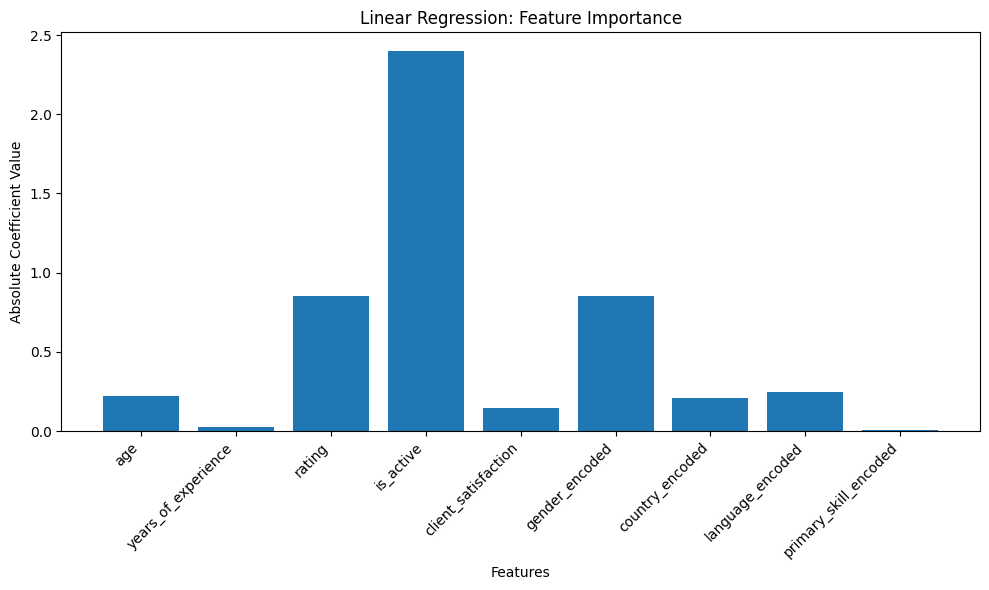

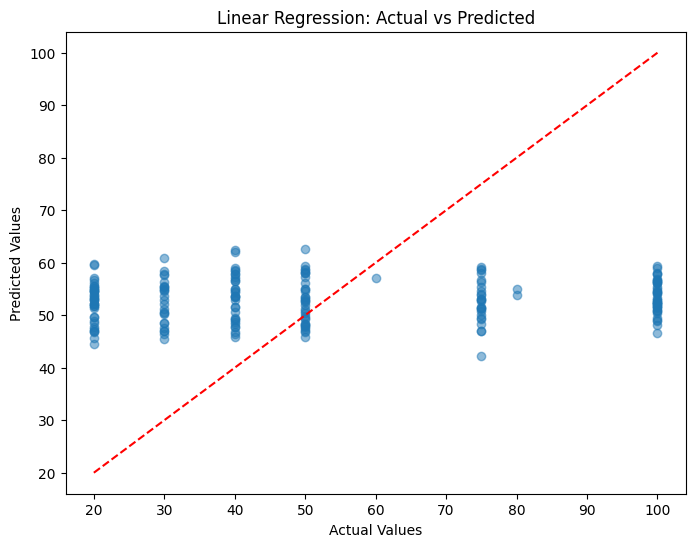

=== Scaled Linear Regression ===
MSE test set: 824.4159
MSE train set: 691.4464

R² Score test: 0.0004
R² Score train: 0.0229

MAE test set: 24.5998
MAE train set: 22.1348

Selected Features Coef_: ['age' 'years_of_experience' 'rating' 'is_active' 'client_satisfaction'
 'gender_encoded' 'country_encoded' 'language_encoded'
 'primary_skill_encoded']


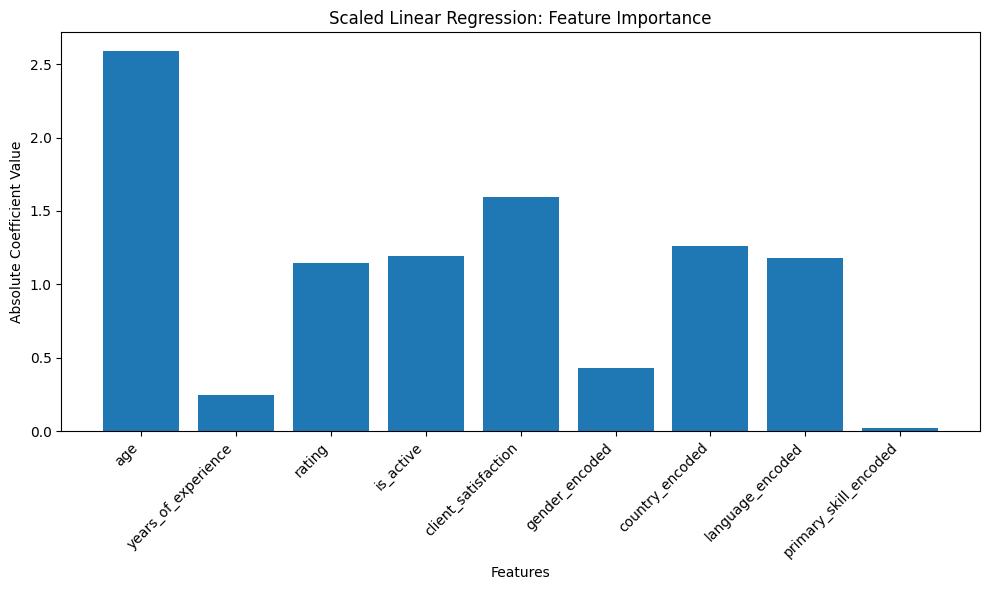

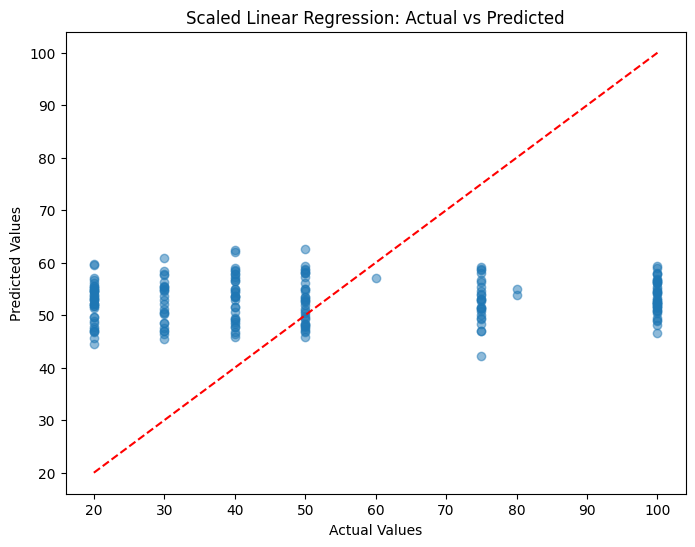

=== Feature Selection (SelectKBest) ===
MSE test set: 830.1545
MSE train set: 694.3683

R² Score test: -0.0066
R² Score train: 0.0187

MAE test set: 24.6344
MAE train set: 22.1883

Selected Features Selector : ['age' 'years_of_experience' 'client_satisfaction' 'country_encoded'
 'language_encoded']


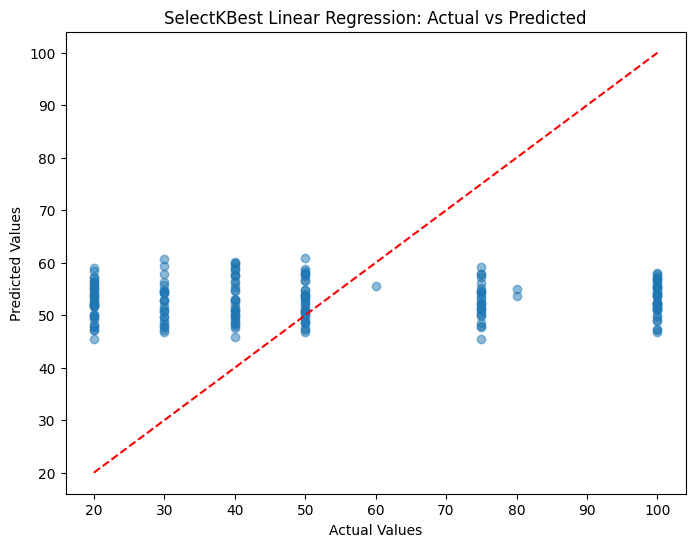

=== Feature Selection (RFE) ===
MSE test set: 822.9396
MSE train set: 692.9839

R² Score test: 0.0022
R² Score train: 0.0207

MAE test set: 24.5434
MAE train set: 22.1678

Selected Features Selector : ['age' 'is_active' 'client_satisfaction' 'country_encoded'
 'language_encoded']


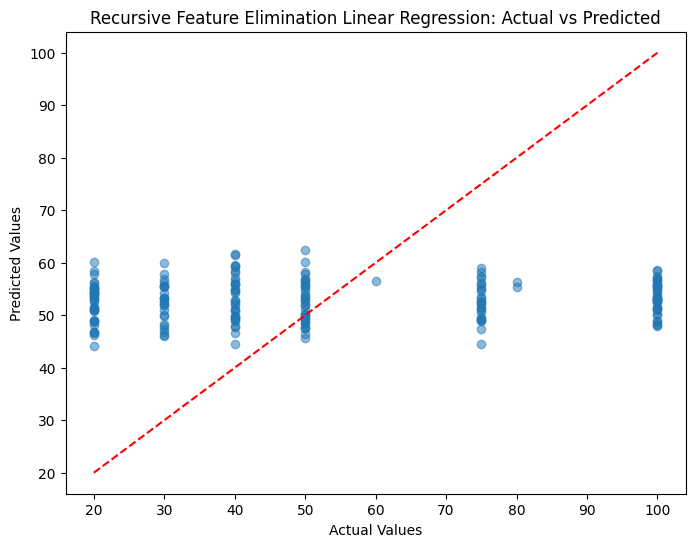

=== Polynomial Regression ===
MSE test set: 864.1125
MSE train set: 647.7985

R² Score test: -0.0477
R² Score train: 0.0846

MAE test set: 24.5162
MAE train set: 20.9774


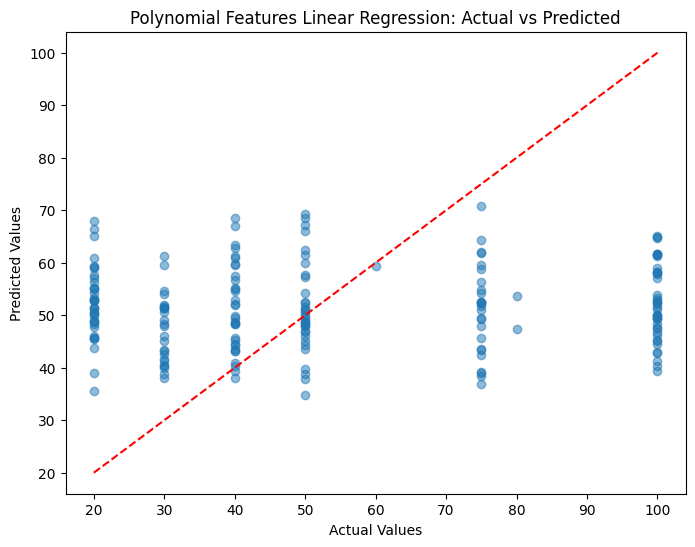

=== Ridge Regression ===


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a

MSE test set:  821.7772
MSE train set: 695.8789

R² Score test: 0.0036
R² Score train:0.0166

MAE test set:  24.3920
MAE train set: 22.1953

Best alpha:    1000.0000

Selected Features Coef_: ['age' 'years_of_experience' 'rating' 'is_active' 'client_satisfaction'
 'gender_encoded' 'country_encoded' 'language_encoded'
 'primary_skill_encoded']


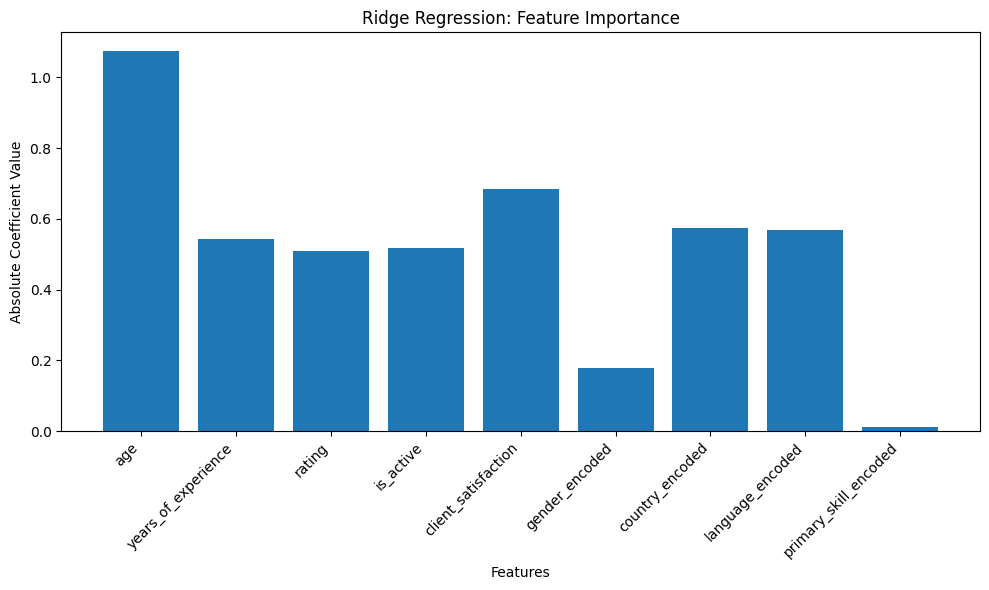

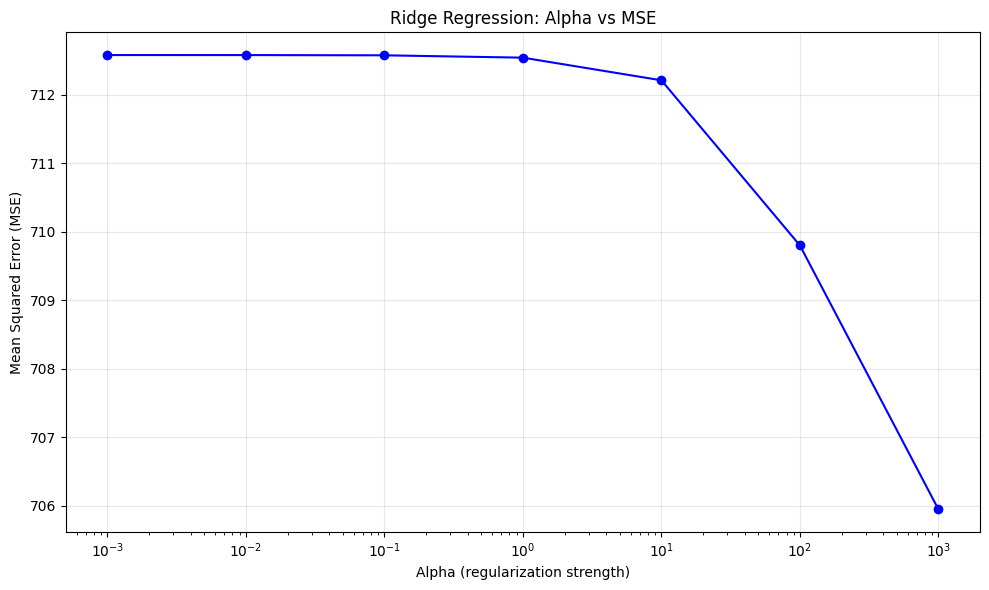

=== Lasso Regression ===
MSE test set: 827.9576
MSE train set: 697.5530

R² Score test: -0.0039
R² Score train: 0.0142

MAE test set: 24.4710
MAE train set: 22.2222

Best alpha: 1.0

Selected features: ['age' 'rating' 'is_active' 'client_satisfaction' 'country_encoded'
 'language_encoded']


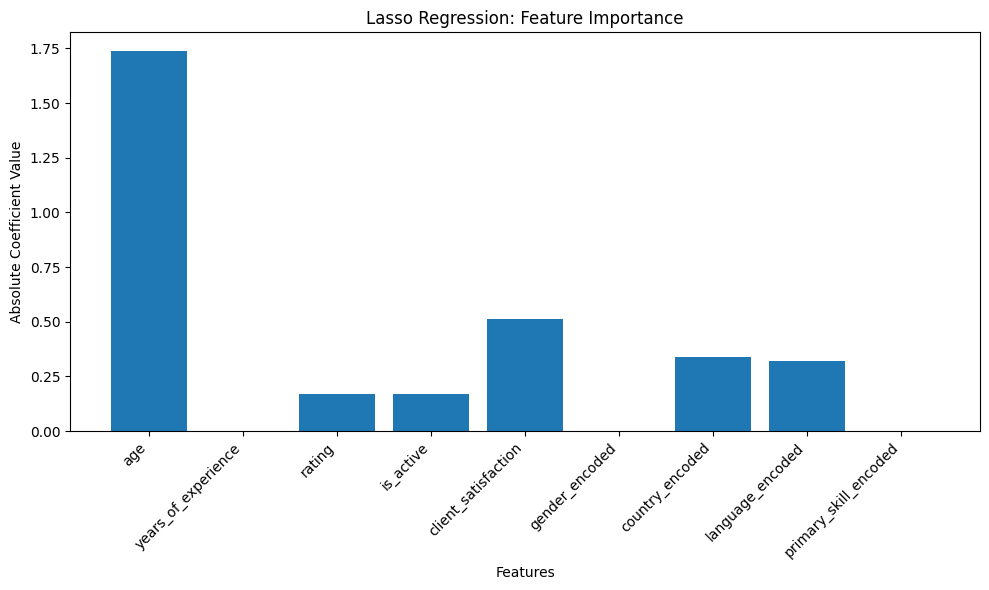

=== Elastic Net Regression ===
MSE test set: 821.8667
MSE train set: 695.1548

R² Score test: 0.0035
R² Score train: 0.0176

MAE test set: 24.4052
MAE train set: 22.1859

Best parameters: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.1}

Selected Features Coef_: ['age' 'years_of_experience' 'rating' 'is_active' 'client_satisfaction'
 'gender_encoded' 'country_encoded' 'language_encoded']


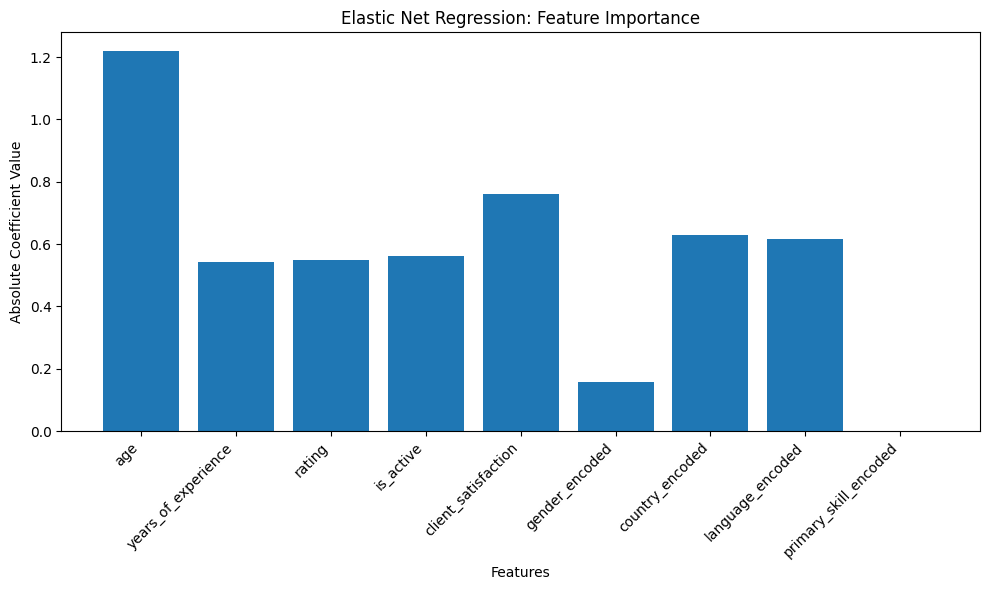

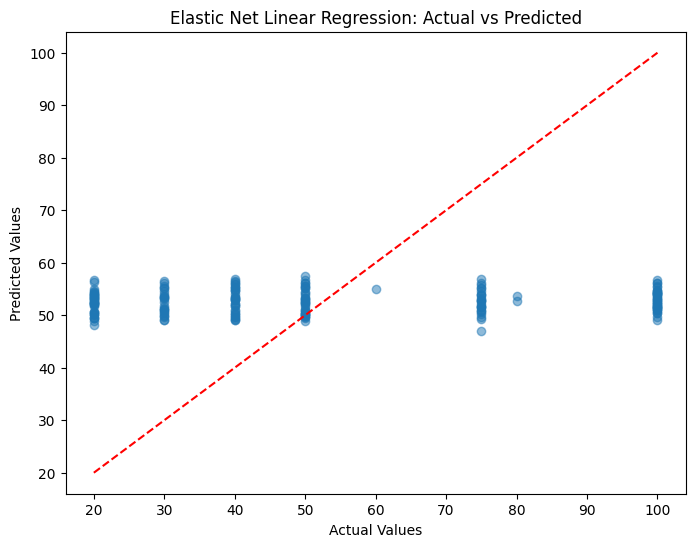

=== Model Comparison ===
                                  MSE       MAE         R²
Ridge Regression           821.777195  0.003604  24.392016
Elastic Net                821.866678  0.003496  24.405219
Feature Selection (RFE)    822.939562  0.002195  24.543435
Scaled Linear Regression   824.415895  0.000405  24.599823
Basic Linear Regression    824.415895  0.000405  24.599823
Lasso Regression           827.957609 -0.003889  24.471032
Feature Selection (KBest)  830.154503 -0.006553  24.634432
Polynomial Regression      864.112468 -0.047727  24.516250


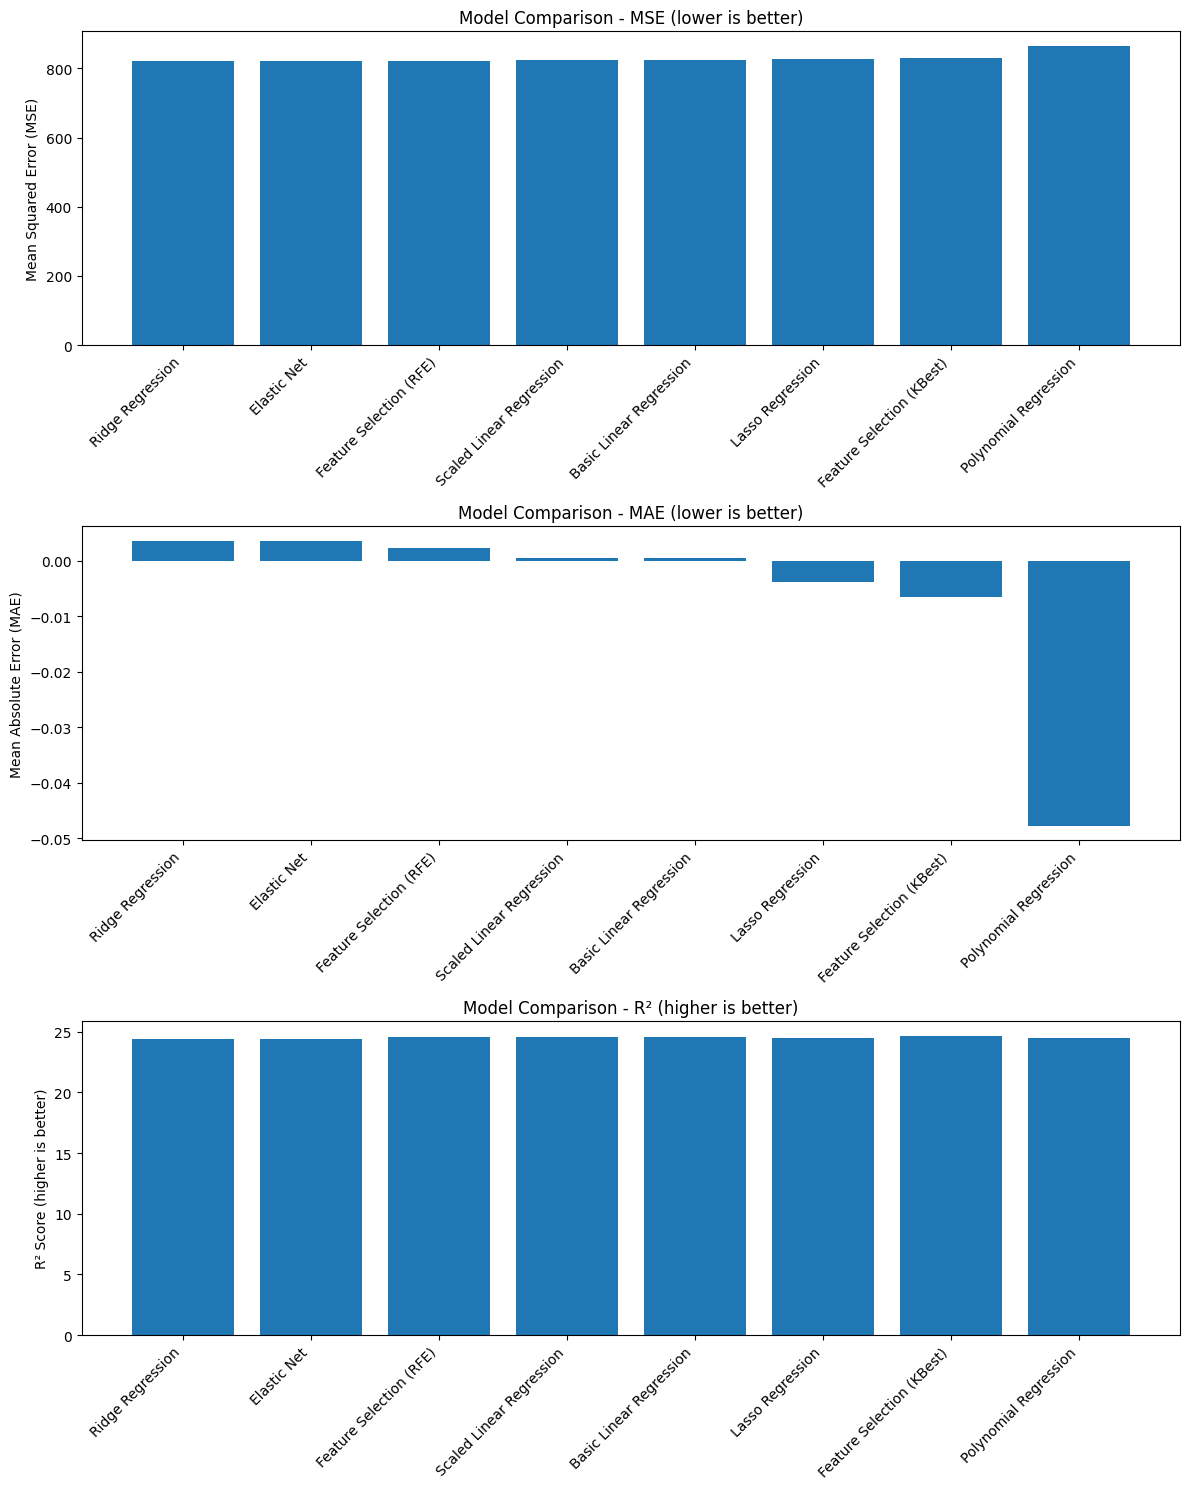

Best model according to MSE: Ridge Regression
Best model according to MAE: Ridge Regression
Best model according to R2_score: Ridge Regression


In [101]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the California housing dataset
X = clean_df.drop(columns=['hourly_rate'])
y = clean_df['hourly_rate']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print("=" * 127)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("=" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("=" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("=" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("=" * 127) 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 
    print("=" * 127) 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("=" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("=" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("=" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("=" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("=" * 127) 
    
    return mse_scores, mae_scores, r2_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }
    
    # Extract MSE and R² scores
    results = {name: {'MSE': mse_scores, 'MAE': mae_scores, 'R²': r2_scores} for name, (_, mse_scores, mae_scores, r2_scores) in models.items()}
    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')
    
    print("=== Model Comparison ===")
    print(results_df)
    print("=" * 127) 
    
    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots
    
    plt.subplot(3, 1, 1)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')

    plt.subplot(3, 1, 2)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()

    return results_df 
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(clean_df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['hourly_rate'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['hourly_rate'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (hourly_rate):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("=" * 127) 

## RandomForestRegressor

Dataset shape: (1000, 9)
Feature names: Index(['age', 'years_of_experience', 'rating', 'is_active', 'client_satisfaction', 'gender_encoded', 'country_encoded', 'language_encoded', 'primary_skill_encoded'], dtype='object')
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 720.8643901461886
Test R² score: -0.047395565345485835
Test MAE: 25.15953355809797
Test RMSE: 29.39114649888108
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 11, 'n_estimators': 296}
Best cross-validation score: 711.9489157018246


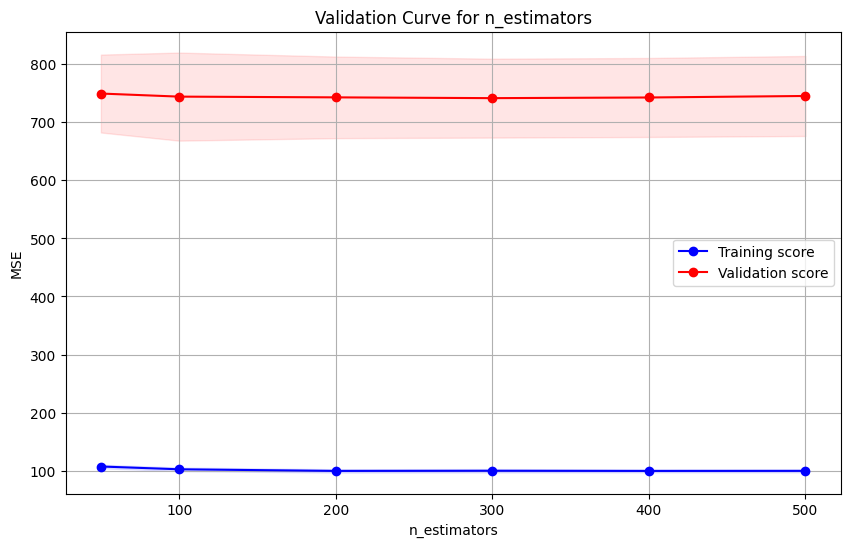

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

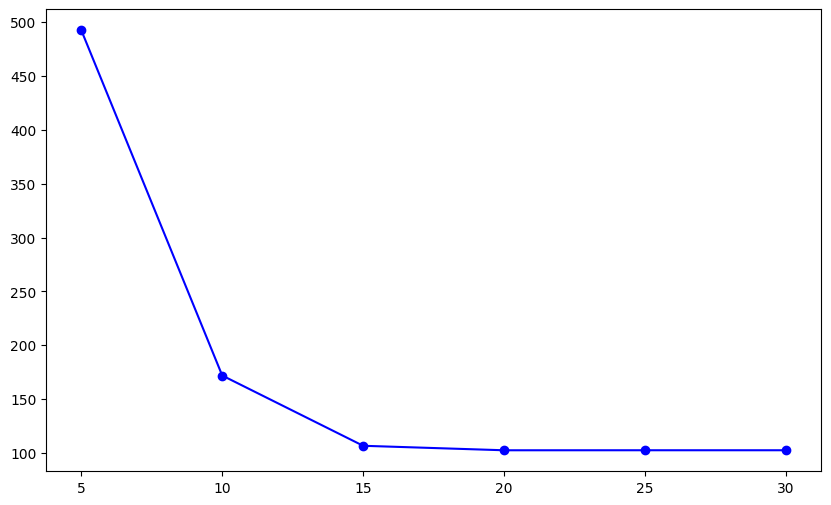

In [102]:
# 1. Grid Search with Cross-Validation
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate sample data
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Load the California housing dataset
X = clean_df.drop(columns=['hourly_rate'])
y = clean_df['hourly_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print("=" * 127)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)
print("=" * 127) 

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test R² score:", r2_score(y_test, y_pred))
print("Test MAE:", (mean_absolute_error(y_test, y_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("=" * 127)  

# 2. Randomized Search for Faster Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", -random_search.best_score_)
print("=" * 127)  

#3. Manual Tuning with Validation Curves
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Function to plot validation curves
def plot_validation_curve(X, y, param_name, param_range, cv=5):
    train_scores, val_scores = validation_curve(
        RandomForestRegressor(random_state=42), X, y,
        param_name=param_name, param_range=param_range,
        cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = -val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(param_range, val_mean, 'o-', color='red', label='Validation score')
    plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve for {param_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot validation curves for different parameters
plot_validation_curve(X_train, y_train, 'n_estimators', [50, 100, 200, 300, 400, 500])
plot_validation_curve(X_train, y_train, 'max_depth', [5, 10, 15, 20, 25, 30, None])

# 4. Advanced Tuning with Optuna
import optuna 
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    
    # Create model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    
    # Cross-validation score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best score:", study.best_value)
print("=" * 127)  

# Train final model
best_rf_optuna = RandomForestRegressor(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)

# 5. Feature Importance Analysis
# Train model with best parameters
best_rf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': [f'feature_{i}' for i in range(X_train.shape[1])],
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)
print("=" * 127)  

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 6. Out-of-Bag Score Analysis
# Use OOB score for model evaluation
rf_oob = RandomForestRegressor(
    n_estimators=300,
    oob_score=True,
    random_state=42
)

rf_oob.fit(X_train, y_train)
print(f"Out-of-bag R² score: {rf_oob.oob_score_:.4f}")
print("=" * 127)  

# Compare different n_estimators using OOB score
oob_scores = []
estimator_range = range(50, 501, 50)

for n_est in estimator_range:
    rf_temp = RandomForestRegressor(n_estimators=n_est, oob_score=True, random_state=42)
    rf_temp.fit(X_train, y_train)
    oob_scores.append(rf_temp.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, oob_scores, 'o-')
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Score')
plt.title('Out-of-Bag Score vs Number of Estimators')
plt.grid(True)
plt.show()